In [1]:
import json
import pandas as pd
import itertools
import csv
import pickle
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score



In [2]:
plt.style.use('seaborn')

In [3]:
pkl_path = '/Users/xzhou/github/project_files/amazon/amazon_alexa_reviews.pkl'

with open(pkl_path, 'rb') as pkl_file:
    df = pd.read_pickle(pkl_file)

df.head()

,rating,date,review,review_by_word,word_count
2,4,2018-07-31,"Sometimes while playing a game, you can answer...","[Sometimes, while, playing, a, game, ,, you, c...",41
3,5,2018-07-31,I have had a lot of fun with this thing. My 4 ...,"[I, have, had, a, lot, of, fun, with, this, th...",38
5,5,2018-07-31,I received the echo as a gift. I needed anothe...,"[I, received, the, echo, as, a, gift, ., I, ne...",38
6,3,2018-07-31,"Without having a cellphone, I cannot use many ...","[Without, having, a, cellphone, ,, I, can, not...",84
7,5,2018-07-31,I think this is the 5th one I've purchased. I'...,"[I, think, this, is, the, 5th, one, I, 've, pu...",45


In [4]:
df.shape

(7248, 5)

In [5]:
# Assign sentiment:

def assign_sentiment(x):
    sentiment = ''
    if x < 3:
        sentiment = -1
    elif x == 3:
        sentiment = 0
    else:
        sentiment =1
    return sentiment

In [6]:
df['sentiment'] = df['rating'].apply(lambda x: assign_sentiment(x))

In [7]:
X = df['review']

In [8]:
y = df['sentiment']

In [122]:
tfidf_vector = TfidfVectorizer(ngram_range=(1,2),
                               stop_words='english',
                               token_pattern="\\b[a-z][a-z]+\\b",
                               lowercase=True,
                               max_df=0.5,
                               min_df=0.005,
                               max_features=2000)
count_vector = CountVectorizer(ngram_range=(1,2),
                               stop_words='english',
                               token_pattern="\\b[a-z][a-z]+\\b",
                               lowercase=True,
                               max_df=0.5,
                               min_df=0.005,
                               max_features=2000)

In [123]:
tfidf_data = tfidf_vector.fit_transform(X)
cv_data = count_vector.fit_transform(X)

In [124]:
tfidf_data.shape

(7248, 547)

In [125]:
cv_data.shape

(7248, 547)

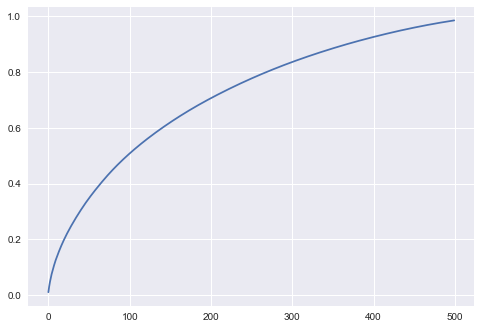

In [127]:
explained_variance = []
n_comp = 500
lsa_tfidf_test = TruncatedSVD(n_components=n_comp)
lsa_tfidf_data_test = lsa_tfidf_test.fit_transform(tfidf_data)
cumulative = np.cumsum(lsa_tfidf_test.explained_variance_ratio_)

plt.plot(cumulative)

In [134]:
# Dimension reduction

n_comp = 200
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

In [135]:
lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_cv_data = lsa_cv.fit_transform(cv_data)

In [136]:
sum(lsa_tfidf.explained_variance_ratio_)

0.7010542052869949

In [52]:
print(lsa_tfidf_data.shape, lsa_cv_data.shape, nmf_cv_data.shape)

(7248, 20) (7248, 20) (7248, 20)


In [143]:
def KMeans_iterations(data):
    
    Sil_coefs = []
    SSEs = []
    
    for k in range(2,10):
        km = KMeans(n_clusters=k, random_state=99, verbose=1, n_jobs=-1)
        km.fit(data)
        labels = km.labels_
        Sil_coefs.append(silhouette_score(lsa_tfidf_data, labels, metric='euclidean'))
        SSEs.append(km.inertia_) 
    
    return (Sil_coefs, SSEs)          

In [144]:
def draw_KMeans_plot(Sil_coefs, SSEs, k_clusters=range(2,10)):

    fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)

    ax[0].plot(k_clusters, Sil_coefs)
    ax[0].set_xlabel('number of clusters')
    ax[0].set_ylabel('Silhouette coefficient')

    ax[1].plot(k_clusters, SSEs)
    ax[1].set_xlabel('number of clusters')
    ax[1].set_ylabel('SSE')

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4862.250000621978
start iteration
done sorting
end inner loop
Initialization complete
Initialization complete
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Initialization complete
Iteration 0, inertia 4854.5611637884995
start iteration
Iteration 1, inertia 4849.0406730853
done sorting
end inner loop
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 0, inertia 4815.748121755574
start iteration
done sorting
Iteration 0, inertia 4871.96008146297
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 4818.448600344616
Iteration 2, inertia 4839.390718934631
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 1, inertia 4865.813896103337
end inner loop
start iteration
done sorting
end inner loop
Iteration 1, inertia 4795.9531110054995
start iteration
Iteration 

Iteration 10, inertia 4793.6178067300725
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 2, inertia 4869.684935377793
start iteration
done sorting
end inner loop
Iteration 11, inertia 4793.611326312404
Iteration 0, inertia 4831.921649241608
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 3, inertia 4869.450460815304
start iteration
done sorting
Iteration 12, inertia 4793.606448980303
start iteration
end inner loop
Initialization complete
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 4, inertia 4868.813013042407
start iteration
Iteration 1, inertia 4807.490460861432
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 0, inertia 4844.910132546539
start iteration
done sorting
end inner loop
Iteration 13, inertia 4793.602891048531
start iteration
done sorting
end inner loop
Iteration 2, inertia 4800.972198778718
start iteratio

start iteration
done sorting
end inner loop
Iteration 15, inertia 4786.333859963063
start iteration
Iteration 4, inertia 4780.188815926841
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 13, inertia 4700.411015253513
start iteration
done sorting
end inner loop
Iteration 13, inertia 4699.974121292599
center shift 0.000000e+00 within tolerance 3.372267e-07
Iteration 16, inertia 4784.574447490055
start iteration
done sorting
Iteration 5, inertia 4779.368018164667
start iteration
end inner loop
done sorting
Iteration 14, inertia 4700.38961147511
end inner loop
start iteration
done sorting
end inner loop
Iteration 15, inertia 4700.3850884554695
start iteration
done sorting
end inner loop
Iteration 17, inertia 4782.3076505397385
start iteration
done sorting
end inner loop
Iteration 6, inertia 4779.038842125768
start iteration
done sorting
end inner loop
Initialization complete
Iteration 18, inertia 4778.443015594238
start iteration
start iteration
done sorti

center shift 0.000000e+00 within tolerance 3.372267e-07
done sorting
end inner loop
end inner loop
Iteration 6, inertia 4709.083541943634
start iteration
done sorting
end inner loop
Iteration 23, inertia 4753.183139139779
start iteration
done sorting
end inner loop
Iteration 4, inertia 4734.415357667594
start iteration
done sorting
end inner loop
Iteration 24, inertia 4747.281788949191
start iteration
done sorting
end inner loop
Iteration 7, inertia 4706.206547098688
start iteration
done sorting
end inner loop
Iteration 5, inertia 4732.251241003186
start iteration
done sorting
end inner loop
Iteration 8, inertia 4703.12426953012
start iteration
Iteration 25, inertia 4743.247938445465
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 6, inertia 4730.96104203786
start iteration
done sorting
end inner loop
Iteration 9, inertia 4700.465155372471
start iteration
done sorting
end inner loop
Iteration 26, inertia 4738.024874006869
start iteration
done sorting
e

start iteration
done sorting
end inner loop
Iteration 8, inertia 4630.957163480844
start iteration
done sorting
Iteration 9, inertia 4739.696618358145
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 9, inertia 4667.939449671345
start iteration
Iteration 10, inertia 4739.652047934204
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 9, inertia 4629.782337987034
start iteration
done sorting
end inner loop
Iteration 10, inertia 4690.8704062331235
start iteration
done sorting
end inner loop
Iteration 10, inertia 4664.9301095379815
start iteration
Iteration 10, inertia 4629.3254048954195
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 11, inertia 4739.626838721633
start iteration
done sorting
end inner loop
Iteration 11, inertia 4629.076329033827
Iteration 11, inertia 4690.309627193554
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 11, iner

end inner loop
done sorting
end inner loop
Initialization complete
end inner loop
start iteration
done sorting
end inner loop
Iteration 10, inertia 4707.57542587294
start iteration
Iteration 35, inertia 4638.912987647516
start iteration
done sorting
done sorting
Iteration 1, inertia 4767.874866997523
end inner loop
start iteration
end inner loop
done sorting
Iteration 0, inertia 4807.226008178281
start iteration
end inner loop
done sorting
end inner loop
Iteration 36, inertia 4635.436957379416
start iteration
done sorting
end inner loop
Iteration 11, inertia 4707.05158070724
start iteration
done sorting
end inner loop
Iteration 2, inertia 4743.98335334636
start iteration
Iteration 1, inertia 4789.963494296327
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 12, inertia 4706.50528840809
start iteration
done sorting
Iteration 37, inertia 4633.880064725632
start iteration
end inner loop
done sorting
end inner loop
Iteration 3, inertia 4731.197800846025
sta

start iteration
done sorting
end inner loop
Iteration 14, inertia 4678.7499004707415
start iteration
done sorting
end inner loop
Iteration 8, inertia 4656.968023223972
start iteration
done sorting
Iteration 15, inertia 4678.081804406063
end inner loop
start iteration
done sorting
end inner loop
Iteration 9, inertia 4656.229402518388
start iteration
Iteration 16, inertia 4677.051463807782
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 10, inertia 4655.985589972879
start iteration
done sorting
end inner loop
Iteration 17, inertia 4675.096906192243
start iteration
done sorting
end inner loop
Iteration 11, inertia 4655.897451802307
start iteration
done sorting
end inner loop
Iteration 18, inertia 4669.89992549457
start iteration
done sorting
end inner loop
Iteration 12, inertia 4655.713414550221
start iteration
done sorting
Iteration 19, inertia 4662.595742366105
end inner loop
start iteration
done sorting
end inner loop
Iteration 13, inertia 4655.3756706

end inner loop
start iteration
done sorting
Iteration 9, inertia 4609.451916985615
end inner loop
Iteration 8, inertia 4655.74151129426
start iteration
start iteration
done sorting
Iteration 9, inertia 4675.367236397731
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner loop
Iteration 9, inertia 4591.3210493240895
start iteration
done sorting
Iteration 10, inertia 4675.330966558531
start iteration
done sorting
end inner loop
end inner loop
Iteration 10, inertia 4609.439670753848
start iteration
done sorting
end inner loop
Iteration 9, inertia 4652.574930024488
start iteration
done sorting
end inner loop
Iteration 11, inertia 4675.305029397762
start iteration
Iteration 11, inertia 4609.432006841298
done sorting
Iteration 10, inertia 4590.939030084326
start iteration
end inner loop
done sorting
start iteration
Iteration 10, inertia 4650.225307295324
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 12, inertia 

start iteration
end inner loop
done sorting
end inner loop
Iteration 3, inertia 4656.918835774577
start iteration
done sorting
Iteration 19, inertia 4714.010370370688
Iteration 17, inertia 4601.534757242426
start iteration
done sorting
Iteration 36, inertia 4590.008422908024
start iteration
done sorting
start iteration
end inner loop
end inner loop
done sorting
end inner loop
end inner loop
Iteration 20, inertia 4712.905490156314
start iteration
done sorting
end inner loop
Iteration 18, inertia 4600.263699474682
start iteration
Iteration 37, inertia 4589.978092621088
done sorting
start iteration
done sorting
end inner loop
Iteration 4, inertia 4648.229723129447
end inner loop
start iteration
done sorting
end inner loop
Iteration 19, inertia 4599.387803029789
start iteration
done sorting
Iteration 38, inertia 4589.9399685270255
Iteration 21, inertia 4712.610107199333
end inner loop
start iteration
done sorting
Iteration 5, inertia 4640.973784924718
start iteration
start iteration
end in

start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 11, inertia 4644.775538922447
Iteration 17, inertia 4645.0508589594165
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 12, inertia 4644.699535809618
start iteration
done sorting
Iteration 18, inertia 4644.3631605622
end inner loop
start iteration
done sorting
end inner loop
Iteration 13, inertia 4644.675937711472
start iteration
done sorting
end inner loop
Iteration 19, inertia 4643.356017766357
start iteration
done sorting
end inner loop
Iteration 14, inertia 4644.666161175544
start iteration
done sorting
end inner loop
Iteration 20, inertia 4642.361036983118
start iteration
done sorting
end inner loop
Iteration 15, inertia 4644.654963240047
start iteration
done sorting
end inner loop
Iteration 21, inertia 4642.13408556358
start iteration
done sorting
end inner loop
Iteration 16, inertia 4644.637203446905
start iteration
done sorting
end inner loop
Iterat

Iteration 17, inertia 4556.76409130502
end inner loop
start iteration
done sorting
Iteration 0, inertia 4767.040055266519
end inner loop
start iteration
done sorting
Iteration 17, inertia 4569.904447921234
start iteration
done sorting
end inner loop
Iteration 19, inertia 4595.568633822482
start iteration
done sorting
end inner loop
end inner loop
Iteration 18, inertia 4556.695002795729
start iteration
done sorting
end inner loop
Iteration 1, inertia 4741.310568380403
start iteration
done sorting
Iteration 18, inertia 4569.118107264797
start iteration
done sorting
end inner loop
end inner loop
Iteration 20, inertia 4595.170255478589
start iteration
done sorting
end inner loop
Iteration 2, inertia 4714.26996869293
start iteration
done sorting
Iteration 19, inertia 4568.863303504057
start iteration
end inner loop
done sorting
end inner loop
Iteration 19, inertia 4556.646187668242
start iteration
done sorting
end inner loop
Iteration 21, inertia 4594.633752358205
start iteration
done sorti

Iteration 46, inertia 4578.444732952867
start iteration
done sorting
end inner loop
Iteration 7, inertia 4582.931974596125
Iteration 10, inertia 4598.915527100623
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 47, inertia 4578.388034472252
start iteration
done sorting
end inner loop
end inner loop
Iteration 48, inertia 4578.3460962794925
start iteration
Iteration 4, inertia 4631.944443617518
start iteration
done sorting
done sorting
end inner loop
Iteration 11, inertia 4590.204217610479
start iteration
done sorting
end inner loop
Iteration 8, inertia 4580.525395389105
start iteration
done sorting
end inner loop
end inner loop
Iteration 12, inertia 4570.06033172627
start iteration
Iteration 5, inertia 4629.459015397195
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 9, inertia 4578.477826910929
start iteration
done sorting
Iteration 49, inertia 4578.253199964753
start iteration
done sorting
end inner loop
end inner lo

end inner loop
Iteration 12, inertia 4615.6991177892305
start iteration
done sorting
end inner loop
Iteration 15, inertia 4591.273106737901
start iteration
done sorting
end inner loop
Iteration 13, inertia 4615.6991177892305
center shift 0.000000e+00 within tolerance 3.372267e-07
Iteration 37, inertia 4526.971892818825
start iteration
done sorting
end inner loop
Iteration 16, inertia 4590.714969279172
start iteration
done sorting
end inner loop
Iteration 38, inertia 4526.882754159715
start iteration
done sorting
end inner loop
Iteration 17, inertia 4589.73501819894
start iteration
done sorting
Iteration 39, inertia 4526.863847647116
end inner loop
start iteration
done sorting
end inner loop
Iteration 18, inertia 4588.629314645666
start iteration
Iteration 40, inertia 4526.850369781218
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 41, inertia 4526.845702362475
Iteration 19, inertia 4588.348914166533
start iteration
start iteration
done sorting
done so

start iteration
Iteration 18, inertia 4517.42236866243
start iteration
done sorting
done sorting
Iteration 0, inertia 4737.137692500854
end inner loop
end inner loop
start iteration
done sorting
Iteration 0, inertia 4720.1279245134765
start iteration
done sorting
Iteration 19, inertia 4517.272180445353
end inner loop
start iteration
done sorting
end inner loop
Iteration 20, inertia 4548.646153217719
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 4693.4310649286645
start iteration
Iteration 20, inertia 4517.144377307201
done sorting
start iteration
Iteration 21, inertia 4548.4554204661745
start iteration
done sorting
end inner loop
done sorting
end inner loop
end inner loop
Iteration 1, inertia 4647.568789187462
start iteration
done sorting
Iteration 21, inertia 4517.038464912954
start iteration
end inner loop
done sorting
end inner loop
Iteration 2, inertia 4661.227711197954
start iteration
done sorting
Iteration 2, inertia 4617.6578139111225
start iter

end inner loop
Iteration 1, inertia 4652.268465636798
start iteration
done sorting
Iteration 24, inertia 4511.207417061296
start iteration
Iteration 47, inertia 4545.400869483564
done sorting
start iteration
end inner loop
done sorting
end inner loop
start iteration
end inner loop
done sorting
end inner loop
Iteration 48, inertia 4545.400869483564
center shift 0.000000e+00 within tolerance 3.372267e-07
Iteration 25, inertia 4511.18100557128
Iteration 0, inertia 4663.345387561276
start iteration
start iteration
done sorting
done sorting
Iteration 2, inertia 4613.1839736311185
end inner loop
start iteration
end inner loop
done sorting
end inner loop
Iteration 26, inertia 4511.148737821368
start iteration
done sorting
end inner loop
Iteration 1, inertia 4627.830765657275
start iteration
done sorting
end inner loop
Iteration 3, inertia 4592.441439881541
start iteration
done sorting
end inner loop
Iteration 27, inertia 4511.126578018005
Iteration 2, inertia 4613.168332211
start iteration
st

start iteration
done sorting
end inner loop
Iteration 28, inertia 4531.257598126644
start iteration
done sorting
end inner loop
Iteration 20, inertia 4543.227411187611
start iteration
done sorting
end inner loop
Iteration 29, inertia 4531.255601952205
start iteration
done sorting
end inner loop
Iteration 21, inertia 4543.216684507221
start iteration
done sorting
end inner loop
Iteration 22, inertia 4543.209704497701
Iteration 30, inertia 4531.255601952205
center shift 0.000000e+00 within tolerance 3.372267e-07
start iteration
done sorting
end inner loop
Iteration 23, inertia 4543.205518255352
start iteration
done sorting
end inner loop
Iteration 24, inertia 4543.199044348507
start iteration
done sorting
end inner loop
Iteration 25, inertia 4543.196547878886
start iteration
done sorting
end inner loop
Iteration 26, inertia 4543.196547878886
center shift 0.000000e+00 within tolerance 3.372267e-07
Initialization complete
Initialization complete
start iteration
done sorting
start iteration

start iteration
done sorting
end inner loop
Iteration 21, inertia 4471.664460049517
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 4630.469824603639
start iteration
done sorting
Iteration 23, inertia 4472.893500966338
start iteration
Iteration 22, inertia 4490.9215667020835
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 22, inertia 4468.045387990595
start iteration
done sorting
Iteration 24, inertia 4472.893500966338
end inner loop
center shift 0.000000e+00 within tolerance 3.372267e-07
Iteration 23, inertia 4490.808043960894
start iteration
done sorting
end inner loop
Iteration 2, inertia 4585.108514753558
start iteration
Iteration 24, inertia 4490.644200139172
done sorting
start iteration
done sorting
end inner loop
Iteration 23, inertia 4465.15434905608
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 4550.9280912179765
start iteration
done sorting
Iteration 25, inertia 

done sorting
end inner loop
Iteration 15, inertia 4534.7054884704985
start iteration
done sorting
Iteration 21, inertia 4453.297737900765
start iteration
Iteration 7, inertia 4604.354054413974
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 11, inertia 4543.2754329966865
start iteration
done sorting
Iteration 22, inertia 4453.111888242131
end inner loop
Iteration 16, inertia 4534.630932384193
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 8, inertia 4603.753934150428
start iteration
done sorting
end inner loop
Iteration 12, inertia 4543.264185015593
start iteration
done sorting
end inner loop
Iteration 23, inertia 4452.956984347006
start iteration
done sorting
end inner loop
Iteration 17, inertia 4534.560814862083
start iteration
done sorting
end inner loop
Iteration 9, inertia 4603.388179335555
start iteration
done sorting
Iteration 13, inertia 4543.248934214139
end inner loop
start ite

end inner loop
start iteration
done sorting
end inner loop
Iteration 7, inertia 4488.385951145721
start iteration
done sorting
Iteration 9, inertia 4459.719857934422
start iteration
done sorting
end inner loop
Iteration 7, inertia 4445.700425447725
end inner loop
Iteration 8, inertia 4483.447230789169
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 8, inertia 4487.20302340804
Iteration 10, inertia 4459.376000869405
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 8, inertia 4444.972655201595
start iteration
Iteration 9, inertia 4483.280275450676
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 9, inertia 4486.1323657923585
Iteration 9, inertia 4444.036446144791
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 11, inertia 4459.254194640595
start iteration
done sorting
Iteration 10, inertia 4483.234332201592
s

start iteration
end inner loop
done sorting
Initialization complete
Iteration 15, inertia 4475.384801581918
Iteration 10, inertia 4412.93822329319
end inner loop
start iteration
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 11, inertia 4410.856554797621
start iteration
done sorting
Iteration 0, inertia 4624.628472643516
start iteration
end inner loop
done sorting
Iteration 16, inertia 4475.379014192972
start iteration
done sorting
end inner loop
Iteration 1, inertia 4593.319838098883
end inner loop
start iteration
done sorting
end inner loop
Iteration 17, inertia 4475.369477032356
start iteration
done sorting
Iteration 12, inertia 4409.821125725862
start iteration
end inner loop
done sorting
end inner loop
Iteration 2, inertia 4556.872052787697
start iteration
done sorting
Iteration 1, inertia 4584.910892221619
start iteration
done sorting
end inner loop
end inner loop
Iteration 18, inertia 4475.36644571574

done sorting
end inner loop
end inner loop
Iteration 22, inertia 4510.860106597374
Iteration 6, inertia 4474.893467266154
center shift 0.000000e+00 within tolerance 3.372267e-07
start iteration
done sorting
end inner loop
Iteration 7, inertia 4471.750570801949
start iteration
done sorting
end inner loop
Iteration 8, inertia 4468.343975453235
start iteration
done sorting
end inner loop
Iteration 9, inertia 4465.704563597395
start iteration
done sorting
end inner loop
Iteration 10, inertia 4464.9503783976
start iteration
done sorting
end inner loop
Iteration 11, inertia 4464.454864639738
start iteration
done sorting
end inner loop
Iteration 12, inertia 4464.159824407714
start iteration
done sorting
end inner loop
Iteration 13, inertia 4463.983139690099
start iteration
done sorting
end inner loop
Iteration 14, inertia 4463.913188897316
start iteration
done sorting
end inner loop
Iteration 15, inertia 4463.884144598234
start iteration
done sorting
end inner loop
Iteration 16, inertia 4463.

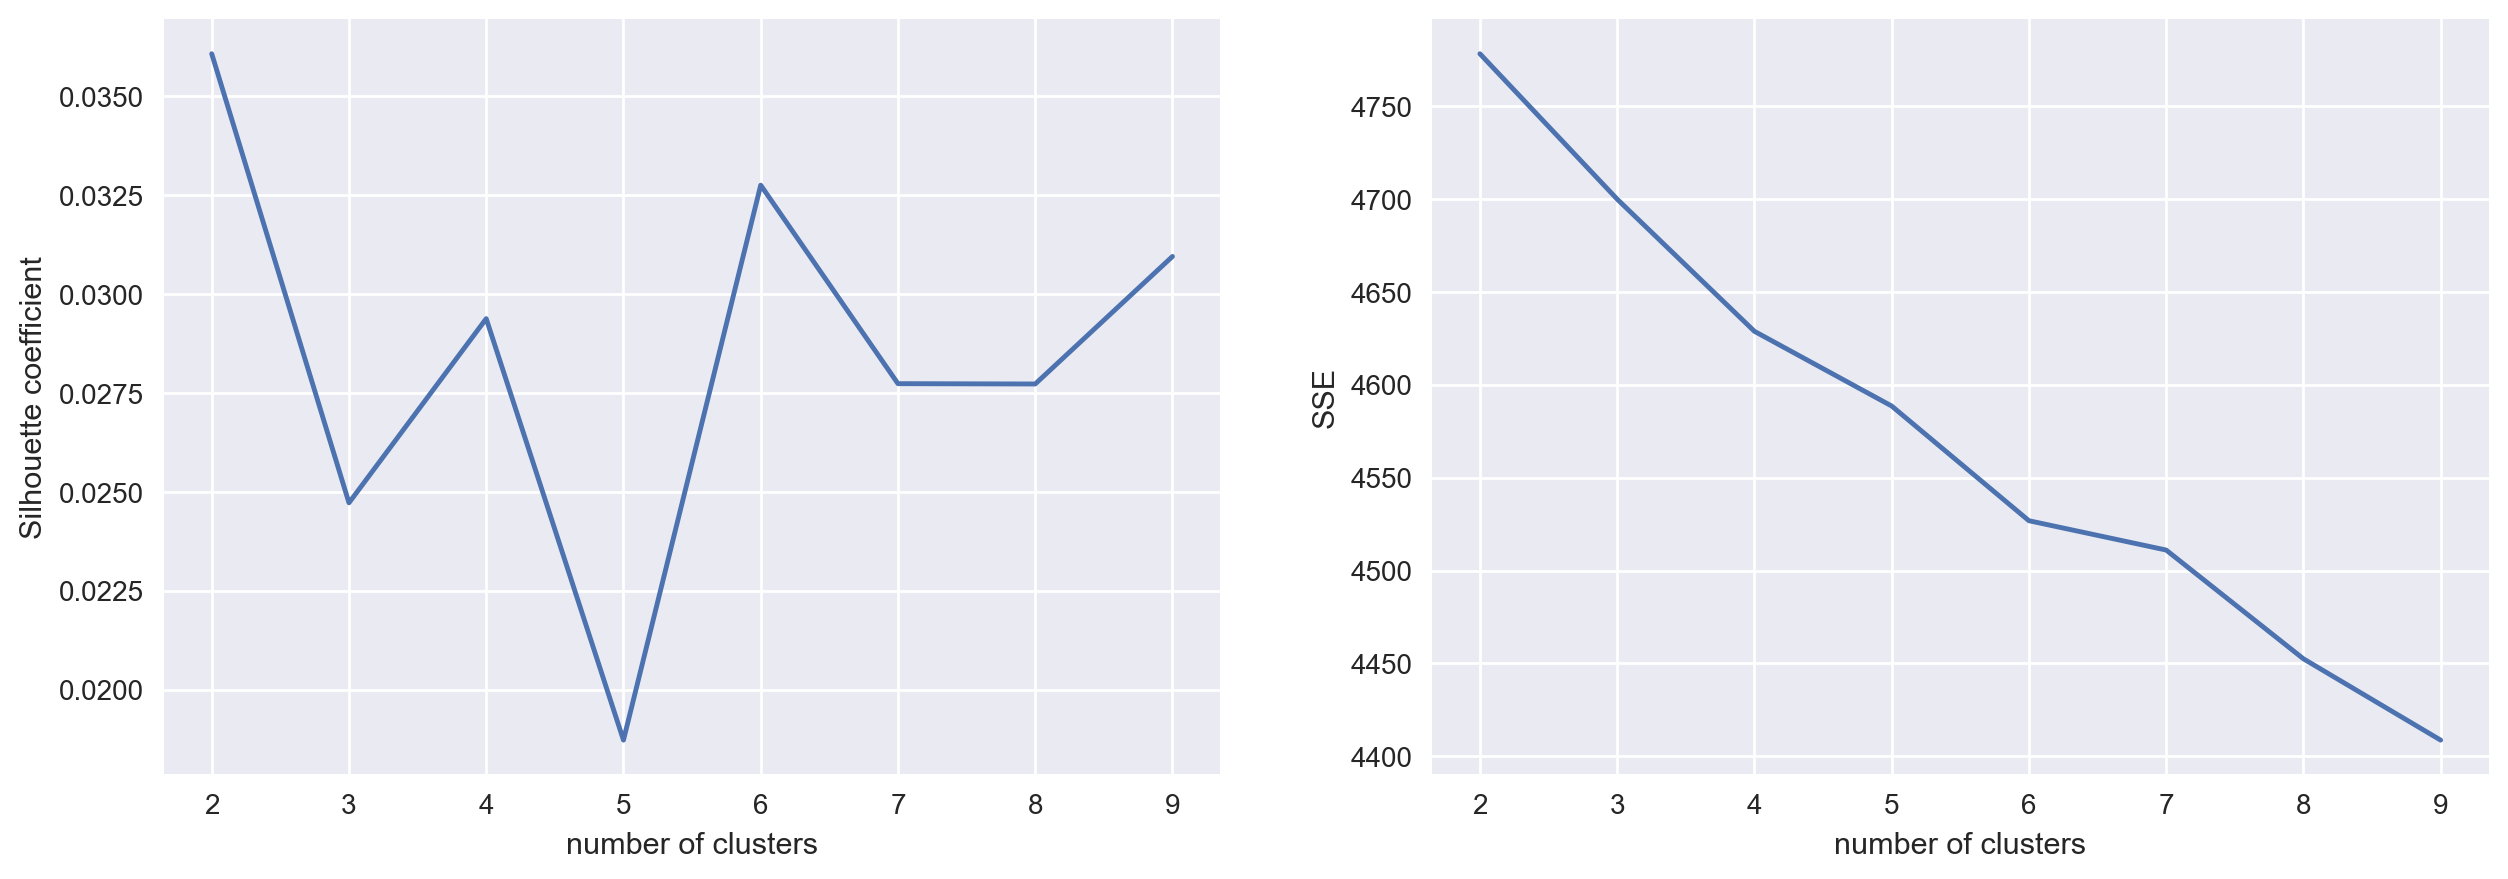

In [145]:
Sil_coefs, SSEs = KMeans_iterations(lsa_tfidf_data)
draw_KMeans_plot(Sil_coefs, SSEs)

In [226]:
class KMeansEngine:
    def __init__(self, data, vectorizer_name, max_df_, min_df_, vector_max_features_):
        """
        The function supports tfidf and count vecotrizer only. Please select 'tiidf' or 'count'
        for vecotrizer. Provided with desired arguments, it will create a vector, 
        and vectorize data
        """
        self.vector_max_features = vector_max_features_
        self.vectorizer(vectorizer_name, max_df_, min_df_)
        self.vectorize_data(data)
            
    
    def vectorizer(self, vectorizer_name, max_df_, min_df_):
        """
        The function supports tfidf and count vecotrizer only. Provided with desired
        argument, return a vector
        """
        if vectorizer_name.lower() == 'tfidf':
            self.vector = TfidfVectorizer(ngram_range=(1,2),
                               stop_words='english',
                               token_pattern="\\b[a-z][a-z]+\\b",
                               lowercase=True,
                               max_df=max_df_,
                               min_df=min_df_,
                               max_features=self.vector_max_features)
            return self.vector
        
        elif vectorizer_name.lower() == 'count':
            self.vector = CountVectorizer(ngram_range=(1,2),
                               stop_words='english',
                               token_pattern="\\b[a-z][a-z]+\\b",
                               lowercase=True,
                               max_df=max_df_,
                               min_df=min_df_,
                               max_features=self.vector_max_features)
            return self.vector
        
        else:
            return 'error'
        
    
    def vectorize_data(self, data):
        """
        Return vectorized data using specificed vector
        """
        self.vectorized_data = self.vector.fit_transform(data)       
        return self.vectorized_data
    
    def dimension_reduction (self, reduction_method, reduction_max_features_):
        """
        Support svd and nmf only.
        """
        if reduction_method.lower() == 'svd':
            lsa = TruncatedSVD(n_components=reduction_max_features_)
            self.reduced_data = lsa.fit_transform(self.vectorized_data)
            
        elif reduction_method.lower() == 'nmf':
            nmf = NMF(n_components=reduction_max_features_)
            self.reduced_data = nmf.fit_transform(self.vectorized_data)
            
        return self.reduced_data
            
    
    def KMeans_iterations(self, max_num_clusters):
        """
        Perform Kmeans fit from 2 to maximum number of clusters specified
        return all sil score and SSEs of each number of cluster 
        """
        self.Sil_coefs = []
        self.SSEs = []
        self.k_clusters = range(2, max_num_clusters+1)

        for k in range(2, max_num_clusters+1):
            km = KMeans(n_clusters=k, random_state=99, n_jobs=-1)
            km.fit(self.reduced_data)
            labels = km.labels_
            self.Sil_coefs.append(silhouette_score(self.vectorized_data, labels, metric='euclidean'))
            self.SSEs.append(km.inertia_) 
  
            
    def draw_KMeans_plot(self):
        """
        Plot two subplots for Sil_coefficients, and SSEs
        """

        fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)

        ax[0].plot(self.k_clusters, self.Sil_coefs)
        ax[0].set_xlabel('number of clusters')
        ax[0].set_ylabel('Silhouette coefficient')

        ax[1].plot(self.k_clusters, self.SSEs)
        ax[1].set_xlabel('number of clusters')
        ax[1].set_ylabel('SSE')
        
        

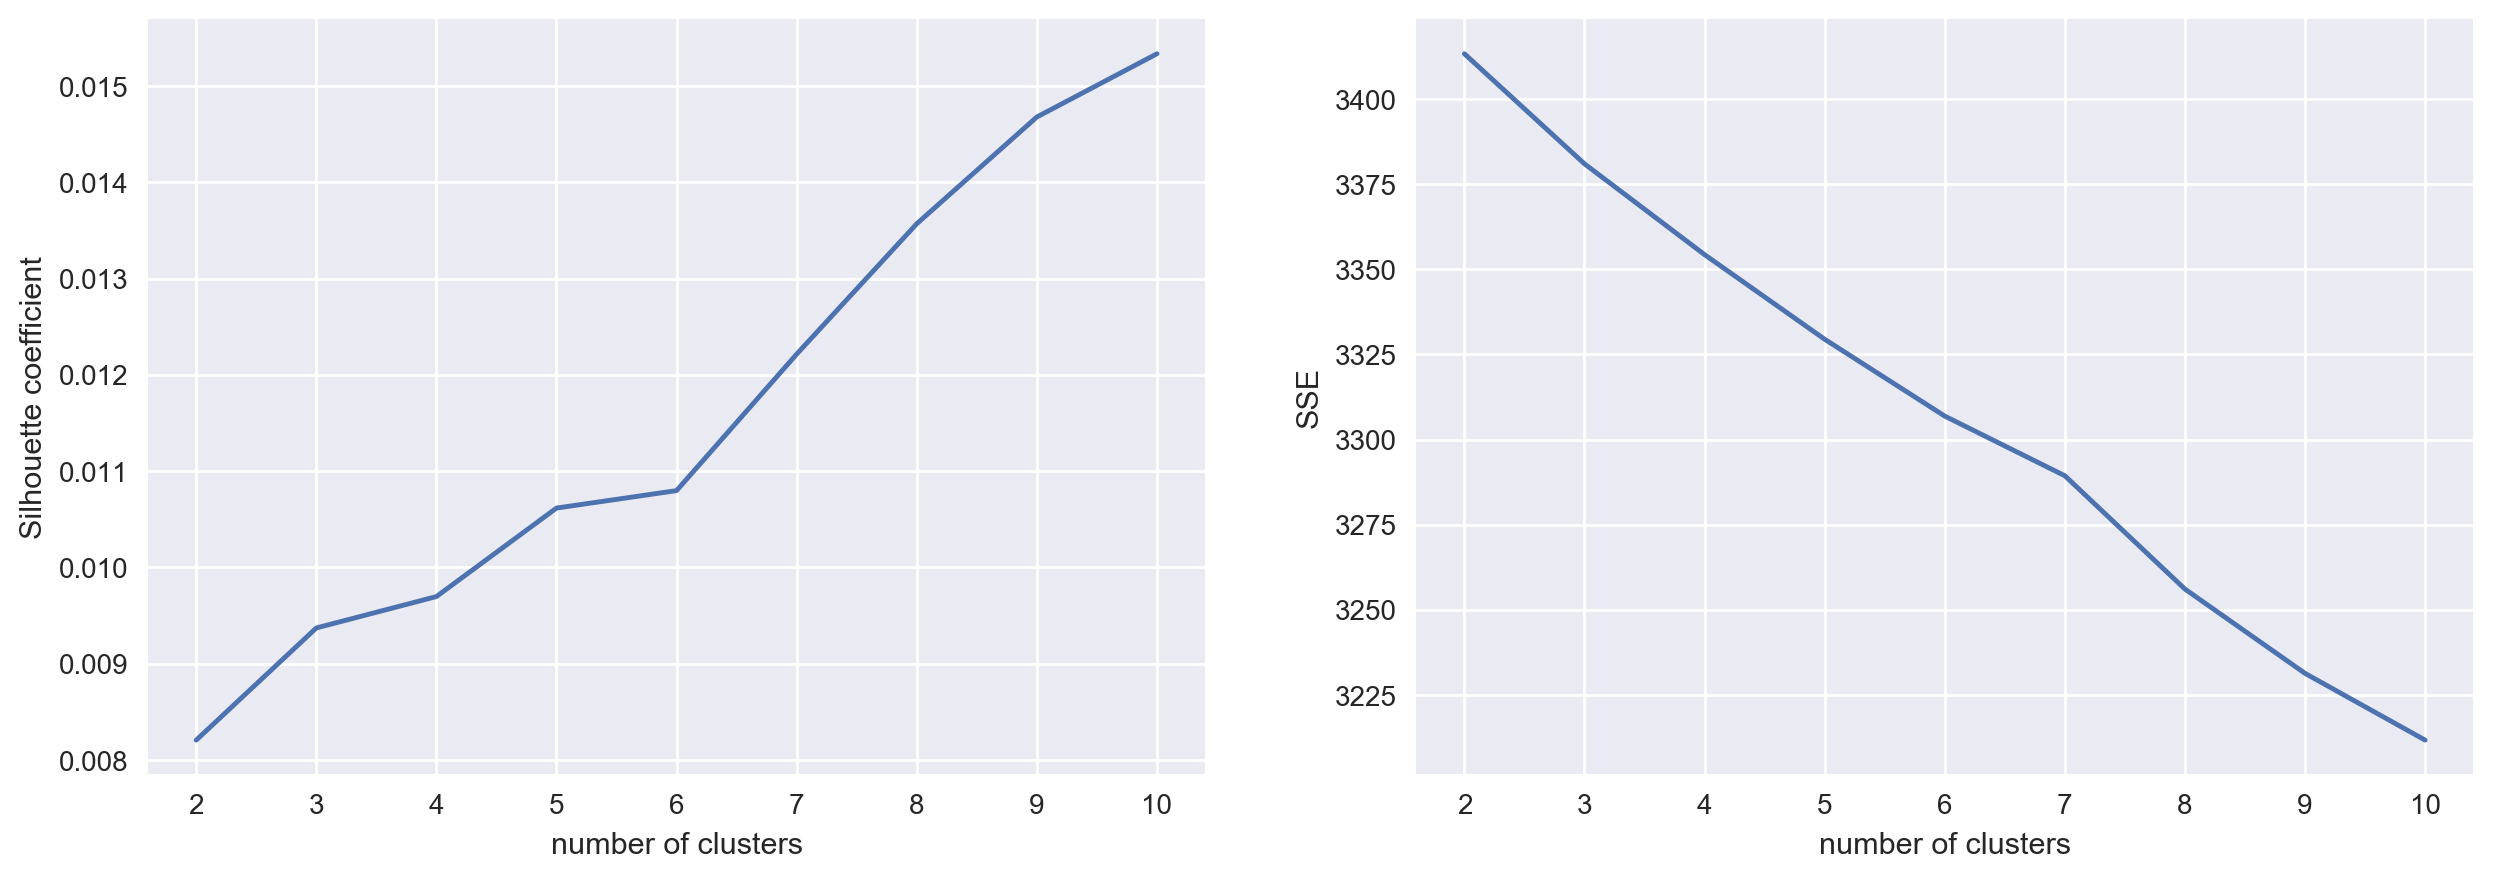

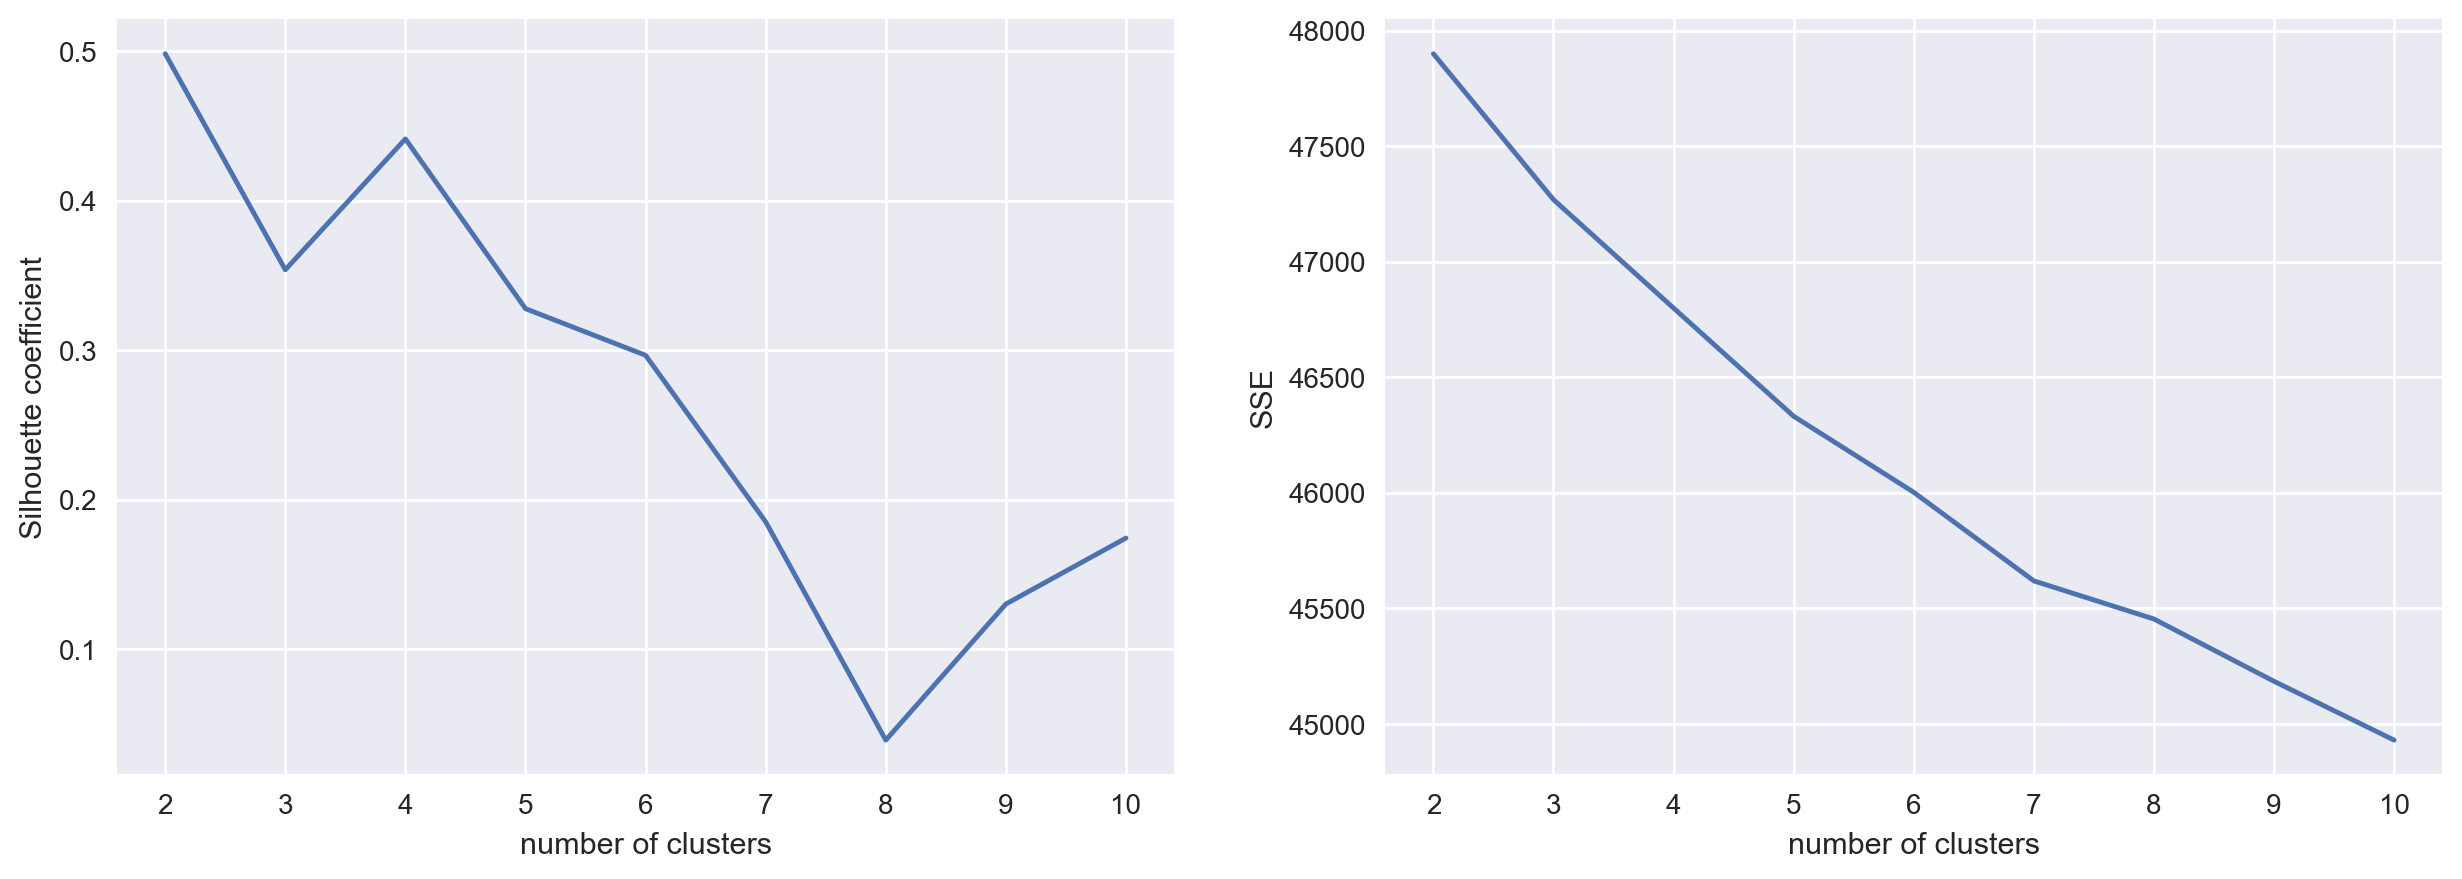

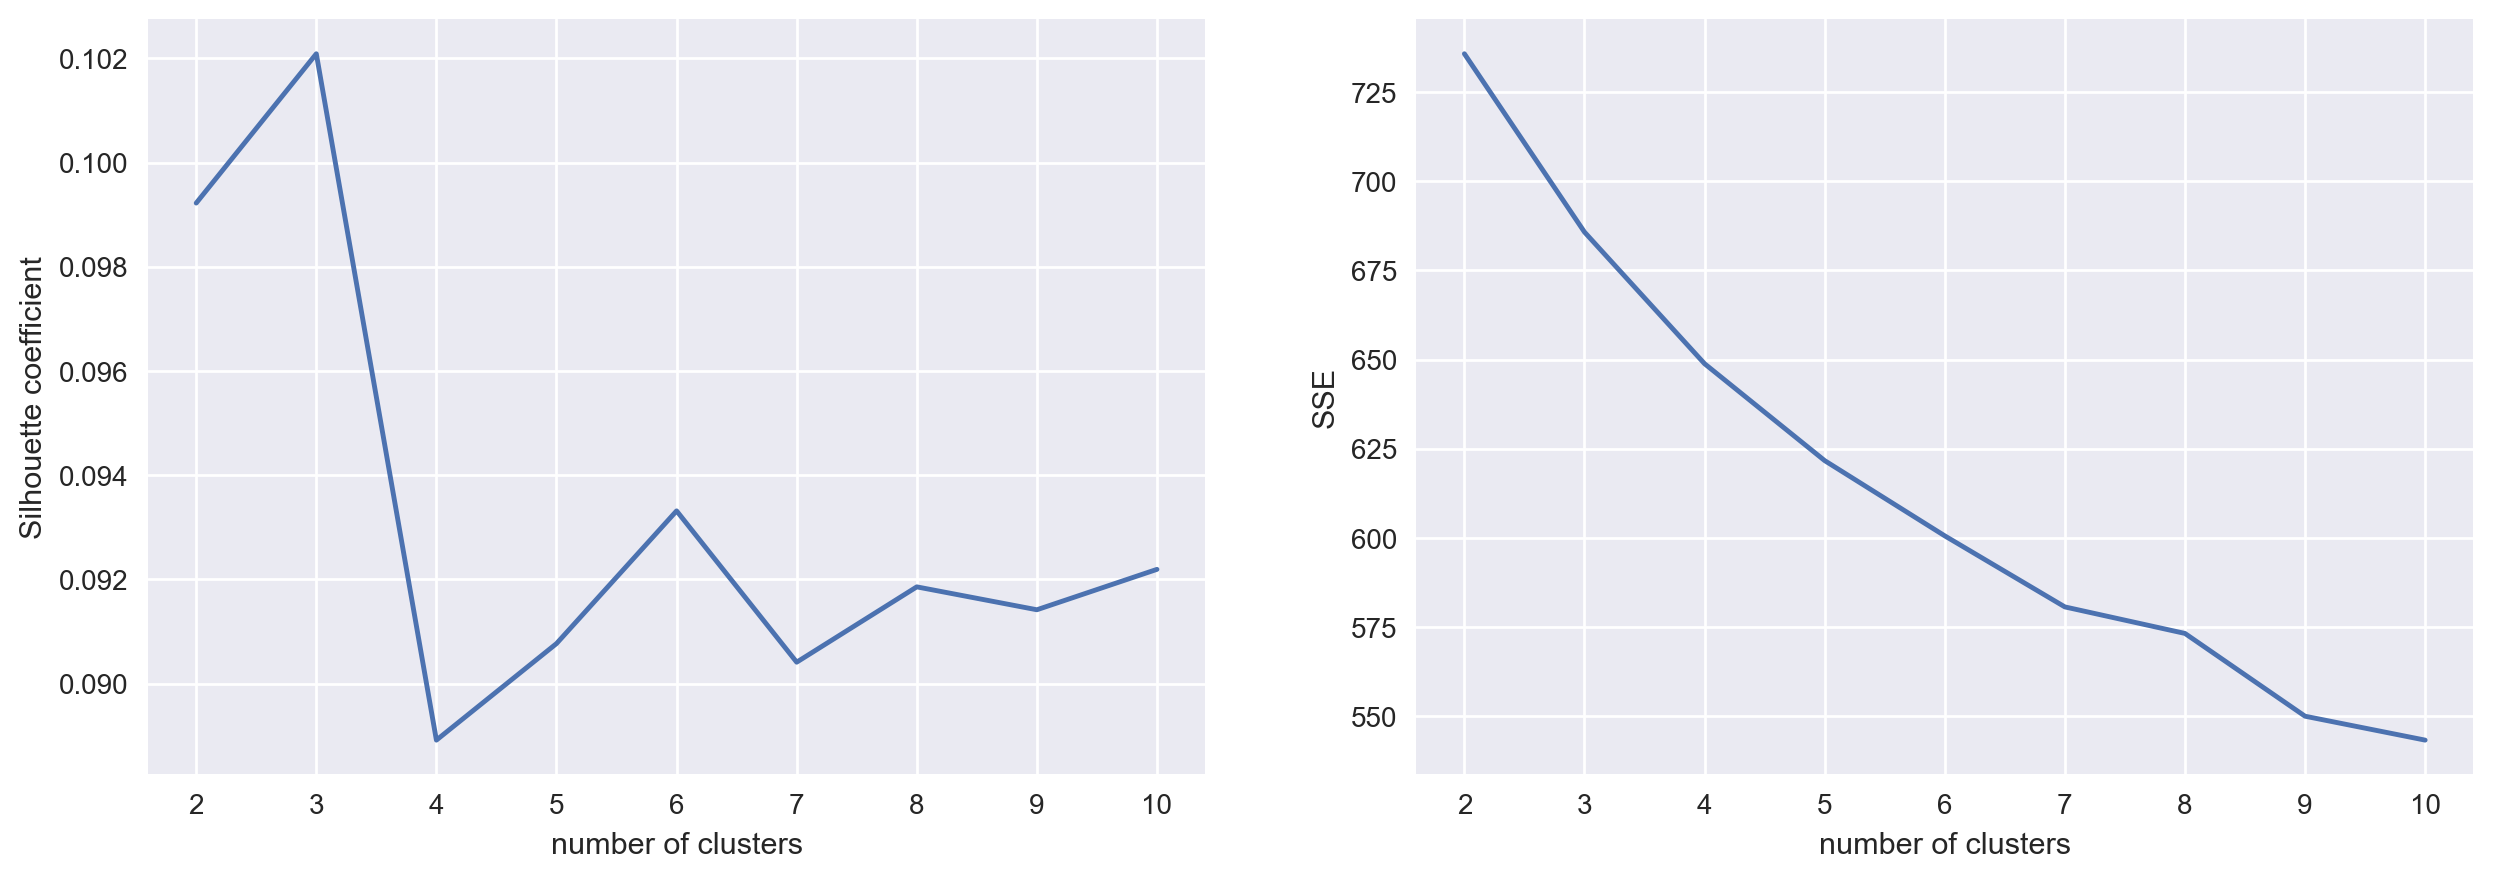

In [227]:
# min_df=0.02, max_feature =200

# Case 1: 'tfidf', 'svd', min_df=0.002, reduced_features=200
lsa_tfidf_0002_200 = KMeansEngine(X, 'tfidf', max_df_=0.05, min_df_=0.002, vector_max_features_=2000)
lsa_tfidf_0002_200.dimension_reduction('svd', reduction_max_features_=200)
lsa_tfidf_0002_200.KMeans_iterations(10)


# Case 2: 'count', 'svd', min_df=0.002, reduced_features=200
lsa_cv_0002_200 = KMeansEngine(X, 'count', max_df_=0.05, min_df_=0.002, vector_max_features_=2000)
lsa_cv_0002_200.dimension_reduction('svd', reduction_max_features_=200)
lsa_cv_0002_200.KMeans_iterations(10)


# Case 3: 'count', 'nmf', min_df=0.002, reduced_features=200
nmf_cv_0002_200 = KMeansEngine(X, 'count', max_df_=0.05, min_df_=0.002, vector_max_features_=2000)
nmf_cv_0002_200.dimension_reduction('nmf', reduction_max_features_=200)
nmf_cv_0002_200.KMeans_iterations(10)


# Plot for all three cases
lsa_tfidf_0002_200.draw_KMeans_plot()
lsa_cv_0002_200.draw_KMeans_plot()
nmf_cv_0002_200.draw_KMeans_plot()


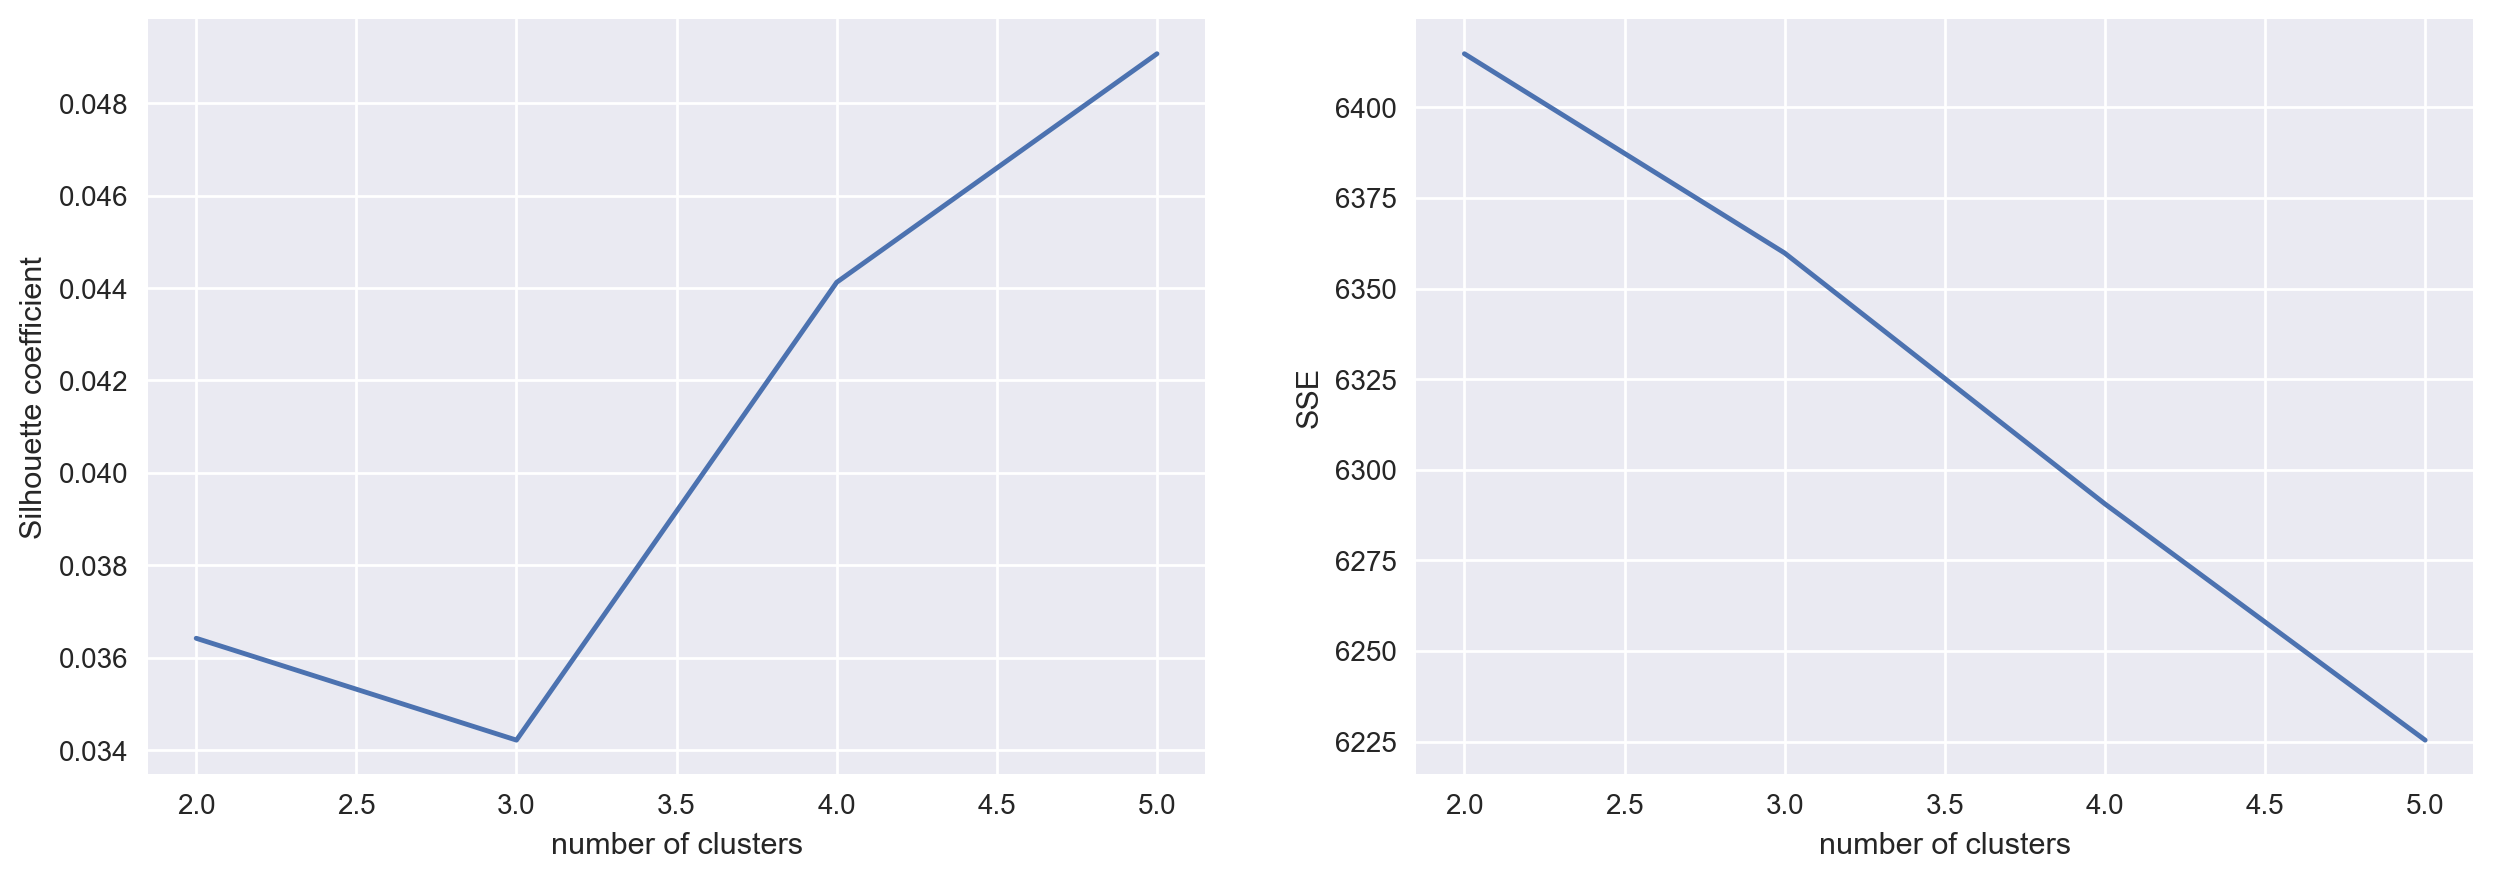

In [212]:
# min_df=0.02, max_feature =200

lsa_tfidf_002_200 = KMeansEngine(X, 'tfidf', max_df_=0.05, min_df_=0.01, max_features_=200)
lsa_tfidf_002_200.KMeans_iterations(10)
lsa_tfidf_002_200.draw_KMeans_plot()

lsa_cv_002_200 = KMeansEngine(X, 'count', max_df_=0.05, min_df_=0.01, max_features_=200)
lsa_cv_002_200.KMeans_iterations(10)
lsa_cv_002_200.draw_KMeans_plot()

tfidf_002_200 = KMeansEngine(X, 'count', max_df_=0.05, min_df_=0.01, max_features_=200)
tfidf_002_200.KMeans_iterations(10)
tfidf_002_200.draw_KMeans_plot()

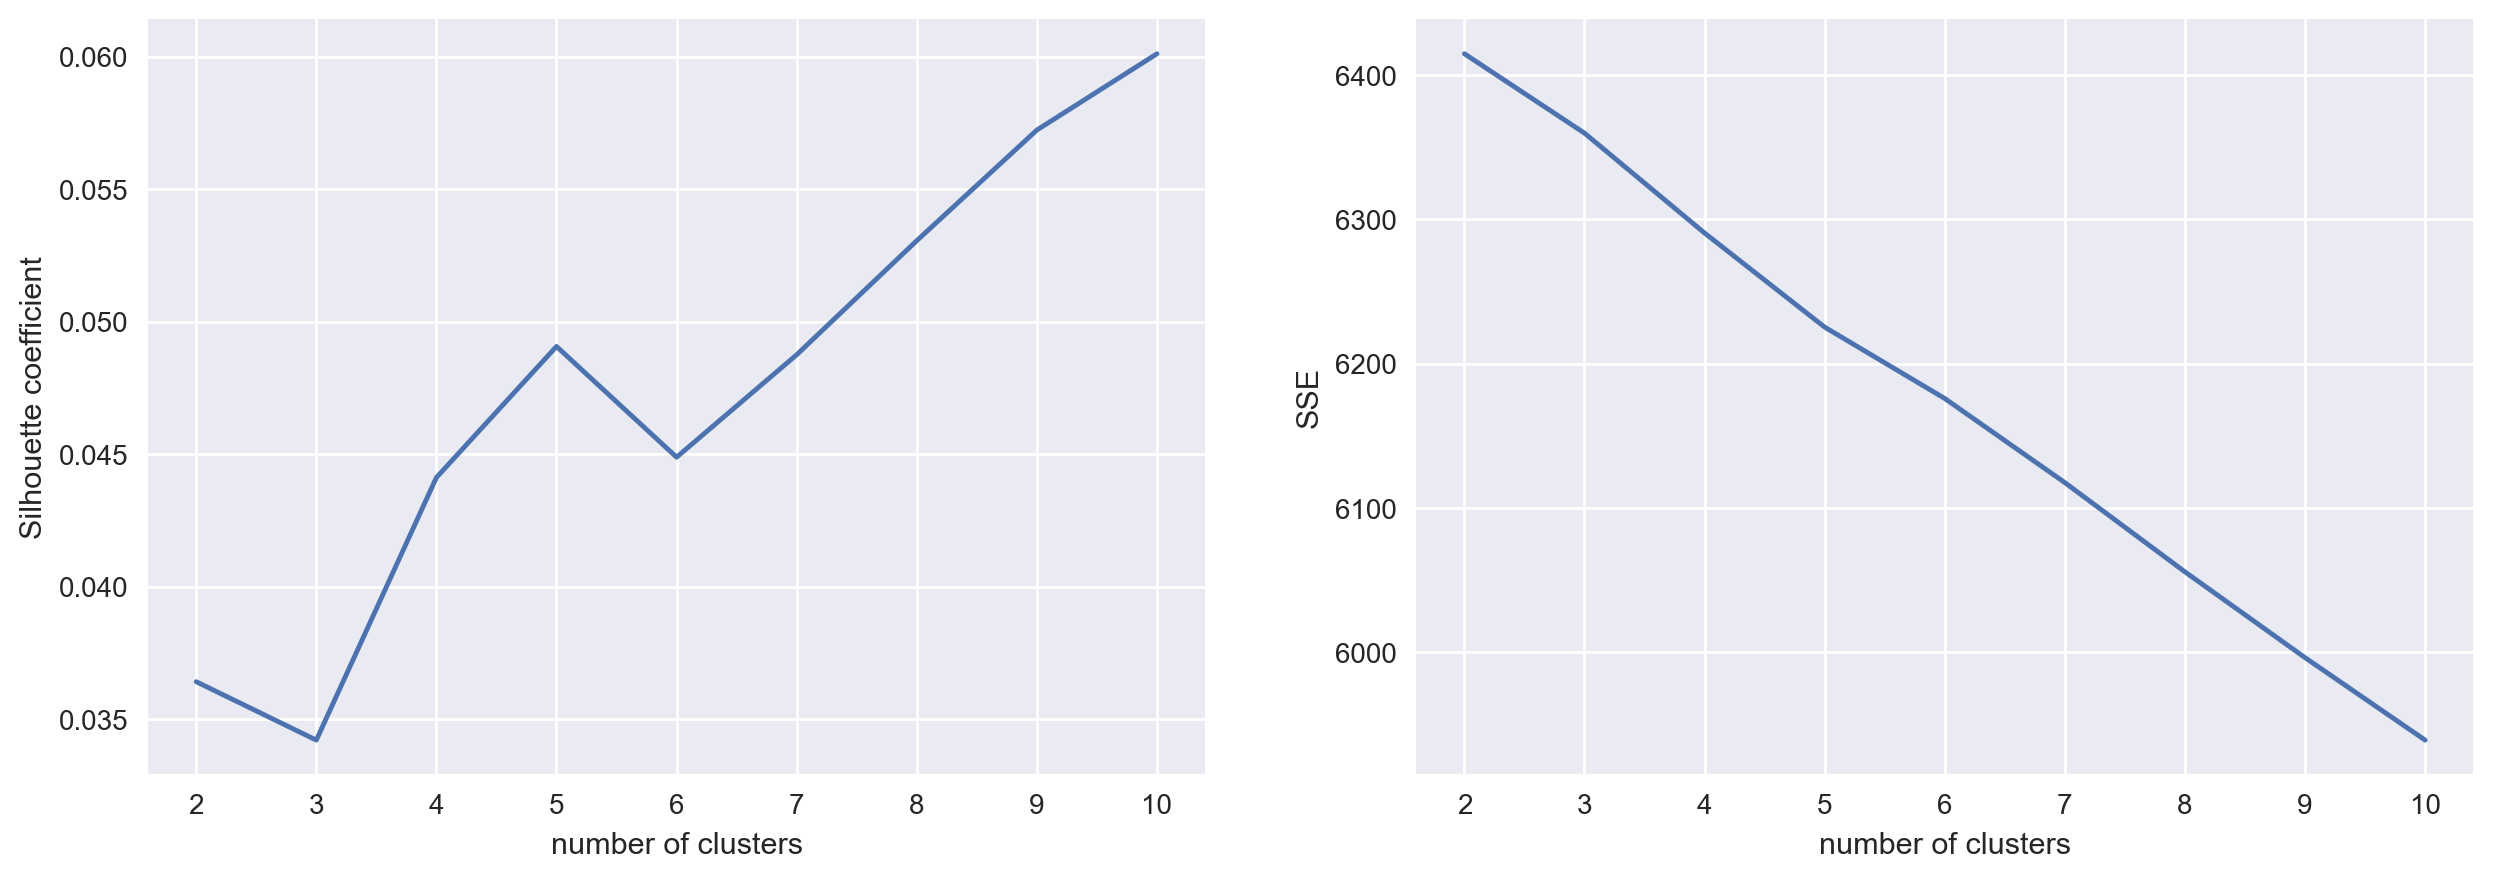

In [208]:
test1 = KMeansEngine(200)
test1_vector = test1.vectorizer('tfidf', max_df_=0.05, min_df_=0.01)
test1_data=test1.vectorize_data(X)
test1.KMeans_iterations(10)
test1.draw_KMeans_plot()


In [151]:
tfidf_vector = TfidfVectorizer(ngram_range=(1,2),
                               stop_words='english',
                               token_pattern="\\b[a-z][a-z]+\\b",
                               lowercase=True,
                               max_df=0.5,
                               min_df=0.002,
                               max_features=2000)
count_vector = CountVectorizer(ngram_range=(1,2),
                               stop_words='english',
                               token_pattern="\\b[a-z][a-z]+\\b",
                               lowercase=True,
                               max_df=0.5,
                               min_df=0.002,
                               max_features=2000)

In [152]:
tfidf_data = tfidf_vector.fit_transform(X)
cv_data = count_vector.fit_transform(X)

In [153]:
tfidf_data.shape

(7248, 1264)

In [154]:
cv_data.shape

(7248, 1264)

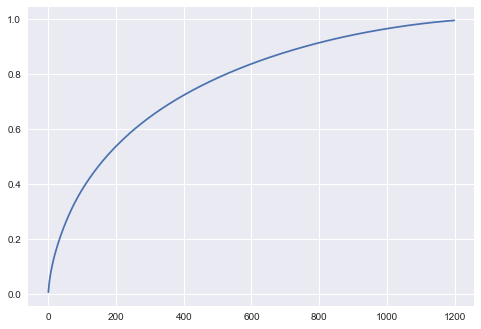

In [155]:
explained_variance = []
n_comp = 1200
lsa_tfidf_test = TruncatedSVD(n_components=n_comp)
lsa_tfidf_data_test = lsa_tfidf_test.fit_transform(tfidf_data)
cumulative = np.cumsum(lsa_tfidf_test.explained_variance_ratio_)

plt.plot(cumulative)

In [156]:
# Dimension reduction

n_comp = 200
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

In [157]:
lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_cv_data = lsa_cv.fit_transform(cv_data)

In [158]:
sum(lsa_tfidf.explained_variance_ratio_)

0.5337579675622419

In [52]:
print(lsa_tfidf_data.shape, lsa_cv_data.shape, nmf_cv_data.shape)

(7248, 20) (7248, 20) (7248, 20)


In [159]:
Sil_coefs_lsa_tfidf, SSEs_lsa_tfidf = KMeans_iterations(lsa_tfidf_data)
Sil_coefs_lsa_cv, SSEs_lsa_cv = KMeans_iterations(lsa_cv_data)
Sil_coefs_nmf_cv, SSEs_nmf_cv = KMeans_iterations(nmf_cv_data)


Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Initialization complete
Initialization complete
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 0, inertia 3739.2951346300833
start iteration
done sorting
end inner loop
Iteration 0, inertia 3742.6253534311677
start iteration
done sorting
end inner loop
Iteration 0, inertia 3737.646477897694
start iteration
done sorting
end inner loop
Iteration 0, inertia 3748.1266043336996
start iteration
done sorting
Iteration 1, inertia 3724.502482513319
Iteration 1, inertia 3731.2441854676986
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 2, inertia 3716.281105674386
Iteration 2, inertia 3727.643872115811
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 1, inertia 3732.4492671894254
Iteration 1, inertia

done sorting
end inner loop
Iteration 2, inertia 3698.078137867551
start iteration
done sorting
end inner loop
Iteration 6, inertia 3699.2784669673015
start iteration
done sorting
end inner loop
Iteration 5, inertia 3688.9224252391264
Iteration 3, inertia 3696.8626093011067
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 16, inertia 3685.7866486373364
center shift 0.000000e+00 within tolerance 2.597901e-07
Iteration 7, inertia 3696.8189814763
start iteration
done sorting
Iteration 4, inertia 3696.538051276293
start iteration
Iteration 6, inertia 3687.357599323035
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 5, inertia 3696.4366815638587
start iteration
Iteration 7, inertia 3686.509249705613
start iteration
done sorting
done sorting
end inner loop
Iteration 8, inertia 3693.7929493626602
start iteration
done sorting
Initialization complete
end inner loop
start iteration
done sorting
end 

Iteration 1, inertia 3695.036893426329
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 3699.3987558887
start iteration
done sorting
end inner loop
Iteration 2, inertia 3657.7106581290304
start iteration
done sorting
Iteration 2, inertia 3697.224566648562
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 3655.856204072484
Iteration 2, inertia 3682.6168376240958
start iteration
Iteration 2, inertia 3687.0909762510273
done sorting
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 3675.3835375233793
start iteration
done sorting
end inner loop
Iteration 3, inertia 3688.0331789830325
start iteration
done sorting
end inner loop
Iteration 4, inertia 3654.8231515761227
start iteration
Iteration 3, inertia 3678.991863284204
done sorting
start iteration
done sorting
Iteration 4, inertia 3681.0902085524117
start iteration
end inner loo

start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 27, inertia 3646.284332680959
start iteration
done sorting
end inner loop
Iteration 4, inertia 3654.690736746294
start iteration
done sorting
end inner loop
Iteration 27, inertia 3637.878371277924
start iteration
done sorting
end inner loop
Iteration 7, inertia 3681.569437778145
Iteration 28, inertia 3646.173915539064
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 5, inertia 3654.6696025680417
start iteration
done sorting
end inner loop
Iteration 8, inertia 3681.4094170080552
Iteration 28, inertia 3637.842916343555
start iteration
done sorting
start iteration
Iteration 29, inertia 3646.071932499237
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 6, inertia 3654.6667672821327
start iteration
Iteration 29, inertia 3637.790275549634
done sorting
start iteration
done sorting
end inner loop
Iteration 9, inertia 

done sorting
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 15, inertia 3650.9273035034016
start iteration
end inner loop
done sorting
end inner loop
Iteration 53, inertia 3628.7944053921033
Iteration 3, inertia 3652.937701723637
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 1, inertia 3687.1976344688514
start iteration
done sorting
Iteration 54, inertia 3628.7597591218246
start iteration
done sorting
end inner loop
end inner loop
Iteration 16, inertia 3650.5682483773303
start iteration
done sorting
end inner loop
Iteration 4, inertia 3647.4014969921823
start iteration
done sorting
end inner loop
Iteration 2, inertia 3684.844749717194
start iteration
Iteration 17, inertia 3650.366153103389
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 55, inertia 3628.7543604670414
start iteration
done sorting
end inner loop
Iteration 3, inertia 3682.9022576954817
s

start iteration
done sorting
end inner loop
end inner loop
Iteration 27, inertia 3637.6294051783857
start iteration
done sorting
end inner loop
Iteration 19, inertia 3659.505995246891
Iteration 42, inertia 3646.547855495915
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 28, inertia 3637.628794904635
end inner loop
start iteration
done sorting
end inner loop
Iteration 20, inertia 3659.505430943806
start iteration
done sorting
end inner loop
Iteration 43, inertia 3646.4522061384537
start iteration
done sorting
end inner loop
Iteration 29, inertia 3637.628794904635
center shift 0.000000e+00 within tolerance 2.597901e-07
Iteration 21, inertia 3659.505430943806
center shift 0.000000e+00 within tolerance 2.597901e-07
Iteration 44, inertia 3646.3187016329193
start iteration
done sorting
end inner loop
Iteration 45, inertia 3646.119505602653
start iteration
done sorting
end inner loop
Iteration 46, inertia 3645.705526583471
start iteration
done sorting
end i

start iteration
done sorting
done sorting
start iteration
end inner loop
end inner loop
done sorting
end inner loop
Iteration 2, inertia 3706.8218441154213
start iteration
done sorting
end inner loop
Iteration 16, inertia 3614.5078505147007
start iteration
done sorting
Iteration 17, inertia 3603.4733461099154
start iteration
done sorting
end inner loop
end inner loop
Iteration 3, inertia 3689.929872338574
start iteration
done sorting
end inner loop
Iteration 18, inertia 3603.224643611584
start iteration
done sorting
Iteration 17, inertia 3614.5072760966673
end inner loop
start iteration
done sorting
end inner loop
Iteration 4, inertia 3673.046598638088
start iteration
done sorting
Iteration 17, inertia 3575.0143620238673
center shift 0.000000e+00 within tolerance 2.597901e-07
Iteration 19, inertia 3603.1886031726444
start iteration
done sorting
end inner loop
Iteration 18, inertia 3614.5064796213037
start iteration
done sorting
end inner loop
end inner loop
Iteration 5, inertia 3660.40

start iteration
done sorting
end inner loop
Iteration 7, inertia 3613.269560077811
Iteration 16, inertia 3604.61542644365
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 11, inertia 3599.7835643084936
start iteration
Iteration 15, inertia 3582.1520656118687
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 8, inertia 3613.0351180122248
start iteration
Iteration 17, inertia 3604.6108383835694
done sorting
Iteration 16, inertia 3582.1520656118687
start iteration
center shift 0.000000e+00 within tolerance 2.597901e-07
done sorting
end inner loop
end inner loop
Iteration 12, inertia 3596.068626348207
start iteration
done sorting
end inner loop
Iteration 9, inertia 3612.6884590468103
start iteration
done sorting
end inner loop
Iteration 18, inertia 3604.6036326008402
start iteration
done sorting
end inner loop
Iteration 19, inertia 3604.6025899693445
start iteration
done sorting
end inner loop
Iteration 13, in

Iteration 12, inertia 3588.4694734191376
Iteration 14, inertia 3567.4147187739695
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 15, inertia 3569.53242292198
start iteration
done sorting
end inner loop
Iteration 13, inertia 3588.4661015993474
start iteration
done sorting
Iteration 15, inertia 3567.412077213446
end inner loop
start iteration
done sorting
end inner loop
Iteration 16, inertia 3568.3292272190793
start iteration
done sorting
end inner loop
Iteration 14, inertia 3588.460290104424
start iteration
done sorting
end inner loop
Initialization complete
start iteration
Iteration 17, inertia 3567.2741194448554
start iteration
Iteration 16, inertia 3567.4115045344697
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 15, inertia 3588.458181967483
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 18, inertia 3566.5554273287244
start iteration
done sorting
end inner loop
It

Iteration 14, inertia 3552.237791703407
end inner loop
start iteration
done sorting
end inner loop
Iteration 2, inertia 3584.9585807861367
Iteration 0, inertia 3661.184845541725
start iteration
done sorting
Iteration 7, inertia 3554.8173166795036
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 15, inertia 3552.1693275515727
start iteration
done sorting
end inner loop
Iteration 8, inertia 3551.284567292014
start iteration
done sorting
Iteration 3, inertia 3579.5093438006243
end inner loop
Iteration 1, inertia 3592.6982772668202
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 16, inertia 3552.136736393897
end inner loop
start iteration
done sorting
end inner loop
Iteration 9, inertia 3550.849820703537
start iteration
done sorting
end inner loop
Iteration 17, inertia 3552.1218116454074
Iteration 2, inertia 3576.371793991297
start iteration
done sorting
start iteration
end inner loop
Iterati

start iteration
done sorting
Iteration 2, inertia 3583.4933104033826
Iteration 2, inertia 3554.636765524167
start iteration
end inner loop
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, inertia 3554.117964259034
start iteration
done sorting
end inner loop
Iteration 2, inertia 3576.2020732577926
start iteration
done sorting
Iteration 3, inertia 3573.8421748117885
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 3543.0580236433893
start iteration
done sorting
Iteration 3, inertia 3548.6366793478724
end inner loop
start iteration
done sorting
end inner loop
Iteration 4, inertia 3570.8237679675244
start iteration
done sorting
end inner loop
Iteration 3, inertia 3563.6995021713055
start iteration
done sorting
end inner loop
Iteration 4, inertia 3540.2121118951045
start iteration
done sorting
end inner loop
Iteration 4, inertia 3547.3979735665775
start iteration
done sorting
Iteration 5, inertia 3568.23193533899
end inner l

Iteration 2, inertia 3585.210279205766
start iteration
start iteration
done sorting
done sorting
Iteration 13, inertia 3582.9958349129
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 6, inertia 3520.2254261943367
start iteration
Iteration 3, inertia 3564.890857350859
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 3582.9916433610324
start iteration
Iteration 1, inertia 3582.1894639399056
done sorting
start iteration
end inner loop
done sorting
Iteration 4, inertia 3549.9341524333695
start iteration
done sorting
end inner loop
end inner loop
Iteration 7, inertia 3514.7495372661024
Iteration 15, inertia 3582.9872795866277
start iteration
Iteration 2, inertia 3555.510480433838
done sorting
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 5, inertia 3543.5614631946128
start iteration
done sorting
end inner loop
Iteration 8, inertia 3512.059805903001
start itera

end inner loop
Iteration 14, inertia 3529.0902205154107
start iteration
done sorting
end inner loop
Iteration 12, inertia 3532.728298951812
start iteration
done sorting
Iteration 15, inertia 3528.4872889370263
start iteration
end inner loop
done sorting
end inner loop
Iteration 13, inertia 3529.7261347342237
start iteration
Iteration 16, inertia 3528.2785959396892
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 3527.695858006717
start iteration
Iteration 17, inertia 3528.233032482361
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 15, inertia 3526.808675875939
Iteration 18, inertia 3528.206585491742
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 16, inertia 3526.32369544813
start iteration
Iteration 19, inertia 3528.1649305999586
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 17, inertia 3525.7408505689164
start iteration


Iteration 12, inertia 3517.955717877231
start iteration
done sorting
Iteration 12, inertia 3551.685605719307
start iteration
end inner loop
done sorting
end inner loop
Iteration 12, inertia 3495.8888492265896
start iteration
done sorting
end inner loop
Iteration 13, inertia 3517.953724363479
start iteration
done sorting
end inner loop
Iteration 13, inertia 3551.677850380658
start iteration
Iteration 12, inertia 3530.085157955418
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 13, inertia 3495.557326689374
start iteration
done sorting
Iteration 14, inertia 3551.662613001961
end inner loop
Iteration 13, inertia 3529.781019987496
Iteration 14, inertia 3517.953724363479
center shift 0.000000e+00 within tolerance 2.597901e-07
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 3495.1135072092525
start iteration
done sorting
end inner loop
Iteration 15, inertia 3551.6483058157764
start iteration
done 

done sorting
end inner loop
Iteration 15, inertia 3483.820036528745
Iteration 4, inertia 3518.2964049409857
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 10, inertia 3537.7855962062363
end inner loop
start iteration
done sorting
end inner loop
Iteration 5, inertia 3507.9284167676265
start iteration
done sorting
Iteration 16, inertia 3483.807809181942
start iteration
end inner loop
done sorting
end inner loop
Initialization complete
Iteration 11, inertia 3533.644946375295
start iteration
done sorting
end inner loop
start iteration
Iteration 6, inertia 3495.5823574274887
start iteration
done sorting
done sorting
end inner loop
Iteration 17, inertia 3483.8046684845176
start iteration
end inner loop
done sorting
end inner loop
Iteration 12, inertia 3529.9606613183673
start iteration
done sorting
end inner loop
Iteration 18, inertia 3483.803171647972
Iteration 7, inertia 3487.567517026098
start iteration
done sorting
start iteration
done sorting
end inne

start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 30, inertia 3506.210784570419
Iteration 22, inertia 3497.121233250094
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 31, inertia 3506.2059753940234
Iteration 23, inertia 3496.3934141494756
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 32, inertia 3506.2015162369794
start iteration
Iteration 24, inertia 3495.9759853078376
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 33, inertia 3506.1980582604447
start iteration
done sorting
Iteration 25, inertia 3495.9284364106265
end inner loop
start iteration
done sorting
end inner loop
Iteration 34, inertia 3506.193617722074
start iteration
done sorting
end inner loop
Iteration 26, inertia 3495.9173990478157
start iteration
done sorting
end inner loop
Iteration 35, inertia 3506.183476538623
start iteration
done sorting
end inner lo

start iteration
done sorting
end inner loop
end inner loop
Iteration 17, inertia 3464.177585434678
start iteration
done sorting
end inner loop
Iteration 18, inertia 3586.257472871815
start iteration
done sorting
Iteration 18, inertia 3444.39326547097
start iteration
end inner loop
done sorting
end inner loop
Iteration 17, inertia 3462.324539272573
start iteration
done sorting
end inner loop
Iteration 19, inertia 3444.376546040476
start iteration
done sorting
Iteration 18, inertia 3464.1758460478977
end inner loop
start iteration
done sorting
end inner loop
Iteration 19, inertia 3583.2965833375692
start iteration
done sorting
Iteration 18, inertia 3462.242294262459
end inner loop
start iteration
done sorting
end inner loop
Iteration 19, inertia 3464.1758460478977
center shift 0.000000e+00 within tolerance 2.597901e-07
Iteration 20, inertia 3582.8853512358596
start iteration
Iteration 20, inertia 3444.3602456765907
Iteration 19, inertia 3462.2083600106976
done sorting
start iteration
end

end inner loop
Iteration 45, inertia 3456.0987948404186
start iteration
done sorting
end inner loop
Iteration 19, inertia 3501.759474062451
start iteration
done sorting
Iteration 11, inertia 3498.751004438749
end inner loop
start iteration
done sorting
end inner loop
Iteration 46, inertia 3456.09180695078
Iteration 13, inertia 3470.725932735343
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 20, inertia 3501.7585051678484
end inner loop
start iteration
done sorting
end inner loop
Iteration 12, inertia 3498.031397823575
Iteration 14, inertia 3470.623293758219
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 21, inertia 3501.7585051678484
center shift 0.000000e+00 within tolerance 2.597901e-07
Iteration 47, inertia 3456.0836075103334
start iteration
done sorting
end inner loop
Iteration 13, inertia 3497.661860651893
start iteration
done sorting
end inner loop
Iteration 15, inertia 3470.5836875130713
start

start iteration
done sorting
end inner loop
Iteration 24, inertia 3551.992583442741
center shift 0.000000e+00 within tolerance 2.597901e-07
Iteration 17, inertia 3476.9645322550055
start iteration
done sorting
end inner loop
Iteration 18, inertia 3476.8440297298444
start iteration
done sorting
end inner loop
Iteration 19, inertia 3476.77433809006
start iteration
done sorting
end inner loop
Iteration 20, inertia 3476.7585987996476
start iteration
done sorting
end inner loop
Iteration 21, inertia 3476.7513181837053
start iteration
done sorting
end inner loop
Iteration 22, inertia 3476.7468720526836
start iteration
done sorting
end inner loop
Iteration 23, inertia 3476.7468720526836
center shift 0.000000e+00 within tolerance 2.597901e-07
Initialization complete
Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 0, inertia 3623.917816896184
start iteration
Initialization complete
done sorting
end

start iteration
done sorting
end inner loop
Iteration 20, inertia 3522.01005760115
start iteration
done sorting
end inner loop
Iteration 22, inertia 3421.1831840816576
start iteration
Iteration 23, inertia 3452.2763669241176
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 21, inertia 3442.604140140922
start iteration
done sorting
end inner loop
Iteration 23, inertia 3421.181070145505
start iteration
done sorting
end inner loop
Iteration 21, inertia 3522.0087465396364
start iteration
done sorting
Iteration 24, inertia 3452.272069221053
end inner loop
start iteration
done sorting
end inner loop
Iteration 22, inertia 3442.5862957972918
Iteration 24, inertia 3421.1782168358995
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 22, inertia 3522.0087465396364
center shift 0.000000e+00 within tolerance 2.597901e-07
Iteration 25, inertia 3421.175880241701
start iteration
done sorting
end inner loop
Iteration 25, i

center shift 0.000000e+00 within tolerance 2.597901e-07
Iteration 14, inertia 3445.9367731894713
start iteration
done sorting
Iteration 13, inertia 3539.803921420236
start iteration
end inner loop
done sorting
end inner loop
Iteration 14, inertia 3482.4080087513717
start iteration
done sorting
end inner loop
Iteration 15, inertia 3482.2375991404306
start iteration
done sorting
Iteration 14, inertia 3539.791233457727
Iteration 15, inertia 3445.8568968656245
end inner loop
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 16, inertia 3482.154575743621
Iteration 16, inertia 3445.8071128903093
start iteration
done sorting
end inner loop
Iteration 15, inertia 3539.780237460149
start iteration
done sorting
end inner loop
start iteration
Iteration 17, inertia 3445.7732211992584
start iteration
done sorting
end inner loop
Iteration 16, inertia 3539.763019564799
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 18, 

done sorting
end inner loop
Iteration 50, inertia 3463.470347280337
start iteration
done sorting
end inner loop
Iteration 51, inertia 3463.421028384557
start iteration
done sorting
end inner loop
Iteration 52, inertia 3463.3784797348826
start iteration
done sorting
end inner loop
Iteration 53, inertia 3463.3266094408655
start iteration
done sorting
end inner loop
Iteration 54, inertia 3463.2579379814238
start iteration
done sorting
end inner loop
Iteration 55, inertia 3463.178590169433
start iteration
done sorting
end inner loop
Iteration 56, inertia 3463.0614353695873
start iteration
done sorting
end inner loop
Iteration 57, inertia 3462.926123910282
start iteration
done sorting
end inner loop
Iteration 58, inertia 3462.7379162554944
start iteration
done sorting
end inner loop
Iteration 59, inertia 3462.5971218783584
start iteration
done sorting
end inner loop
Iteration 60, inertia 3462.4976486619485
start iteration
done sorting
end inner loop
Iteration 61, inertia 3462.43250300852
st

start iteration
done sorting
Iteration 19, inertia 82558.50897616788
Iteration 17, inertia 82556.30566220227
end inner loop
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 2, inertia 82731.61171567495
start iteration
done sorting
end inner loop
Iteration 20, inertia 82555.89332018144
Iteration 18, inertia 82556.23920552731
center shift 0.000000e+00 within tolerance 6.066079e-06
start iteration
done sorting
end inner loop
Iteration 20, inertia 82557.69978000731
start iteration
done sorting
end inner loop
Iteration 3, inertia 82660.51484369814
start iteration
done sorting
end inner loop
Iteration 19, inertia 82556.16336236663
start iteration
done sorting
end inner loop
Iteration 21, inertia 82557.56479304453
start iteration
done sorting
end inner loop
Iteration 4, inertia 82612.11305611202
start iteration
done sorting
end inner loop
Iteration 20, inertia 82556.16336236663
center shift 0.000000e+00 within tolerance 6.066079e-06
Iteration 2

start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 17, inertia 82557.47377315379
start iteration
Iteration 22, inertia 82557.47377315379
done sorting
end inner loop
Iteration 12, inertia 82556.11797317732
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 18, inertia 82557.35022734579
start iteration
done sorting
end inner loop
Iteration 13, inertia 82555.99957914097
Iteration 23, inertia 82557.35022734579
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 19, inertia 82556.84919654061
start iteration
done sorting
end inner loop
Iteration 14, inertia 82555.89332018144
start iteration
done sorting
Iteration 20, inertia 82556.30566220227
start iteration
end inner loop
done sorting
end inner loop
Iteration 24, inertia 82556.84919654061
start iteration
done sorting
end inner loop
Iteration 15, inertia 82555.89332018144
center shift 0.000000e+00 within

Iteration 19, inertia 80121.59142627404
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 19, inertia 79856.97059901633
start iteration
done sorting
end inner loop
end inner loop
Iteration 20, inertia 80038.51925526964
start iteration
done sorting
end inner loop
Iteration 3, inertia 80220.6221366704
start iteration
done sorting
Iteration 20, inertia 79856.97059901633
center shift 0.000000e+00 within tolerance 6.066079e-06
end inner loop
Iteration 4, inertia 80112.82977969456
start iteration
done sorting
end inner loop
Iteration 21, inertia 79956.58944158001
start iteration
done sorting
end inner loop
Iteration 5, inertia 80061.23471275865
start iteration
done sorting
end inner loop
Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
Iteration 22, inertia 79903.64407221443
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 0, inertia 81807.4540707116
start iteration
do

start iteration
done sorting
end inner loop
Iteration 11, inertia 80535.50269906901
start iteration
done sorting
Iteration 7, inertia 80507.43072811722
end inner loop
center shift 0.000000e+00 within tolerance 6.066079e-06
Iteration 12, inertia 80525.4865157661
start iteration
Iteration 15, inertia 80043.84966724495
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 13, inertia 80521.21495805882
Iteration 16, inertia 80043.84966724495
center shift 0.000000e+00 within tolerance 6.066079e-06
start iteration
done sorting
end inner loop
Iteration 14, inertia 80517.7990578086
start iteration
done sorting
end inner loop
Iteration 15, inertia 80515.40201929651
start iteration
done sorting
end inner loop
Iteration 16, inertia 80513.33871410218
start iteration
done sorting
end inner loop
Iteration 17, inertia 80511.6074681459
start iteration
done sorting
end inner loop
Iteration 18, inertia 80510.35054620715
start iteration
done sorting
end inner loop
Iteration 19

start iteration
done sorting
Iteration 17, inertia 77977.1040460588
start iteration
end inner loop
done sorting
end inner loop
Iteration 19, inertia 78112.09678458312
start iteration
done sorting
Iteration 18, inertia 78303.33710689392
end inner loop
start iteration
done sorting
end inner loop
Iteration 18, inertia 77969.4027264145
start iteration
done sorting
end inner loop
Iteration 19, inertia 77885.80769398219
start iteration
Iteration 20, inertia 78103.96304264208
start iteration
done sorting
end inner loop
Iteration 19, inertia 77966.83980222732
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 19, inertia 78270.49849713505
start iteration
done sorting
end inner loop
Iteration 20, inertia 77883.41988702274
start iteration
done sorting
end inner loop
Iteration 20, inertia 78257.16832693548
start iteration
done sorting
end inner loop
Iteration 20, inertia 77955.47310457722
start iteration
done sorting
end inner loop
Iteration 21, inertia 78090.838667

start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 16, inertia 78265.63913596711
Iteration 10, inertia 78798.70305626474
center shift 0.000000e+00 within tolerance 6.066079e-06
Iteration 5, inertia 79391.80265015631
Iteration 4, inertia 78420.58340045127
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 5, inertia 78375.82894591939
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 6, inertia 78355.3096121371
Iteration 11, inertia 78666.90613927964
Iteration 6, inertia 79242.07404957394
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 12, inertia 78557.1521821173
start iteration
done sorting
Initialization complete
start iteration
end inner loop
done sorting
Iteration 7, inertia 78350.54528441219
Iteration 7, inertia 78962.98826617643
start iteration
done 

start iteration
end inner loop
done sorting
end inner loop
Iteration 38, inertia 77838.81324875778
start iteration
done sorting
end inner loop
Iteration 34, inertia 78112.73922234052
start iteration
done sorting
end inner loop
Iteration 17, inertia 78179.28095304308
start iteration
done sorting
end inner loop
Iteration 39, inertia 77832.49767195906
start iteration
done sorting
end inner loop
Iteration 35, inertia 78104.28344678374
start iteration
done sorting
end inner loop
Iteration 18, inertia 78178.84541543697
start iteration
done sorting
end inner loop
Iteration 40, inertia 77828.56235442685
start iteration
done sorting
end inner loop
Iteration 19, inertia 78178.8023571914
start iteration
done sorting
end inner loop
Iteration 36, inertia 78090.87210494581
start iteration
done sorting
end inner loop
Iteration 41, inertia 77822.98669986792
start iteration
done sorting
end inner loop
Iteration 20, inertia 78178.8023571914
Iteration 37, inertia 78090.04804003978
center shift 0.000000e+

done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 16, inertia 76885.83285306403
start iteration
done sorting
end inner loop
Iteration 16, inertia 76163.54344234492
start iteration
done sorting
end inner loop
Iteration 17, inertia 76562.27360567501
start iteration
done sorting
Iteration 15, inertia 77731.5732993045
end inner loop
start iteration
Iteration 17, inertia 76844.90684293726
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 16, inertia 77705.32576597072
start iteration
done sorting
Iteration 17, inertia 76162.59050520606
start iteration
done sorting
end inner loop
Iteration 18, inertia 76815.53322278248
end inner loop
Iteration 18, inertia 76162.33767573304
start iteration
done sorting
end inner loop
Iteration 18, inertia 76547.29049610611
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 17, inertia 77665.28574322915
start iteration
done sorting
end i

start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 41, inertia 76517.71593452143
start iteration
done sorting
end inner loop
Iteration 11, inertia 76750.16172271747
start iteration
done sorting
end inner loop
Iteration 13, inertia 77239.51027645468
start iteration
done sorting
end inner loop
Iteration 42, inertia 76509.03488664891
start iteration
done sorting
end inner loop
Iteration 12, inertia 76747.70885523217
start iteration
done sorting
end inner loop
Iteration 4, inertia 78179.39672477912
start iteration
done sorting
end inner loop
Iteration 14, inertia 77218.99835157403
start iteration
done sorting
end inner loop
Iteration 5, inertia 78072.98578004561
start iteration
done sorting
end inner loop
Iteration 43, inertia 76505.7065878801
start iteration
done sorting
end inner loop
Iteration 15, inertia 77209.93318052366
start iteration
done sorting
end inner loop
Iteration 13, inertia 76744.12056290689
start iteration
done sorting
end inner loop
Iterati

start iteration
end inner loop
done sorting
end inner loop
Iteration 2, inertia 77752.8369760321
start iteration
done sorting
end inner loop
Iteration 7, inertia 76157.80447680847
start iteration
done sorting
end inner loop
Iteration 3, inertia 77159.69931281348
start iteration
done sorting
Iteration 40, inertia 77042.58214608568
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 77390.55046143441
start iteration
done sorting
end inner loop
Iteration 41, inertia 77038.23687799236
Iteration 8, inertia 76155.01346559994
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 4, inertia 77123.98757716324
start iteration
done sorting
end inner loop
Iteration 4, inertia 77180.00334159109
start iteration
done sorting
end inner loop
Iteration 9, inertia 76154.50715165075
start iteration
done sorting
Iteration 5, inertia 77105.76485985144
start iteration
done sorting
end inner loop
Iteration 42, inertia 77032.86003244271
en

done sorting
end inner loop
Iteration 2, inertia 77573.32598582857
start iteration
done sorting
Iteration 1, inertia 79187.07886084168
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, inertia 76740.60740954356
Iteration 3, inertia 76237.26970770815
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 77071.43903779717
start iteration
done sorting
end inner loop
Iteration 2, inertia 78010.20378077486
start iteration
done sorting
Iteration 3, inertia 76649.69653732383
start iteration
done sorting
end inner loop
Iteration 4, inertia 76111.5346389962
end inner loop
Iteration 4, inertia 76683.76260987158
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 5, inertia 76355.82243242211
start iteration
Iteration 3, inertia 77498.55538441469
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 4, inertia 76482.61858204291
start iteration
done 

end inner loop
Iteration 25, inertia 76539.30294873004
start iteration
done sorting
end inner loop
Iteration 28, inertia 75588.85020311731
start iteration
done sorting
Iteration 26, inertia 76505.72082868889
start iteration
Iteration 2, inertia 75861.77394849581
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 29, inertia 75575.14557010656
start iteration
done sorting
end inner loop
Iteration 3, inertia 75722.73105026309
start iteration
done sorting
Iteration 27, inertia 76461.0497495546
start iteration
done sorting
end inner loop
end inner loop
Iteration 30, inertia 75519.3196558769
Iteration 28, inertia 76414.25320858978
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Initialization complete
start iteration
Iteration 4, inertia 75667.64671682924
done sorting
start iteration
done sorting
end inner loop
Iteration 31, inertia 75494.76717248
start iteration
end inner loop
done sorting
end inner loop
I

Iteration 22, inertia 75701.96263297148
Iteration 27, inertia 75204.06147984735
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 51, inertia 75308.12428393231
center shift 0.000000e+00 within tolerance 6.066079e-06
end inner loop
Initialization complete
start iteration
done sorting
end inner loop
Iteration 28, inertia 75202.26076318255
start iteration
done sorting
Iteration 23, inertia 75695.02293389256
end inner loop
start iteration
done sorting
Iteration 0, inertia 80366.75061007113
end inner loop
start iteration
done sorting
end inner loop
Iteration 29, inertia 75201.80143624387
start iteration
done sorting
end inner loop
Iteration 24, inertia 75686.0129530642
start iteration
done sorting
end inner loop
Iteration 1, inertia 77979.42115521047
start iteration
done sorting
Iteration 25, inertia 75677.93632934293
start iteration
done sorting
end inner loop
end inner loop
Iteration 30, inertia 75201.61142456769
start iteration
done sorting
end inner loop

start iteration
done sorting
Iteration 11, inertia 75578.3589593047
Iteration 26, inertia 75665.00348443071
center shift 0.000000e+00 within tolerance 6.066079e-06
start iteration
end inner loop
done sorting
end inner loop
Iteration 14, inertia 76357.04490690815
start iteration
Iteration 12, inertia 75516.92233894883
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 15, inertia 76142.02144713882
start iteration
Iteration 13, inertia 75471.40485828811
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 14, inertia 75442.88056203368
Iteration 16, inertia 76052.29837597805
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 15, inertia 75380.29157989328
start iteration
done sorting
end inner loop
Iteration 17, inertia 76013.41655398865
start iteration
done sorting
end inner loop
Iteration 16, inertia 75337.7523245705
start iteration
Iteration 18, inertia 75994.65859056641
start iter

Iteration 15, inertia 74038.20365683538
end inner loop
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 14, inertia 74648.98656496963
start iteration
done sorting
end inner loop
Iteration 16, inertia 74668.1863952257
start iteration
done sorting
end inner loop
Iteration 15, inertia 74583.44911155374
Iteration 17, inertia 74661.75242918408
start iteration
done sorting
end inner loop
Iteration 16, inertia 74035.34562313693
start iteration
done sorting
end inner loop
Iteration 15, inertia 74644.17389956373
start iteration
done sorting
end inner loop
Iteration 16, inertia 74580.55673793965
start iteration
done sorting
Iteration 17, inertia 74033.53823760134
start iteration
end inner loop
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 16, inertia 74641.75791383846
start iteration
done sorting
Iteration 18, inertia 74658.41828534692
end inner loop
start iteration
done sorting
end inner loop
Iteration 17, iner

start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 13, inertia 74799.22495824321
start iteration
done sorting
end inner loop
Iteration 16, inertia 74403.50364446828
start iteration
Iteration 14, inertia 74966.55891159998
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 17, inertia 74324.22627610045
Iteration 14, inertia 75191.56853771831
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 14, inertia 74786.85587785947
start iteration
done sorting
end inner loop
Iteration 15, inertia 75171.90366308248
Iteration 15, inertia 74963.60325868834
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 18, inertia 74252.63244998096
start iteration
Iteration 15, inertia 74775.92891325812
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 16, inertia 74961.65389275455
start iteration
done sorting
end

end inner loop
Iteration 8, inertia 75224.63032214636
start iteration
done sorting
end inner loop
Iteration 5, inertia 75428.84460991749
start iteration
Iteration 40, inertia 74617.66730960857
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 6, inertia 75180.52936598903
start iteration
Iteration 41, inertia 74617.42899446338
done sorting
start iteration
end inner loop
Iteration 9, inertia 75131.05507857457
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 42, inertia 74617.39018739361
start iteration
done sorting
Iteration 7, inertia 75035.07409355348
end inner loop
start iteration
done sorting
end inner loop
Iteration 10, inertia 74862.69133620142
start iteration
done sorting
end inner loop
Iteration 43, inertia 74617.151195699
start iteration
Iteration 8, inertia 74896.11265652976
done sorting
start iteration
end inner loop
done sorting
Iteration 11, inertia 74827.29657629301
end inner loop
start iteration
done sorting


start iteration
Iteration 9, inertia 74087.01672954705
done sorting
start iteration
end inner loop
done sorting
Iteration 9, inertia 73537.46243810636
end inner loop
start iteration
done sorting
end inner loop
Iteration 11, inertia 74212.0483889625
start iteration
done sorting
end inner loop
Iteration 10, inertia 74195.1070186787
start iteration
done sorting
Iteration 10, inertia 73534.62128243456
end inner loop
Iteration 10, inertia 74084.86850356744
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 12, inertia 74201.35712815306
start iteration
done sorting
Iteration 11, inertia 74084.86850356744
end inner loop
center shift 0.000000e+00 within tolerance 6.066079e-06
Iteration 11, inertia 73532.29317153645
Iteration 11, inertia 74160.48228409533
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 13, inertia 74188.60223555918
Iteration 12, inertia 74086.54370979726
start iteration
done sorting

Iteration 10, inertia 73707.73357938995
start iteration
done sorting
end inner loop
Iteration 3, inertia 74835.07666657485
start iteration
Iteration 13, inertia 73172.5307937604
done sorting
start iteration
Iteration 6, inertia 73658.41853579109
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 11, inertia 73702.36617466099
start iteration
done sorting
Iteration 14, inertia 73169.52787094035
start iteration
end inner loop
done sorting
Iteration 4, inertia 74500.988191217
end inner loop
start iteration
done sorting
end inner loop
Iteration 7, inertia 73590.85467694826
start iteration
done sorting
end inner loop
Iteration 12, inertia 73699.72812880976
start iteration
done sorting
end inner loop
Iteration 15, inertia 73164.70680702114
start iteration
Iteration 5, inertia 74258.71080881993
done sorting
start iteration
done sorting
Iteration 8, inertia 73559.54021027601
end inner loop
start iteration
done sorting
end inner loop
end inner loop
I

start iteration
done sorting
Iteration 0, inertia 77799.49749962061
end inner loop
start iteration
done sorting
Iteration 1, inertia 74712.44949726095
start iteration
done sorting
Iteration 1, inertia 74751.30647086992
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, inertia 75015.55588281101
start iteration
done sorting
Iteration 2, inertia 74037.01290693828
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, inertia 73739.21569443605
start iteration
done sorting
end inner loop
Iteration 1, inertia 74791.8118849766
Iteration 3, inertia 74574.89071312478
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 3, inertia 73778.93389190148
Iteration 3, inertia 73282.97409188318
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 2, inertia 73959.81686766942
start iteration
done sorting
end inner loop
Iteration 4, inertia 74369.10674307904
start

end inner loop
Iteration 26, inertia 72757.05981882031
start iteration
Iteration 26, inertia 73188.61635923306
done sorting
center shift 0.000000e+00 within tolerance 6.066079e-06
end inner loop
Iteration 1, inertia 74285.78459114819
start iteration
done sorting
Iteration 28, inertia 74021.57773534031
start iteration
end inner loop
done sorting
end inner loop
Iteration 27, inertia 72691.1199302573
start iteration
done sorting
end inner loop
Iteration 29, inertia 74021.57773534031
center shift 0.000000e+00 within tolerance 6.066079e-06
Iteration 28, inertia 72682.00863095697
start iteration
Iteration 2, inertia 73880.93947226954
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 29, inertia 72679.96258147396
start iteration
done sorting
end inner loop
Iteration 3, inertia 73789.76815105698
start iteration
done sorting
end inner loop
Iteration 4, inertia 73736.96600675942
start iteration
done sorting
end inner loop
Iteration 30, inertia 72679.30896426385
st

start iteration
done sorting
end inner loop
Iteration 16, inertia 73045.26864408147
start iteration
done sorting
end inner loop
Iteration 25, inertia 72711.54675308899
start iteration
done sorting
end inner loop
Iteration 5, inertia 73019.09876439151
start iteration
done sorting
Iteration 17, inertia 73044.70682002904
end inner loop
start iteration
done sorting
end inner loop
Initialization complete
start iteration
done sorting
end inner loop
Iteration 26, inertia 72711.41692258418
start iteration
Iteration 6, inertia 72999.44398958396
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 18, inertia 73044.22789455834
start iteration
done sorting
Iteration 0, inertia 76796.21123811608
start iteration
done sorting
end inner loop
end inner loop
Iteration 7, inertia 72991.031838162
Iteration 27, inertia 72711.30919964265
start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 19, inertia 73043.75809168254
start iteration
done sorting


start iteration
end inner loop
Iteration 8, inertia 82560.63161182712
start iteration
done sorting
end inner loop
done sorting
Iteration 8, inertia 82668.21841814643
start iteration
end inner loop
done sorting
end inner loop
Iteration 8, inertia 82631.24360569632
Iteration 9, inertia 82552.96997711412
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 9, inertia 82606.32585503421
start iteration
Iteration 9, inertia 82714.97031908142
done sorting
start iteration
Iteration 9, inertia 82640.18797389649
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 10, inertia 82551.59362181777
start iteration
done sorting
end inner loop
Iteration 10, inertia 82614.1889418354
start iteration
done sorting
end inner loop
Iteration 10, inertia 82586.36609962209
Iteration 10, inertia 82667.33961412558
start iteration
start iteration
done sorting
done sorting
Iteration 11, inertia 82551.17646486567
end inner loop


done sorting
end inner loop
Iteration 4, inertia 82692.22525420436
start iteration
Iteration 14, inertia 82550.52985234532
done sorting
start iteration
done sorting
end inner loop
Iteration 9, inertia 82551.59362181777
end inner loop
start iteration
done sorting
end inner loop
Iteration 6, inertia 82708.12030207741
start iteration
done sorting
end inner loop
Iteration 10, inertia 82551.17646486567
start iteration
done sorting
end inner loop
Iteration 15, inertia 82550.52985234532
center shift 0.000000e+00 within tolerance 6.065713e-06
Iteration 5, inertia 82642.39766232479
start iteration
Iteration 7, inertia 82667.33961412558
done sorting
end inner loop
Iteration 11, inertia 82550.95516843311
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 6, inertia 82602.2079446029
start iteration
done sorting
end inner loop
Iteration 8, inertia 82633.44620325419
start iteration
done sorting
end inner loop
Iteration 7, inertia 82574.10611177704
start

start iteration
Iteration 6, inertia 80662.46231049723
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 8, inertia 79733.63220604256
Iteration 9, inertia 79932.37984768262
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 9, inertia 79731.77262041598
Iteration 8, inertia 79862.60217326027
Iteration 7, inertia 80656.40098647847
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 10, inertia 79883.22581931685
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 9, inertia 79858.4543932919
start iteration
done sorting
end inner loop
Iteration 8, inertia 80652.4157770176
start iteration
done sorting
end inner loop
Iteration 10, inertia 79730.67680096929
Iteration 11, inertia 79868.5131479271
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 10, inertia 79851.90040689493
sta

done sorting
done sorting
end inner loop
end inner loop
Iteration 4, inertia 81518.4804184384
start iteration
done sorting
end inner loop
Iteration 15, inertia 79901.50900893671
start iteration
done sorting
end inner loop
Iteration 14, inertia 79932.40343476858
start iteration
done sorting
end inner loop
Iteration 5, inertia 81280.94035702938
start iteration
done sorting
end inner loop
Iteration 19, inertia 79858.589369792
start iteration
done sorting
end inner loop
Iteration 15, inertia 79924.02905443234
Iteration 16, inertia 79899.12823430744
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 6, inertia 81089.76410428794
start iteration
done sorting
end inner loop
Iteration 20, inertia 79851.98879367819
start iteration
done sorting
end inner loop
Iteration 16, inertia 79910.29154960025
start iteration
done sorting
end inner loop
Iteration 17, inertia 79893.59943786643
start iteration
done sorting
end inner loop
Iteration 7, inertia 80926

Iteration 5, inertia 78197.02715851678
start iteration
done sorting
Iteration 6, inertia 78028.62717269355
start iteration
Iteration 6, inertia 78460.83713042983
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 4, inertia 79610.16502388097
start iteration
done sorting
end inner loop
end inner loop
Iteration 7, inertia 78368.3348618254
start iteration
done sorting
end inner loop
Iteration 6, inertia 78138.7480986482
start iteration
done sorting
end inner loop
Iteration 7, inertia 77980.25444969705
start iteration
done sorting
end inner loop
Iteration 5, inertia 79530.53650166525
start iteration
done sorting
Iteration 7, inertia 78091.25195249842
end inner loop
Iteration 8, inertia 78231.39828405806
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 8, inertia 77913.53214348551
start iteration
done sorting
end inner loop
Iteration 6, inertia 79301.978864516
start iteration
done sorting
end inner loop
Iteratio

Iteration 9, inertia 78276.0896703751
start iteration
start iteration
Iteration 31, inertia 77765.91466783534
done sorting
start iteration
done sorting
end inner loop
done sorting
end inner loop
end inner loop
Iteration 3, inertia 78945.10292294611
start iteration
done sorting
end inner loop
Iteration 32, inertia 77765.87914867817
start iteration
done sorting
Iteration 29, inertia 77851.88399801003
end inner loop
start iteration
done sorting
end inner loop
Iteration 4, inertia 78915.66822214297
start iteration
done sorting
end inner loop
Iteration 10, inertia 78267.94203414372
start iteration
done sorting
end inner loop
Iteration 33, inertia 77765.87914867817
Iteration 30, inertia 77838.93532408451
center shift 0.000000e+00 within tolerance 6.065713e-06
start iteration
done sorting
end inner loop
Iteration 11, inertia 78260.54604362683
start iteration
done sorting
end inner loop
Iteration 5, inertia 78893.49484684067
start iteration
done sorting
end inner loop
Iteration 31, inertia 778

end inner loop
done sorting
end inner loop
Iteration 29, inertia 78027.80531819502
start iteration
Iteration 14, inertia 78369.75998967038
start iteration
done sorting
end inner loop
done sorting
end inner loop
Initialization complete
start iteration
done sorting
end inner loop
Iteration 30, inertia 77972.87687808328
start iteration
done sorting
end inner loop
Initialization complete
start iteration
Iteration 15, inertia 78366.26841565591
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 0, inertia 80577.84804372152
start iteration
done sorting
Iteration 16, inertia 78361.63870194039
start iteration
done sorting
end inner loop
end inner loop
Iteration 31, inertia 77943.87056348933
start iteration
done sorting
Iteration 17, inertia 78359.31546365307
end inner loop
start iteration
Iteration 0, inertia 80952.8202518376
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 32, inertia 77911.67414469198
start iteration
done sorting

done sorting
Iteration 43, inertia 78252.66525772732
start iteration
end inner loop
done sorting
end inner loop
Iteration 27, inertia 78178.52515393983
start iteration
done sorting
Iteration 44, inertia 78249.53028739133
end inner loop
start iteration
done sorting
end inner loop
Iteration 28, inertia 78177.90829112075
start iteration
done sorting
Iteration 45, inertia 78245.36814314428
end inner loop
start iteration
done sorting
end inner loop
Iteration 29, inertia 78177.54141806427
start iteration
done sorting
end inner loop
Iteration 46, inertia 78241.40627817676
start iteration
done sorting
end inner loop
Iteration 30, inertia 78177.38550306336
start iteration
done sorting
end inner loop
Iteration 47, inertia 78239.91841513489
start iteration
done sorting
end inner loop
Iteration 31, inertia 78177.36103720707
start iteration
done sorting
end inner loop
Iteration 48, inertia 78201.61318639034
start iteration
done sorting
end inner loop
Iteration 32, inertia 78177.36103720707
center s

start iteration
done sorting
end inner loop
Iteration 15, inertia 76879.53936421024
start iteration
done sorting
end inner loop
Iteration 13, inertia 77260.64893643769
start iteration
done sorting
Iteration 15, inertia 76436.3198040425
start iteration
end inner loop
done sorting
end inner loop
Iteration 15, inertia 76666.47799527069
start iteration
done sorting
end inner loop
Iteration 16, inertia 76855.78157685613
Iteration 16, inertia 76423.22955077777
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 14, inertia 77188.78897254512
end inner loop
start iteration
done sorting
end inner loop
Iteration 16, inertia 76645.96682681722
start iteration
done sorting
Iteration 17, inertia 76828.68493778913
end inner loop
start iteration
done sorting
end inner loop
Iteration 17, inertia 76415.17447654466
Iteration 15, inertia 77116.99135459705
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 18, inertia 76411.46118

end inner loop
Iteration 11, inertia 77072.13261612179
start iteration
Iteration 2, inertia 77592.82082371187
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 11, inertia 77486.0396296732
start iteration
done sorting
end inner loop
Iteration 10, inertia 76663.11058427367
start iteration
done sorting
Iteration 3, inertia 77459.21787593511
start iteration
done sorting
end inner loop
end inner loop
Iteration 12, inertia 77484.10579160978
start iteration
Iteration 12, inertia 77071.76933744243
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 11, inertia 76660.53545112803
start iteration
done sorting
end inner loop
Iteration 13, inertia 77481.27314089093
Iteration 4, inertia 77446.22013093755
start iteration
start iteration
done sorting
done sorting
Iteration 13, inertia 77071.7057327585
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 12, inertia 76660.15400436407
start iteration
done sorti

done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 42, inertia 76281.3453897261
Iteration 18, inertia 76458.60758817452
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 43, inertia 76280.75063428975
Iteration 19, inertia 76458.48439559944
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 44, inertia 76280.30300846792
start iteration
done sorting
end inner loop
Iteration 20, inertia 76458.43243248727
start iteration
done sorting
end inner loop
Iteration 21, inertia 76458.40473081176
start iteration
done sorting
Iteration 45, inertia 76279.642646788
start iteration
done sorting
end inner loop
end inner loop
Iteration 22, inertia 76458.3701763307
Iteration 46, inertia 76279.01252990762
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 23, inertia 76458.3701763307
Iteration 47, inertia 76278.7923319034
center shift 0

start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 21, inertia 75180.96978648266
start iteration
done sorting
end inner loop
Iteration 19, inertia 75900.34700505795
start iteration
done sorting
Iteration 21, inertia 75431.09139194868
start iteration
end inner loop
done sorting
end inner loop
Iteration 21, inertia 75850.8140979089
start iteration
done sorting
end inner loop
Iteration 22, inertia 75180.95082819706
start iteration
done sorting
Iteration 20, inertia 75823.89391263385
end inner loop
start iteration
done sorting
end inner loop
Iteration 22, inertia 75850.13239561014
Iteration 22, inertia 75425.4844660677
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 21, inertia 75761.88607477618
start iteration
done sorting
end inner loop
Iteration 23, inertia 75180.89112458307
start iteration
done sorting
end inner loop
Iteration 23, inertia 75849.67153242779
start iteration
done sorting
end inner loop
Iterat

Iteration 45, inertia 75520.3657760433
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 47, inertia 75262.97610952202
start iteration
done sorting
Iteration 12, inertia 75382.96956451121
end inner loop
start iteration
done sorting
end inner loop
Iteration 14, inertia 76402.0944226238
start iteration
done sorting
end inner loop
Iteration 46, inertia 75518.40710011462
start iteration
Iteration 15, inertia 76401.96778492694
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 48, inertia 75261.56876659942
start iteration
done sorting
end inner loop
Iteration 13, inertia 75378.70321577332
start iteration
done sorting
end inner loop
Iteration 47, inertia 75517.88913267248
start iteration
done sorting
end inner loop
Iteration 49, inertia 75259.6649156634
Iteration 16, inertia 76401.88275211313
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 48, inertia 75516.6722205

end inner loop
Iteration 73, inertia 75490.87483406314
center shift 0.000000e+00 within tolerance 6.065713e-06
Iteration 8, inertia 75854.57019172164
start iteration
done sorting
end inner loop
Initialization complete
start iteration
done sorting
end inner loop
Iteration 9, inertia 75824.56401304102
start iteration
done sorting
end inner loop
Iteration 0, inertia 79506.41766015177
start iteration
done sorting
Initialization complete
end inner loop
Iteration 10, inertia 75805.35807027206
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 1, inertia 77303.80078492367
start iteration
done sorting
end inner loop
Iteration 11, inertia 75791.73694343278
start iteration
done sorting
end inner loop
Iteration 2, inertia 76365.79749245403
start iteration
done sorting
Iteration 0, inertia 79268.9518872272
start iteration
done sorting
end inner loop
Iteration 12, inertia 75781.04860088532
start iteration
end inner loop
done sorting
end inner loop
Iter

end inner loop
Iteration 10, inertia 74885.44029921107
start iteration
done sorting
end inner loop
Iteration 10, inertia 74300.54777060215
start iteration
Iteration 10, inertia 75050.1654232351
done sorting
start iteration
done sorting
end inner loop
Iteration 8, inertia 76301.25709524823
end inner loop
start iteration
done sorting
end inner loop
Iteration 11, inertia 74796.61946321306
Iteration 9, inertia 76056.04979624288
Iteration 11, inertia 74299.1188138637
start iteration
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 11, inertia 74998.75925565737
end inner loop
start iteration
done sorting
end inner loop
Iteration 10, inertia 75911.01208173796
Iteration 12, inertia 74297.38275895674
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 12, inertia 74784.66200782772
Iteration 12, inertia 74962.80801696579
start iteration
done sorting
end inner loop
start iteration
done sort

center shift 0.000000e+00 within tolerance 6.065713e-06
start iteration
done sorting
end inner loop
Iteration 3, inertia 75465.6176629108
start iteration
done sorting
end inner loop
Iteration 8, inertia 75299.41867070024
start iteration
done sorting
end inner loop
Iteration 4, inertia 75316.60310313177
start iteration
done sorting
end inner loop
Initialization complete
start iteration
done sorting
Iteration 9, inertia 75297.34047208427
end inner loop
start iteration
done sorting
end inner loop
Iteration 5, inertia 75258.24131656656
start iteration
done sorting
end inner loop
Initialization complete
Iteration 0, inertia 78832.618467091
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 0, inertia 78466.11593227956
start iteration
done sorting
Iteration 10, inertia 75296.71551873442
start iteration
done sorting
end inner loop
Iteration 6, inertia 75230.06799887842
start iteration
done sorting
end inner loop
Iteration 11, inertia 75295.380740

done sorting
end inner loop
Iteration 33, inertia 74758.71571785386
start iteration
done sorting
end inner loop
Iteration 24, inertia 75586.48971366572
start iteration
done sorting
end inner loop
Iteration 4, inertia 74334.40629715053
start iteration
done sorting
Iteration 6, inertia 74880.77464757547
start iteration
end inner loop
done sorting
end inner loop
Iteration 34, inertia 74703.9094040253
start iteration
done sorting
end inner loop
Iteration 35, inertia 74668.69683357718
start iteration
done sorting
Iteration 5, inertia 74295.68927886165
start iteration
end inner loop
Iteration 25, inertia 75582.56402317331
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 7, inertia 74857.56343486453
start iteration
done sorting
end inner loop
Iteration 26, inertia 75580.47030770278
start iteration
done sorting
end inner loop
Iteration 6, inertia 74271.22138445343
Iteration 8, inertia 74846.11519320683
start iteration
start iteration
done sorting
done sorting
e

done sorting
end inner loop
Iteration 1, inertia 76069.75464639743
start iteration
Iteration 1, inertia 74634.89297961973
done sorting
start iteration
done sorting
end inner loop
Iteration 3, inertia 74242.04305461391
end inner loop
start iteration
done sorting
Iteration 2, inertia 73299.95525917422
start iteration
end inner loop
done sorting
end inner loop
Iteration 2, inertia 75491.59458409488
start iteration
done sorting
end inner loop
Iteration 2, inertia 74112.1631576314
start iteration
done sorting
Iteration 4, inertia 74107.97115140472
start iteration
Iteration 3, inertia 73236.08688632886
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 3, inertia 73923.78572566854
start iteration
Iteration 3, inertia 74931.44321630054
done sorting
Iteration 5, inertia 74042.20953750546
start iteration
done sorting
end inner loop
Iteration 4, inertia 73214.2374937222
end inner loop
start iteration
done sorting
start iteration
end inner loop
done s

start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 26, inertia 73957.69839567607
start iteration
done sorting
end inner loop
Iteration 28, inertia 73789.3221624575
center shift 0.000000e+00 within tolerance 6.065713e-06
Iteration 26, inertia 73496.72947173653
start iteration
done sorting
end inner loop
Iteration 27, inertia 73954.47802853248
start iteration
done sorting
Iteration 27, inertia 73455.4495933179
end inner loop
start iteration
done sorting
end inner loop
Iteration 28, inertia 73949.87707386709
start iteration
done sorting
end inner loop
Iteration 28, inertia 73408.81792556675
Initialization complete
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 29, inertia 73365.9933983674
start iteration
done sorting
Iteration 29, inertia 73943.04569731539
start iteration
done sorting
end inner loop
end inner loop
Iteration 0, inertia 77593.91348089947
Initialization complete
start iteration


Iteration 52, inertia 73712.59375988638
start iteration
start iteration
done sorting
done sorting
Iteration 24, inertia 74628.11553797708
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 6, inertia 73907.16167983404
start iteration
done sorting
end inner loop
Iteration 25, inertia 74628.09064171296
start iteration
Iteration 53, inertia 73712.59375988638
done sorting
center shift 0.000000e+00 within tolerance 6.065713e-06
end inner loop
Iteration 22, inertia 73407.77589357916
start iteration
done sorting
end inner loop
Iteration 7, inertia 73884.09803132433
start iteration
done sorting
end inner loop
Iteration 23, inertia 73406.44543864303
Iteration 26, inertia 74628.09064171296
start iteration
center shift 0.000000e+00 within tolerance 6.065713e-06
done sorting
end inner loop
Iteration 8, inertia 73862.35624085672
start iteration
done sorting
end inner loop
Iteration 24, inertia 73404.75046083887
start iteration
done sorting
end inner loop
Iteration 9

start iteration
Iteration 22, inertia 73837.90893748576
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 23, inertia 73546.43925572322
start iteration
Iteration 7, inertia 73875.64838925176
Iteration 23, inertia 73821.21319234616
done sorting
start iteration
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner loop
Iteration 24, inertia 73532.59410484467
start iteration
done sorting
end inner loop
Iteration 24, inertia 73810.03462097795
Iteration 8, inertia 73750.41890128134
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 25, inertia 73516.81177559128
start iteration
done sorting
Iteration 25, inertia 73796.66587470133
start iteration
done sorting
end inner loop
end inner loop
Iteration 9, inertia 73636.20499110769
start iteration
done sorting
end inner loop
Iteration 26, inertia 73466.21711652017
start iteration
done sorting
Iteration 26, inertia 73783.33594079441
end inner 

Iteration 8, inertia 73180.11180145157
start iteration
done sorting
end inner loop
Iteration 7, inertia 73242.69406596899
start iteration
done sorting
end inner loop
Iteration 10, inertia 73309.9590223208
start iteration
done sorting
end inner loop
Iteration 8, inertia 73230.87898132922
start iteration
Iteration 10, inertia 72498.85757944165
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 9, inertia 73128.55835237175
start iteration
done sorting
end inner loop
Iteration 11, inertia 73298.26200913877
start iteration
done sorting
end inner loop
Iteration 9, inertia 73221.26156183316
start iteration
Iteration 11, inertia 72426.25412844834
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 10, inertia 73091.5196762827
start iteration
done sorting
end inner loop
Iteration 10, inertia 73212.17234279455
Iteration 12, inertia 73283.42360306335
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop

Iteration 34, inertia 72734.94573061512
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
center shift 0.000000e+00 within tolerance 6.065713e-06
Iteration 5, inertia 74349.07979458252
Iteration 0, inertia 78010.72984277745
start iteration
done sorting
start iteration
end inner loop
Iteration 35, inertia 72734.86573700493
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 6, inertia 74327.30763440057
start iteration
done sorting
end inner loop
Iteration 36, inertia 72734.71231548324
start iteration
done sorting
end inner loop
Iteration 1, inertia 75175.0757373802
Iteration 7, inertia 74316.66809318113
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 37, inertia 72734.68821686112
start iteration
done sorting
end inner loop
end inner loop
Iteration 8, inertia 74302.13254875231
start iteration
done sorting
end inner loop
Iteration 2, inertia 74318.09934009565
Iteration 38, inertia 72734.

start iteration
done sorting
Iteration 5, inertia 74169.04558046637
end inner loop
start iteration
done sorting
Iteration 22, inertia 73184.74856370261
end inner loop
start iteration
done sorting
end inner loop
Iteration 6, inertia 74126.28995162698
start iteration
done sorting
Iteration 17, inertia 72886.44933169083
start iteration
end inner loop
done sorting
end inner loop
Iteration 27, inertia 72228.56348215301
start iteration
done sorting
end inner loop
Iteration 23, inertia 73184.12215416187
start iteration
done sorting
end inner loop
Iteration 18, inertia 72758.98883806044
start iteration
done sorting
end inner loop
Iteration 28, inertia 72218.29308062632
start iteration
done sorting
Iteration 7, inertia 74103.77814578098
start iteration
end inner loop
done sorting
end inner loop
Iteration 24, inertia 73183.1907008243
start iteration
done sorting
end inner loop
Iteration 19, inertia 72717.34670826717
Iteration 8, inertia 74090.51272680282
start iteration
start iteration
Iteration

Iteration 36, inertia 73120.17713275393
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 7, inertia 72746.56232218347
Iteration 37, inertia 73119.40425350128
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 8, inertia 72677.76290918734
Iteration 38, inertia 73118.06950519806
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 39, inertia 73116.7311414651
Iteration 9, inertia 72622.62659958871
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 40, inertia 73114.05410353803
start iteration
Iteration 10, inertia 72576.43131999257
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 41, inertia 73110.47599081886
start iteration
Iteration 11, inertia 72536.5885379567
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 42, inertia 73107.468784904

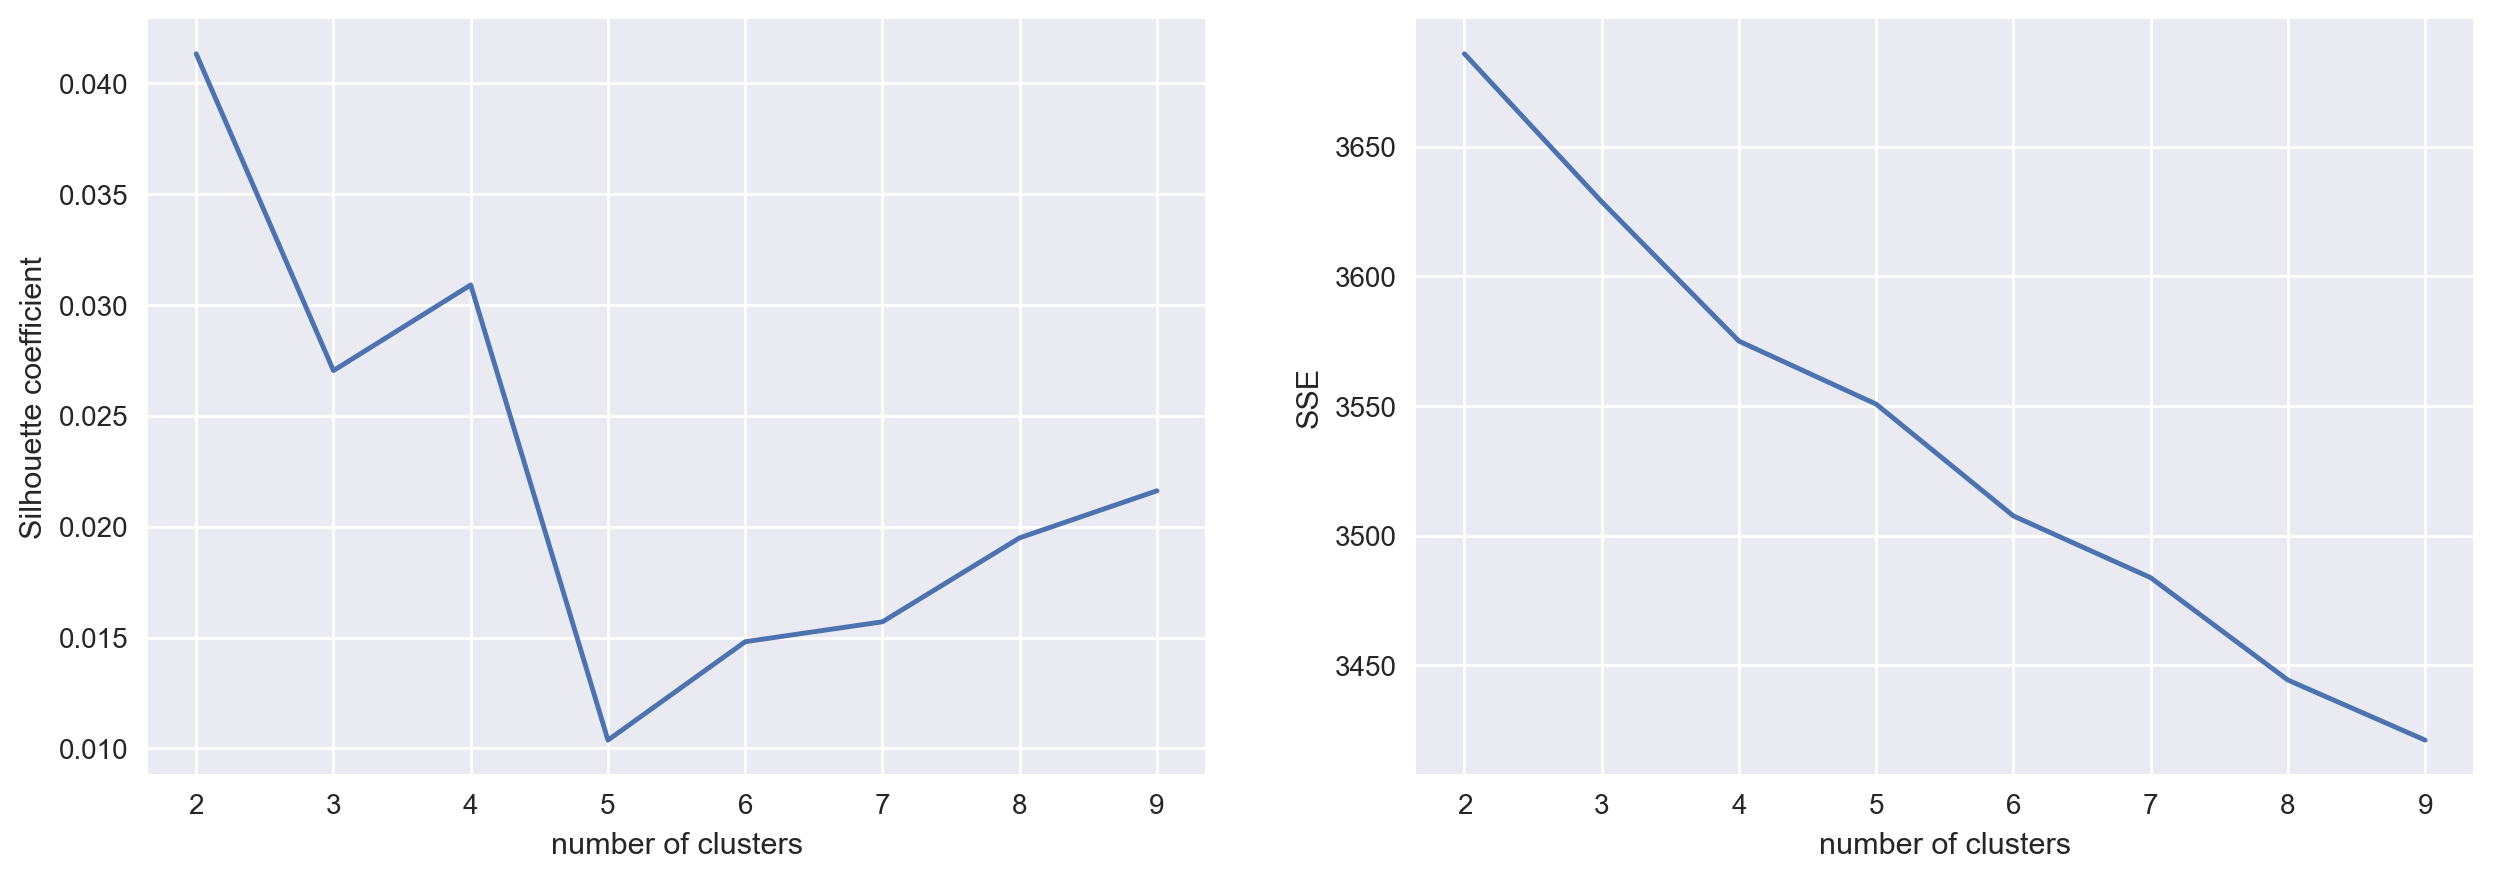

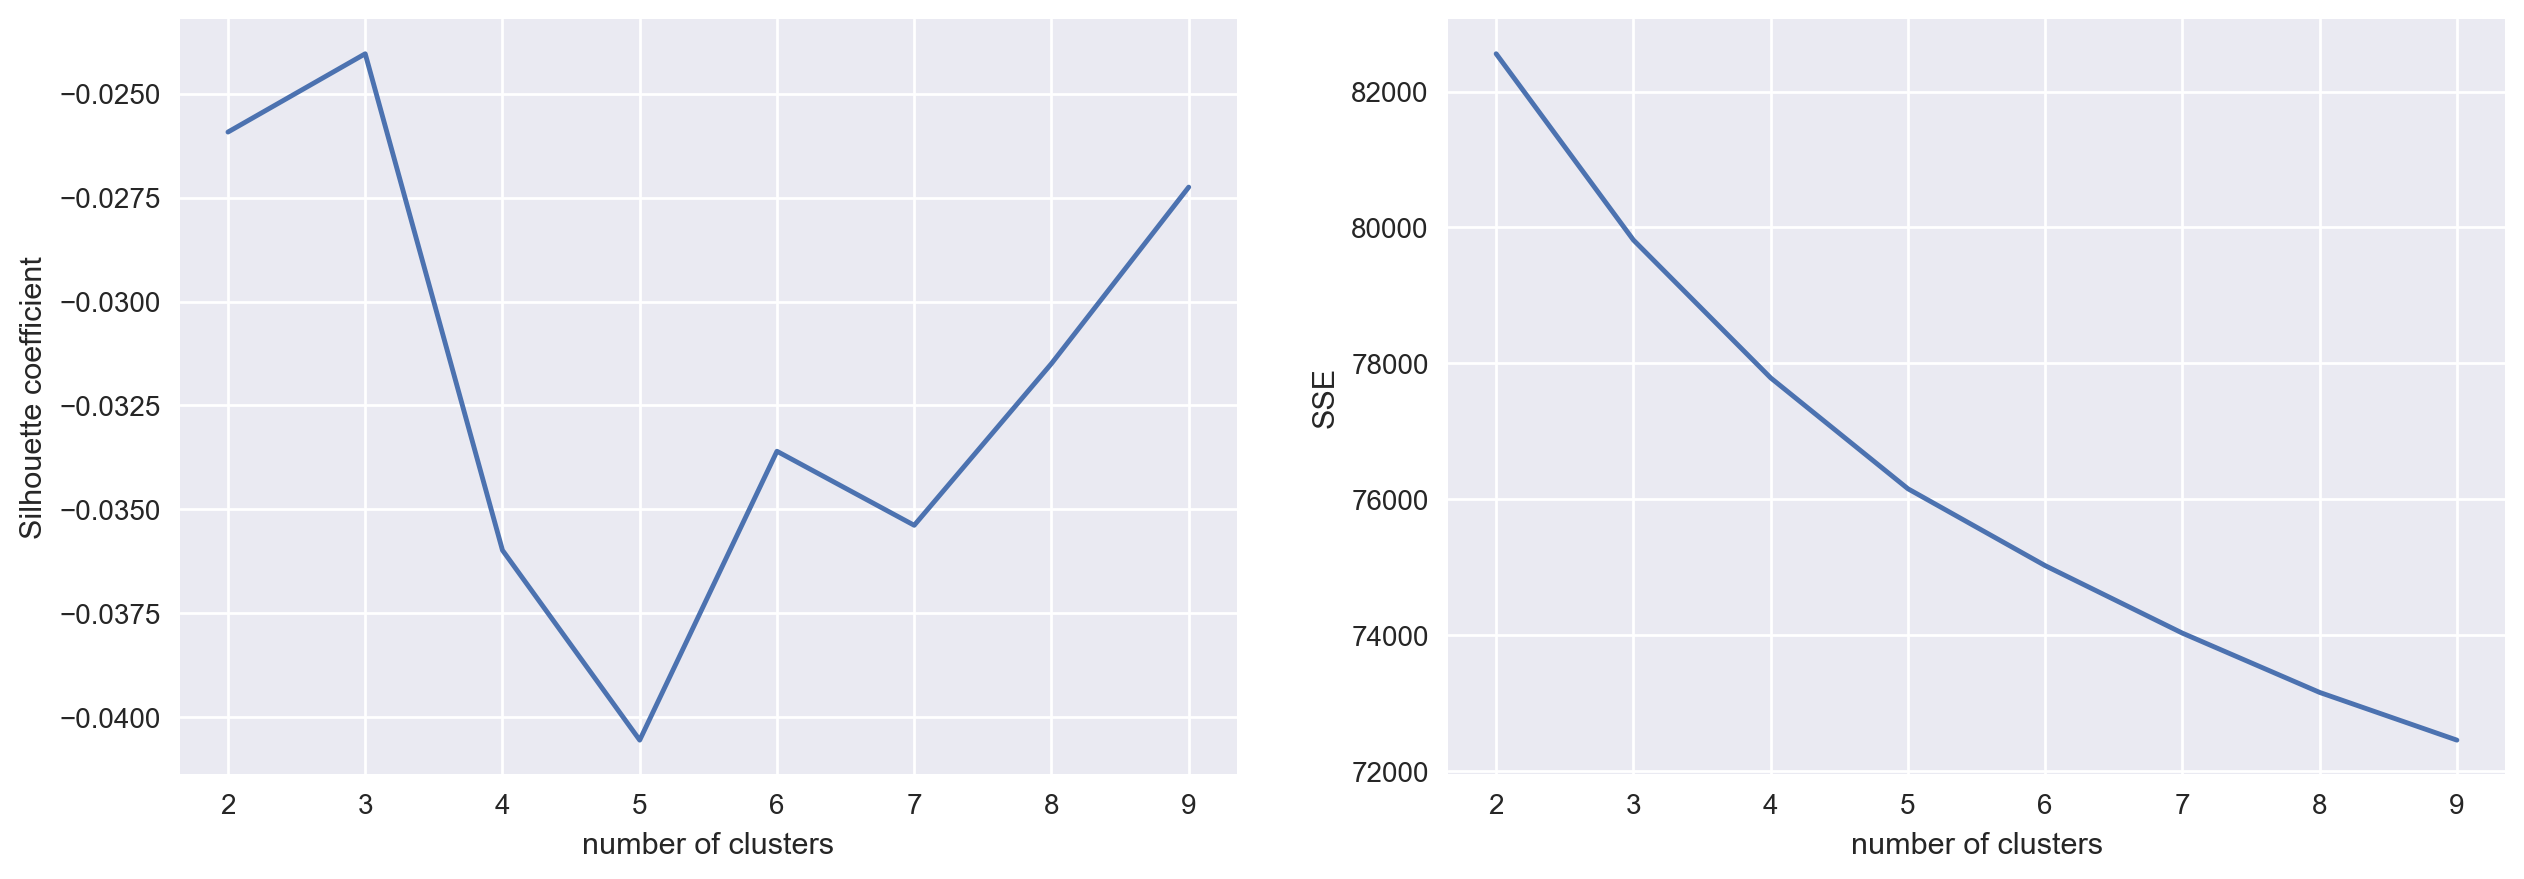

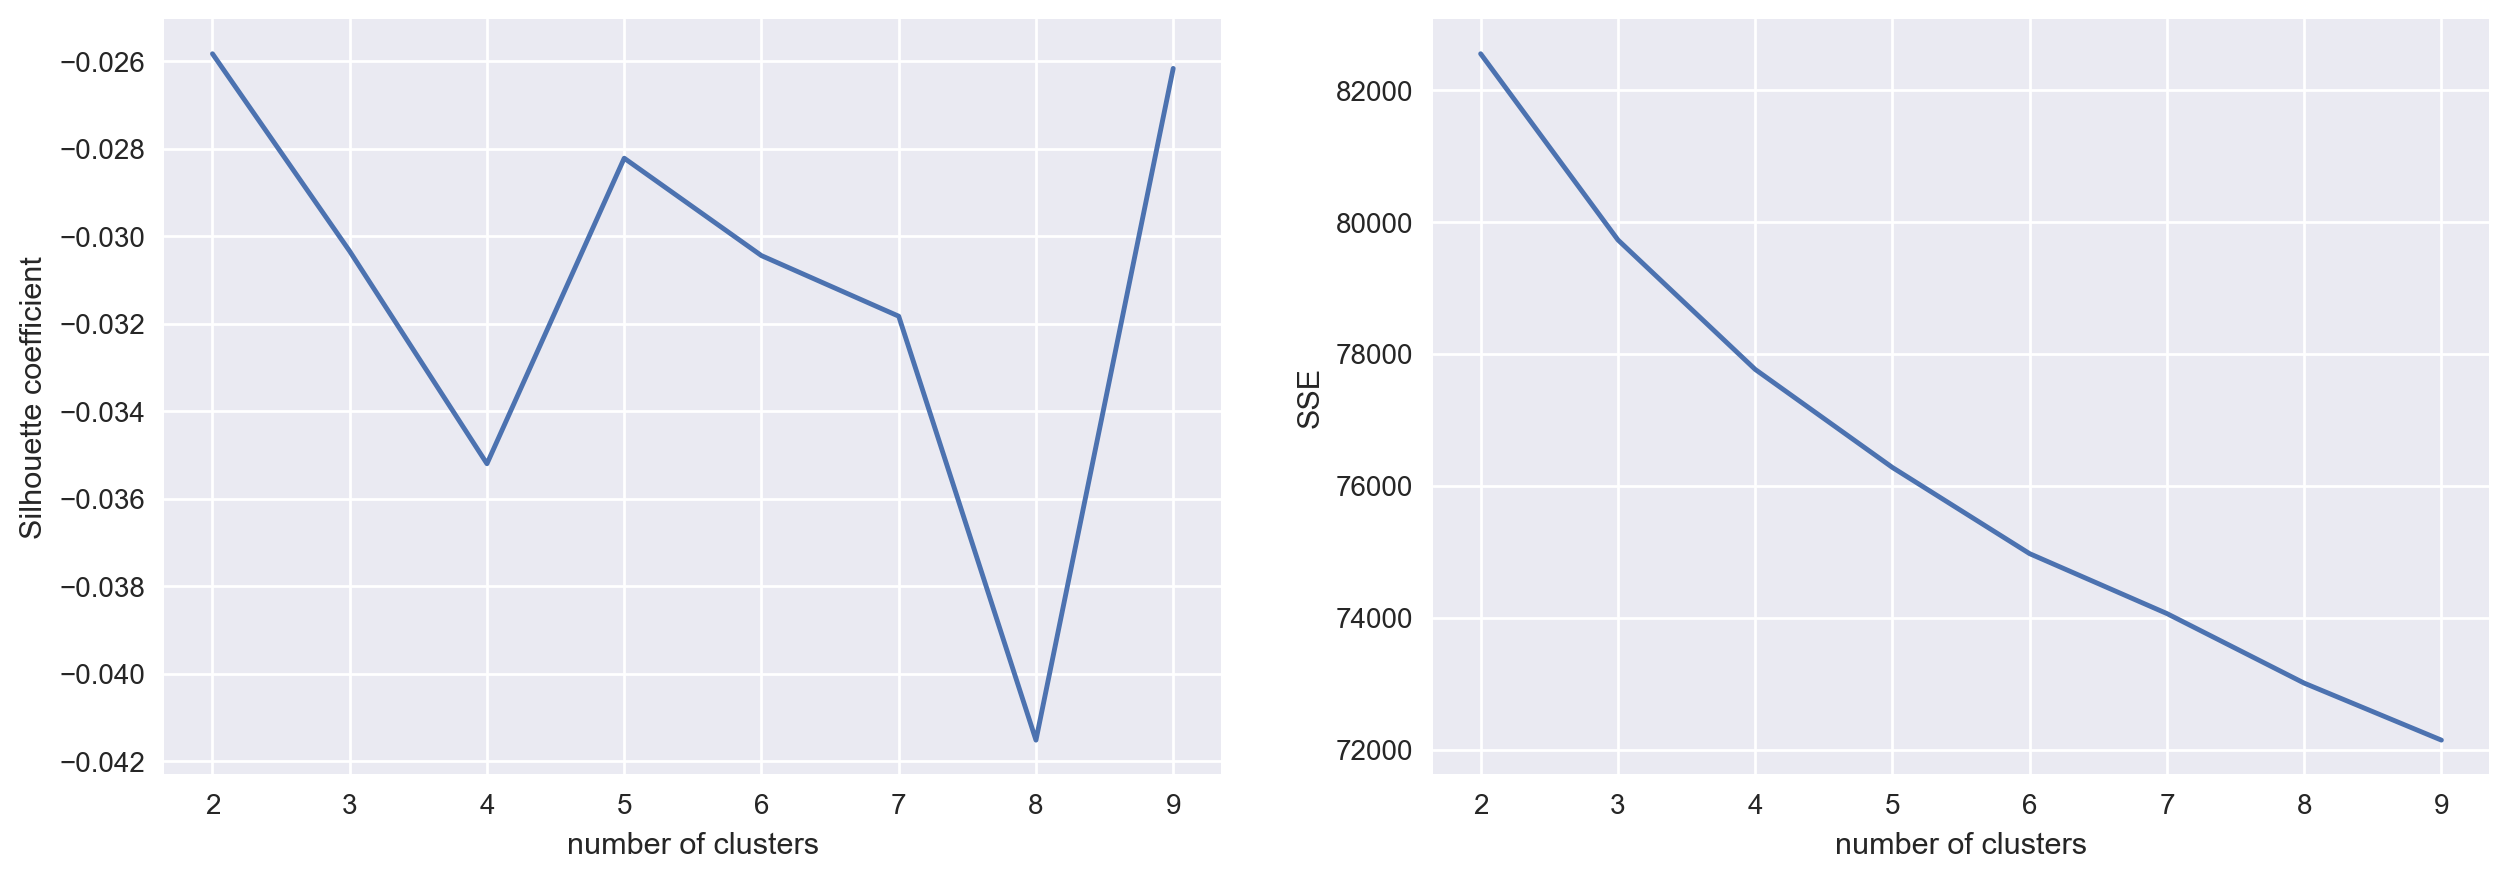

In [160]:
draw_KMeans_plot(Sil_coefs_lsa_tfidf, SSEs_lsa_tfidf)
draw_KMeans_plot(Sil_coefs_lsa_cv, SSEs_lsa_cv)
draw_KMeans_plot(Sil_coefs_nmf_cv, SSEs_nmf_cv)

In [164]:
# Dimension reduction

n_comp_100 = 100
lsa_tfidf_100 = TruncatedSVD(n_components=n_comp)
lsa_cv_100 = TruncatedSVD(n_components=n_comp)
nmf_cv_100 = NMF(n_components=n_comp)

In [165]:
lsa_tfidf_data_100 = lsa_tfidf_100.fit_transform(tfidf_data)
lsa_cv_data_100 = lsa_cv_100.fit_transform(cv_data)
nmf_cv_data_100 = lsa_cv_100.fit_transform(cv_data)

In [166]:
sum(lsa_tfidf_100.explained_variance_ratio_)

0.5338421300986401

In [167]:
Sil_coefs_lsa_tfidf_100, SSEs_lsa_tfidf_100 = KMeans_iterations(lsa_tfidf_data_100)
Sil_coefs_lsa_cv_100, SSEs_lsa_cv_100 = KMeans_iterations(lsa_cv_data_100)
Sil_coefs_nmf_cv_100, SSEs_nmf_cv_100 = KMeans_iterations(nmf_cv_data_100)


Initialization complete
start iteration
done sorting
end inner loop
Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
start iteration
Initialization complete
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 0, inertia 3746.0267782735805
start iteration
done sorting
end inner loop
Iteration 0, inertia 3756.0979659250224
start iteration
done sorting
end inner loop
Iteration 0, inertia 3753.9901613440225
start iteration
done sorting
end inner loop
Iteration 0, inertia 3749.2265651531916
start iteration
done sorting
end inner loop
Iteration 1, inertia 3731.8534587706063
start iteration
done sorting
end inner loop
Iteration 1, inertia 3751.5048701452456
start iteration
done sorting
end inner loop
Iteration 1, inertia 3733.2255053162803
Iteration 1, inertia 3748.29389757923
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 2, inertia 3728.768959536273
start iteration
don

start iteration
start iteration
done sorting
Iteration 1, inertia 3700.210472864871
start iteration
end inner loop
done sorting
done sorting
end inner loop
end inner loop
Iteration 23, inertia 3696.8756472908785
start iteration
done sorting
Iteration 26, inertia 3696.882328742685
start iteration
end inner loop
done sorting
end inner loop
Iteration 2, inertia 3696.9931187211996
start iteration
Iteration 4, inertia 3697.0352512676727
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 27, inertia 3696.8756472908785
Iteration 24, inertia 3696.8701736023586
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 28, inertia 3696.8701736023586
start iteration
done sorting
end inner loop
Iteration 3, inertia 3694.3638940970714
start iteration
done sorting
Iteration 25, inertia 3696.860825580419
end inner loop
start iteration
Iteration 5, inertia 3696.936939838487
done sorting
end inner loop
start iteration
done sorting
e

start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 16, inertia 3686.3821452473226
Iteration 14, inertia 3686.3740243723696
center shift 0.000000e+00 within tolerance 2.598311e-07
start iteration
done sorting
Iteration 16, inertia 3687.9118817423337
end inner loop
start iteration
done sorting
Iteration 15, inertia 3686.3740243723696
end inner loop
center shift 0.000000e+00 within tolerance 2.598311e-07
Iteration 17, inertia 3687.3315684529016
start iteration
done sorting
end inner loop
Iteration 18, inertia 3686.944799075141
start iteration
done sorting
end inner loop
Iteration 19, inertia 3686.6268963701664
start iteration
done sorting
end inner loop
Iteration 20, inertia 3686.486159355587
start iteration
done sorting
end inner loop
Iteration 21, inertia 3686.4121107378637
start iteration
done sorting
end inner loop
Iteration 22, inertia 3686.37950665951
start iteration
done sorting
end inner loop
Iteration 23, inertia 3686.

done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 20, inertia 3638.9317211892744
start iteration
done sorting
end inner loop
Iteration 8, inertia 3713.9298435224314
start iteration
done sorting
Iteration 20, inertia 3660.150143418108
end inner loop
start iteration
Iteration 3, inertia 3654.5629900364497
done sorting
end inner loop
start iteration
Iteration 21, inertia 3638.78348308582
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 22, inertia 3638.7510344439484
start iteration
Iteration 21, inertia 3660.1087488742737
done sorting
end inner loop
Iteration 9, inertia 3711.3048773872774
Iteration 4, inertia 3654.210009004657
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 23, inertia 3638.733985460128
start iteration
done sorting
Iteration 5, inertia 3654.1161766523674
end inner loop
start iteration
done sorting
end inner loop
Ite

Iteration 33, inertia 3681.3748900501937
end inner loop
center shift 0.000000e+00 within tolerance 2.598311e-07
Iteration 15, inertia 3639.8116767845336
start iteration
done sorting
end inner loop
Iteration 10, inertia 3638.225595781154
start iteration
done sorting
end inner loop
Iteration 18, inertia 3658.650527971742
start iteration
done sorting
end inner loop
Iteration 16, inertia 3639.2387980038434
start iteration
done sorting
end inner loop
Iteration 11, inertia 3638.2226307746264
start iteration
done sorting
end inner loop
Iteration 19, inertia 3658.644376927841
start iteration
done sorting
end inner loop
Iteration 17, inertia 3638.856738143458
start iteration
done sorting
end inner loop
Iteration 12, inertia 3638.2226307746264
center shift 0.000000e+00 within tolerance 2.598311e-07
Iteration 20, inertia 3658.619519348769
start iteration
Initialization complete
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 18, inertia 3638.512114590606
start it

done sorting
end inner loop
Iteration 82, inertia 3647.0286911414523
start iteration
done sorting
end inner loop
Iteration 83, inertia 3646.9659662236245
start iteration
done sorting
end inner loop
Iteration 84, inertia 3646.9048015374055
start iteration
done sorting
end inner loop
Iteration 85, inertia 3646.854008596564
start iteration
done sorting
end inner loop
Iteration 86, inertia 3646.8020049049946
start iteration
done sorting
end inner loop
Iteration 87, inertia 3646.747555387902
start iteration
done sorting
end inner loop
Iteration 88, inertia 3646.6716042332114
start iteration
done sorting
end inner loop
Iteration 89, inertia 3646.5718534991042
start iteration
done sorting
end inner loop
Iteration 90, inertia 3646.4809949930836
start iteration
done sorting
end inner loop
Iteration 91, inertia 3646.4035884431714
start iteration
done sorting
end inner loop
Iteration 92, inertia 3646.3181485127916
start iteration
done sorting
end inner loop
Iteration 93, inertia 3646.184250394082

done sorting
end inner loop
end inner loop
Iteration 14, inertia 3620.2305613993576
start iteration
done sorting
end inner loop
Iteration 15, inertia 3619.058419954794
start iteration
done sorting
end inner loop
Iteration 15, inertia 3664.927024283056
start iteration
done sorting
end inner loop
Iteration 16, inertia 3619.053105892189
Iteration 15, inertia 3620.170247699685
start iteration
start iteration
done sorting
done sorting
end inner loop
Initialization complete
end inner loop
start iteration
Iteration 16, inertia 3664.9068867717515
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 17, inertia 3619.048599430339
start iteration
done sorting
end inner loop
Iteration 0, inertia 3715.8457294106724
start iteration
done sorting
Iteration 18, inertia 3619.0455432846966
end inner loop
start iteration
done sorting
Iteration 16, inertia 3620.153055508729
end inner loop
start iteration
done sorting
end inner loop
Iteration 17, inertia 3664.900563616566
start 

start iteration
done sorting
end inner loop
end inner loop
Iteration 23, inertia 3629.299276439385
start iteration
done sorting
Iteration 17, inertia 3634.50683924202
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 3605.5682302461773
start iteration
done sorting
end inner loop
Iteration 18, inertia 3634.50683924202
center shift 0.000000e+00 within tolerance 2.598311e-07
Iteration 24, inertia 3626.9015675665437
start iteration
done sorting
end inner loop
Iteration 2, inertia 3595.8126048973713
Iteration 18, inertia 3604.5162436663672
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 25, inertia 3625.9551475375433
start iteration
done sorting
Iteration 19, inertia 3603.850897621405
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 3592.9447122618485
start iteration
Iteration 26, inertia 3625.6319386282557
start iteration
done sorting
done sorting
end inner loop
end inner loop
Ite

end inner loop
Iteration 0, inertia 3697.1430229436555
start iteration
done sorting
Iteration 0, inertia 3643.5808225834176
start iteration
done sorting
end inner loop
end inner loop
Iteration 0, inertia 3634.9408407791425
start iteration
done sorting
Iteration 1, inertia 3631.3656032213858
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 3649.862313595736
start iteration
Iteration 1, inertia 3579.3948258014943
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 2, inertia 3599.874124134723
start iteration
done sorting
end inner loop
Iteration 1, inertia 3577.227822402674
start iteration
done sorting
Iteration 2, inertia 3635.3920832829567
Iteration 2, inertia 3561.9166086588157
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 3, inertia 3584.8768262483086
start iteration
done sorting
end inner loop
Iteration 2, inertia 3568.3857822340383
start iteration
done sor

Iteration 6, inertia 3573.665420073347
end inner loop
start iteration
end inner loop
done sorting
end inner loop
Iteration 25, inertia 3599.7137250235014
Iteration 9, inertia 3595.7161840932336
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 7, inertia 3573.5581544194315
Iteration 10, inertia 3595.2710634146615
Iteration 28, inertia 3557.1786987788896
start iteration
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner loop
Iteration 26, inertia 3599.5544596274262
start iteration
done sorting
end inner loop
Iteration 8, inertia 3573.5110611278824
start iteration
done sorting
end inner loop
Iteration 11, inertia 3595.0803738608697
start iteration
Iteration 29, inertia 3557.158646449384
done sorting
start iteration
done sorting
Iteration 27, inertia 3599.5233198903943
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 12, inertia 3594.9925831028686


start iteration
done sorting
end inner loop
Iteration 17, inertia 3610.6800734505246
start iteration
done sorting
Iteration 15, inertia 3592.9552611770787
Iteration 15, inertia 3532.3361654623936
end inner loop
start iteration
done sorting
Iteration 12, inertia 3594.2702206315807
end inner loop
start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 18, inertia 3610.677773233851
start iteration
end inner loop
done sorting
end inner loop
Iteration 16, inertia 3592.399248479372
start iteration
Iteration 16, inertia 3532.334180274411
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 19, inertia 3610.6772867665554
Iteration 13, inertia 3593.8412189537335
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 17, inertia 3532.3291869605423
start iteration
done sorting
end inner loop
Iteration 17, inertia 3591.707574450368
start iteration
done sorting
end inner loop
Iteration 14, inertia 359

Iteration 5, inertia 3600.6051118209703
start iteration
done sorting
Iteration 4, inertia 3531.3392744797384
end inner loop
start iteration
Iteration 5, inertia 3548.369051926771
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 4, inertia 3644.7005233956716
start iteration
done sorting
end inner loop
Iteration 5, inertia 3530.0277533022154
start iteration
done sorting
Iteration 6, inertia 3541.842256066093
end inner loop
start iteration
done sorting
Iteration 6, inertia 3599.3632143081727
start iteration
end inner loop
done sorting
Iteration 5, inertia 3643.7173883562255
start iteration
done sorting
end inner loop
end inner loop
Iteration 7, inertia 3538.4187901995087
start iteration
done sorting
end inner loop
Iteration 6, inertia 3529.363180399979
Iteration 7, inertia 3595.8164786040293
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 6, inertia 3643.5784259095813
start iteration
done sorting
Iteration 

Iteration 2, inertia 3604.8976343312074
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 3, inertia 3558.184988789027
start iteration
done sorting
end inner loop
Iteration 15, inertia 3571.7357464934084
start iteration
done sorting
end inner loop
Iteration 3, inertia 3597.9570605349213
start iteration
done sorting
Iteration 16, inertia 3571.7347635090773
start iteration
done sorting
end inner loop
end inner loop
Iteration 4, inertia 3555.4056123469973
start iteration
done sorting
end inner loop
Iteration 4, inertia 3593.7217950876857
start iteration
done sorting
end inner loop
Iteration 17, inertia 3571.730224654104
start iteration
done sorting
end inner loop
Iteration 5, inertia 3554.5326742884276
start iteration
Initialization complete
done sorting
end inner loop
start iteration
done sorting
Iteration 5, inertia 3591.683793462104
end inner loop
start iteration
done sorting
end inner loop
Iteration 18, inertia 3571.730224654104
center sh

start iteration
done sorting
end inner loop
end inner loop
Iteration 12, inertia 3537.7781912005953
start iteration
done sorting
end inner loop
Iteration 22, inertia 3508.2542655429165
Iteration 25, inertia 3537.802816897777
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 13, inertia 3537.7503871698327
start iteration
done sorting
end inner loop
Iteration 23, inertia 3508.1016211672563
start iteration
done sorting
end inner loop
Iteration 14, inertia 3537.7362246336793
start iteration
done sorting
Iteration 26, inertia 3537.791175980904
end inner loop
start iteration
done sorting
Iteration 24, inertia 3507.928092015475
start iteration
done sorting
end inner loop
end inner loop
Iteration 15, inertia 3537.7287752232187
start iteration
done sorting
end inner loop
Iteration 25, inertia 3507.6557391222095
start iteration
done sorting
end inner loop
Iteration 27, inertia 3537.784490407736
start iteration
done sorting
end inner loop
Iteration 

start iteration
done sorting
Iteration 10, inertia 3514.064711335116
start iteration
end inner loop
done sorting
end inner loop
Iteration 10, inertia 3579.5627865411525
start iteration
done sorting
end inner loop
Iteration 11, inertia 3515.321949608929
start iteration
Iteration 13, inertia 3560.9586984045
done sorting
start iteration
done sorting
Iteration 11, inertia 3513.7752324346093
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 12, inertia 3514.8511071012617
start iteration
done sorting
Iteration 11, inertia 3579.558423263145
end inner loop
start iteration
done sorting
end inner loop
Iteration 14, inertia 3560.6188143151667
start iteration
Iteration 12, inertia 3513.24445871413
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 13, inertia 3514.5812648599594
Iteration 12, inertia 3579.555341299412
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 15, inertia 3560.453

start iteration
done sorting
end inner loop
end inner loop
Iteration 16, inertia 3526.5758118657955
start iteration
done sorting
Iteration 9, inertia 3516.480336272332
end inner loop
start iteration
done sorting
end inner loop
Iteration 2, inertia 3564.9312943390078
start iteration
done sorting
end inner loop
Iteration 10, inertia 3516.454250530117
start iteration
done sorting
end inner loop
Iteration 17, inertia 3526.5758118657955
Iteration 39, inertia 3507.6525912649977
center shift 0.000000e+00 within tolerance 2.598311e-07
center shift 0.000000e+00 within tolerance 2.598311e-07
Iteration 11, inertia 3516.4387517976543
start iteration
done sorting
end inner loop
Iteration 3, inertia 3553.9839626237517
start iteration
done sorting
end inner loop
Iteration 12, inertia 3516.430984003074
start iteration
done sorting
end inner loop
Iteration 13, inertia 3516.421820155
Iteration 4, inertia 3547.7155826547746
start iteration
start iteration
done sorting
done sorting
end inner loop
end inne

Iteration 22, inertia 3473.5668171562347
start iteration
end inner loop
done sorting
end inner loop
Iteration 15, inertia 3521.127392955436
start iteration
done sorting
end inner loop
Iteration 16, inertia 3521.1245734153695
Iteration 24, inertia 3540.7364387613898
start iteration
Iteration 23, inertia 3473.3901242384513
start iteration
done sorting
start iteration
done sorting
end inner loop
done sorting
end inner loop
end inner loop
Iteration 17, inertia 3521.12183350454
start iteration
done sorting
Iteration 25, inertia 3540.734369334248
end inner loop
start iteration
done sorting
end inner loop
Iteration 24, inertia 3473.338867530501
start iteration
done sorting
Iteration 18, inertia 3521.116786914765
end inner loop
start iteration
Iteration 26, inertia 3540.7327971358777
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 25, inertia 3473.28586271396
start iteration
done sorting
end inner loop
Iteration 19, inertia 3521.114104249248
Iteration 27, iner

done sorting
done sorting
Iteration 1, inertia 3524.241725589624
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 2, inertia 3572.313986481816
start iteration
done sorting
Iteration 1, inertia 3639.6928587979005
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 3563.1023380182182
start iteration
done sorting
Iteration 2, inertia 3506.0493363924347
start iteration
done sorting
end inner loop
end inner loop
Iteration 3, inertia 3559.9831983729987
start iteration
done sorting
Iteration 2, inertia 3540.976234596691
Iteration 2, inertia 3620.074689881175
end inner loop
start iteration
done sorting
start iteration
Iteration 3, inertia 3490.695482104644
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 4, inertia 3548.742707457064
start iteration
done sorting
end inner loop
Iteration 4, inertia 3477.9216295875453
start iteration
done sorting
end inner loop
Iteration 3

Iteration 9, inertia 3496.871204588983
start iteration
done sorting
end inner loop
Iteration 4, inertia 3493.4326084289914
start iteration
done sorting
end inner loop
Iteration 4, inertia 3508.553948329381
start iteration
done sorting
end inner loop
Iteration 28, inertia 3476.3794139999095
start iteration
done sorting
Iteration 10, inertia 3496.830744280883
end inner loop
start iteration
done sorting
end inner loop
Iteration 5, inertia 3480.9746592821293
start iteration
done sorting
end inner loop
Iteration 5, inertia 3507.349739950823
start iteration
done sorting
end inner loop
Iteration 29, inertia 3476.284628090413
start iteration
done sorting
Iteration 11, inertia 3496.7957075022464
start iteration
done sorting
end inner loop
end inner loop
Iteration 6, inertia 3477.2494089923416
start iteration
done sorting
end inner loop
Iteration 6, inertia 3506.777339507204
start iteration
done sorting
end inner loop
Iteration 30, inertia 3476.222439485885
Iteration 7, inertia 3474.543712966705

start iteration
done sorting
end inner loop
end inner loop
Iteration 3, inertia 3566.177957886696
Iteration 29, inertia 3496.7441884981417
start iteration
Iteration 33, inertia 3477.8250958936433
start iteration
done sorting
done sorting
end inner loop
end inner loop
start iteration
Iteration 54, inertia 3474.6168137745326
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 34, inertia 3477.7417924568854
start iteration
done sorting
Iteration 4, inertia 3561.3981404574924
end inner loop
start iteration
done sorting
Iteration 55, inertia 3474.6132907111014
start iteration
done sorting
Iteration 30, inertia 3496.69284656978
start iteration
end inner loop
done sorting
end inner loop
Iteration 56, inertia 3474.6132907111014
center shift 0.000000e+00 within tolerance 2.598311e-07
end inner loop
Iteration 31, inertia 3496.660121933006
Iteration 35, inertia 3477.7209321366886
start iteration
done sorting
end inner loop
Iteration 5, inertia 3559.571865213603
start

done sorting
end inner loop
Iteration 15, inertia 3561.2331943407107
start iteration
done sorting
Iteration 60, inertia 3496.33455091125
end inner loop
start iteration
done sorting
end inner loop
Iteration 23, inertia 3513.008873845317
start iteration
done sorting
end inner loop
Iteration 61, inertia 3496.3328873866208
start iteration
done sorting
end inner loop
Iteration 16, inertia 3561.2076489673736
start iteration
done sorting
end inner loop
Iteration 24, inertia 3513.0085029799584
start iteration
done sorting
end inner loop
Iteration 62, inertia 3496.332243164068
start iteration
done sorting
end inner loop
Iteration 17, inertia 3561.1923332152155
start iteration
done sorting
end inner loop
Iteration 25, inertia 3513.0085029799584
center shift 0.000000e+00 within tolerance 2.598311e-07
Iteration 18, inertia 3561.166586014014
start iteration
Iteration 63, inertia 3496.3310943875645
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 19, inertia 3561.147

start iteration
done sorting
Iteration 4, inertia 3577.367537073912
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 3511.592869154118
start iteration
Iteration 4, inertia 3466.7122297910605
done sorting
start iteration
end inner loop
done sorting
Iteration 4, inertia 3503.1768966927193
start iteration
done sorting
Iteration 4, inertia 3495.7608230637443
start iteration
done sorting
Iteration 5, inertia 3573.605528543748
end inner loop
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 5, inertia 3463.288390622397
start iteration
done sorting
end inner loop
Iteration 6, inertia 3570.635978439246
start iteration
done sorting
Iteration 5, inertia 3487.7098349765606
end inner loop
start iteration
done sorting
end inner loop
Iteration 6, inertia 3462.590507704962
start iteration
done sorting
end inner loop
Iteration 6, inertia 3483.0261977605905
start iteration
done sorting
Iteration 5, inertia 3497.933951461008
end inner loop

Iteration 10, inertia 3453.3988515833457
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 31, inertia 3462.6160283206286
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 11, inertia 3453.3261997689942
start iteration
done sorting
end inner loop
Iteration 4, inertia 3469.6100169350952
Iteration 0, inertia 3606.6742450434317
start iteration
Iteration 32, inertia 3462.433102257696
start iteration
done sorting
done sorting
Iteration 12, inertia 3453.2903808999617
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 5, inertia 3457.4411205196498
end inner loop
start iteration
done sorting
Iteration 1, inertia 3533.7411994566933
start iteration
done sorting
end inner loop
Iteration 33, inertia 3462.214626277843
start iteration
done sorting
end inner loop
end inner loop
Iteration 13, inertia 3453.26814614012
start iteration
done sorting
Iteration 34, in

start iteration
done sorting
end inner loop
Iteration 56, inertia 3434.932778227476
start iteration
done sorting
Iteration 37, inertia 3452.5852784818476
start iteration
end inner loop
done sorting
end inner loop
Iteration 24, inertia 3486.274926078116
start iteration
done sorting
end inner loop
Iteration 38, inertia 3452.5852784818476
center shift 0.000000e+00 within tolerance 2.598311e-07
Iteration 3, inertia 3554.458717706277
start iteration
done sorting
Iteration 25, inertia 3486.2212908892066
start iteration
done sorting
end inner loop
end inner loop
Iteration 57, inertia 3433.821899762944
start iteration
done sorting
end inner loop
Iteration 4, inertia 3549.9143764250903
start iteration
done sorting
end inner loop
Iteration 26, inertia 3486.1570622857257
start iteration
done sorting
Iteration 58, inertia 3432.2925539057533
start iteration
end inner loop
done sorting
end inner loop
Iteration 5, inertia 3548.1552712573152
start iteration
done sorting
end inner loop
Iteration 27, in

done sorting
end inner loop
Iteration 54, inertia 3485.103615595519
start iteration
done sorting
end inner loop
Iteration 5, inertia 3559.678443511813
start iteration
done sorting
end inner loop
Iteration 55, inertia 3485.088844462786
start iteration
done sorting
Iteration 20, inertia 3498.5859861544695
start iteration
end inner loop
done sorting
end inner loop
Iteration 6, inertia 3550.5524188008953
start iteration
done sorting
Iteration 21, inertia 3498.5859861544695
center shift 0.000000e+00 within tolerance 2.598311e-07
end inner loop
Iteration 56, inertia 3485.076350135259
start iteration
done sorting
end inner loop
Iteration 7, inertia 3546.24373440521
start iteration
done sorting
end inner loop
Iteration 57, inertia 3485.0715443901045
start iteration
done sorting
end inner loop
Iteration 58, inertia 3485.0706292472605
start iteration
done sorting
end inner loop
Iteration 8, inertia 3543.702919124973
start iteration
done sorting
end inner loop
Iteration 59, inertia 3485.070629247

done sorting
end inner loop
Iteration 94, inertia 3493.769982724576
start iteration
done sorting
end inner loop
Iteration 95, inertia 3493.740521784591
start iteration
done sorting
end inner loop
Iteration 96, inertia 3493.7223654517916
start iteration
done sorting
end inner loop
Iteration 97, inertia 3493.7089993121353
start iteration
done sorting
end inner loop
Iteration 98, inertia 3493.6958613241654
start iteration
done sorting
end inner loop
Iteration 99, inertia 3493.6855086130317
start iteration
done sorting
end inner loop
Iteration 100, inertia 3493.6786543036715
start iteration
done sorting
end inner loop
Iteration 101, inertia 3493.676338174675
start iteration
done sorting
end inner loop
Iteration 102, inertia 3493.6759574813286
start iteration
done sorting
end inner loop
Iteration 103, inertia 3493.6754645176784
start iteration
done sorting
end inner loop
Iteration 104, inertia 3493.67452223176
start iteration
done sorting
end inner loop
Iteration 105, inertia 3493.674106760

start iteration
done sorting
end inner loop
Iteration 7, inertia 82555.0488513779
start iteration
done sorting
Initialization complete
end inner loop
start iteration
done sorting
end inner loop
Iteration 4, inertia 82675.51720353086
start iteration
done sorting
end inner loop
Iteration 21, inertia 82553.63897221244
start iteration
done sorting
Iteration 5, inertia 82630.55863229884
end inner loop
start iteration
done sorting
end inner loop
Iteration 8, inertia 82553.99071129605
start iteration
done sorting
end inner loop
Iteration 0, inertia 86618.7500208081
start iteration
done sorting
end inner loop
Iteration 9, inertia 82553.78935637565
start iteration
done sorting
end inner loop
Iteration 22, inertia 82553.5865039034
start iteration
done sorting
end inner loop
Iteration 6, inertia 82594.60439657664
start iteration
done sorting
end inner loop
Iteration 1, inertia 85333.06545882566
start iteration
done sorting
end inner loop
Iteration 10, inertia 82553.45604449902
Iteration 2, inerti

start iteration
done sorting
done sorting
end inner loop
end inner loop
Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 0, inertia 85045.6471288457
start iteration
done sorting
end inner loop
Iteration 0, inertia 85239.75081946682
start iteration
done sorting
end inner loop
Iteration 0, inertia 84488.81398162725
start iteration
Iteration 0, inertia 83281.7892551765
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 81335.22276297456
start iteration
done sorting
Iteration 1, inertia 80848.26302406075
start iteration
end inner loop
done sorting
end inner loop
Iteration 1, inertia 81861.81205043488
start iteration
Iteration 1, inertia 80653.38101775845
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 2, inertia 80465.10576761723
start iteration
Iteration 2, inertia 80341.67913819388
start iteration
done sorting
done so

end inner loop
Iteration 9, inertia 80908.32466700465
start iteration
done sorting
end inner loop
Iteration 25, inertia 79888.17737305861
start iteration
done sorting
end inner loop
Iteration 24, inertia 79847.86432944435
start iteration
done sorting
end inner loop
Iteration 26, inertia 79880.51857639395
start iteration
done sorting
end inner loop
Initialization complete
Iteration 10, inertia 80880.93841395168
start iteration
start iteration
Iteration 25, inertia 79847.8118627455
done sorting
start iteration
end inner loop
done sorting
done sorting
end inner loop
end inner loop
Iteration 0, inertia 83209.13809303388
start iteration
done sorting
end inner loop
Iteration 11, inertia 80851.67989827844
start iteration
done sorting
Iteration 27, inertia 79862.6356515458
start iteration
end inner loop
done sorting
end inner loop
Iteration 26, inertia 79847.80103079973
center shift 2.330876e-03 within tolerance 6.065920e-06
Iteration 12, inertia 80828.61368094348
start iteration
done sorting


done sorting
end inner loop
end inner loop
Iteration 35, inertia 79855.2132891415
start iteration
done sorting
Iteration 3, inertia 81556.65133870833
end inner loop
start iteration
done sorting
Iteration 20, inertia 79895.92052240571
start iteration
end inner loop
done sorting
end inner loop
Iteration 16, inertia 79912.22661998613
start iteration
done sorting
end inner loop
Iteration 4, inertia 81324.02071067915
Iteration 36, inertia 79854.68518113236
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 21, inertia 79891.08190268328
start iteration
done sorting
end inner loop
Iteration 17, inertia 79900.91290332322
Iteration 37, inertia 79854.5664033505
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 5, inertia 81131.82530935573
Iteration 22, inertia 79888.13364046856
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 18, inertia 79893.2019578847

start iteration
done sorting
Iteration 6, inertia 79049.77246952926
start iteration
end inner loop
done sorting
end inner loop
done sorting
end inner loop
Iteration 8, inertia 78152.93608780362
start iteration
done sorting
end inner loop
Iteration 7, inertia 79024.15371265412
start iteration
done sorting
Iteration 7, inertia 77872.81665794895
Iteration 7, inertia 77928.6175720345
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 8, inertia 77882.36970882525
start iteration
done sorting
end inner loop
Iteration 8, inertia 77831.45908160965
start iteration
done sorting
Iteration 9, inertia 78103.55002193917
end inner loop
start iteration
done sorting
end inner loop
Iteration 8, inertia 79005.68474455758
start iteration
done sorting
end inner loop
Iteration 9, inertia 77816.47667913212
Iteration 9, inertia 77853.23555555768
start iteration
done sorting
end inner loop
Iteration 10, inertia 78071.6910089308
start iteration
start

start iteration
done sorting
end inner loop
Iteration 33, inertia 77810.3936121635
center shift 0.000000e+00 within tolerance 6.065920e-06
Iteration 12, inertia 78501.5617974406
Iteration 0, inertia 82313.07070840747
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 1, inertia 80506.28281047248
start iteration
done sorting
Iteration 34, inertia 78204.46077950322
start iteration
done sorting
end inner loop
end inner loop
Iteration 13, inertia 78386.42719066546
start iteration
done sorting
end inner loop
Iteration 35, inertia 78189.92787494752
start iteration
done sorting
end inner loop
Iteration 14, inertia 78261.20428303577
start iteration
Iteration 2, inertia 79709.93994675034
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 36, inertia 78178.32516924065
start iteration
done sorting
end inner loop
Initialization complete
Iteration 37, inertia 78161.47476913469
start iteration
start iteration
done sorting


end inner loop
Iteration 22, inertia 78179.31225602918
start iteration
done sorting
end inner loop
Iteration 8, inertia 78296.14004793648
start iteration
done sorting
end inner loop
Iteration 12, inertia 78377.94090281759
Iteration 26, inertia 77832.96792452605
start iteration
center shift 0.000000e+00 within tolerance 6.065920e-06
done sorting
end inner loop
Iteration 13, inertia 78377.66417433048
start iteration
done sorting
end inner loop
Iteration 9, inertia 78295.40998760602
start iteration
done sorting
end inner loop
Iteration 23, inertia 78179.23539828595
start iteration
done sorting
end inner loop
Iteration 14, inertia 78377.59569309911
start iteration
done sorting
end inner loop
Iteration 10, inertia 78294.70694011159
start iteration
Iteration 24, inertia 78179.20561744607
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 15, inertia 78377.54749884222
Iteration 11, inertia 78293.45583030597
start iteration
start iteration
done sorting
done sorti

start iteration
done sorting
end inner loop
Iteration 5, inertia 77126.44440435161
Iteration 4, inertia 77229.24589546211
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 4, inertia 76459.55599182172
start iteration
done sorting
end inner loop
Iteration 5, inertia 76544.20247490963
start iteration
done sorting
Iteration 6, inertia 76949.01762381829
end inner loop
start iteration
done sorting
end inner loop
Iteration 6, inertia 76446.72814576738
start iteration
done sorting
end inner loop
Iteration 5, inertia 76388.94751243637
start iteration
done sorting
Iteration 5, inertia 77186.67395021788
end inner loop
start iteration
done sorting
end inner loop
Iteration 7, inertia 76871.3184909673
start iteration
done sorting
end inner loop
Iteration 6, inertia 77149.19359677775
Iteration 7, inertia 76379.94965038785
start iteration
done sorting
start iteration
Iteration 6, inertia 76318.22365260527
end inner loop
start iteration
done sorting
done

Iteration 8, inertia 77054.60657266308
start iteration
done sorting
Iteration 0, inertia 80971.35717933827
Iteration 4, inertia 76766.09955719463
end inner loop
Iteration 11, inertia 77067.93164892182
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 9, inertia 76906.9800516638
start iteration
Iteration 1, inertia 78179.0283755578
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 5, inertia 76726.17036567842
Iteration 12, inertia 77006.64014116398
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 10, inertia 76835.75584548869
Iteration 13, inertia 76963.71160160571
start iteration
done sorting
start iteration
Iteration 2, inertia 77673.54195241939
end inner loop
start iteration
done sorting
end inner loop
done sorting
Iteration 6, inertia 76693.55758892208
start iteration
done sorting
end inner loop
end inner loop
It

start iteration
done sorting
end inner loop
Iteration 27, inertia 76491.58695050795
start iteration
Iteration 6, inertia 78142.85784200985
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 7, inertia 78141.17735618803
Iteration 28, inertia 76486.5221277371
start iteration
Iteration 14, inertia 76422.09751739116
start iteration
done sorting
end inner loop
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 15, inertia 76416.74357819947
start iteration
done sorting
end inner loop
Iteration 8, inertia 78139.42424828495
start iteration
Iteration 29, inertia 76483.7795290805
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 9, inertia 78134.17586962097
start iteration
Iteration 16, inertia 76415.27917808351
done sorting
start iteration
end inner loop
done sorting
Iteration 30, inertia 76482.40063053327
end inner loop
start iteration
done sorting
end inner loop
Iteration 10, inertia 78128.3045381719

done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 13, inertia 75454.636675029
start iteration
Iteration 13, inertia 75866.05907649771
done sorting
start iteration
end inner loop
Iteration 13, inertia 75924.62202510909
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 13, inertia 75751.39209858674
start iteration
Iteration 14, inertia 75442.55131954
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 14, inertia 75747.32068323367
Iteration 14, inertia 75800.74927656232
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 14, inertia 75923.2662541041
start iteration
done sorting
end inner loop
end inner loop
Iteration 15, inertia 75434.83700688885
start iteration
done sorting
end inner loop
Iteration 15, inertia 75569.81861427006
start iteration
done sorting
Iteration 15, inertia 75740.40583390639
start iteration
end inner loop
done sorting
end inner loop
Iteration 

done sorting
end inner loop
end inner loop
Iteration 0, inertia 80593.41098717591
Iteration 11, inertia 75769.39324071845
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 5, inertia 75866.3794938905
start iteration
done sorting
Iteration 7, inertia 75702.41844573949
start iteration
done sorting
end inner loop
end inner loop
Iteration 12, inertia 75734.82414884346
start iteration
Iteration 1, inertia 77706.90906433124
done sorting
start iteration
done sorting
end inner loop
Iteration 6, inertia 75729.7626424251
end inner loop
start iteration
done sorting
end inner loop
Iteration 13, inertia 75700.40465092321
Iteration 8, inertia 75672.3963254279
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 2, inertia 76920.49232901054
start iteration
done sorting
Iteration 7, inertia 75651.8717897614
end inner loop
start iteration
done sorting
Iteration 9, inertia 75658.82452556943
start iteration
done 

done sorting
end inner loop
Iteration 32, inertia 75468.02114203124
start iteration
done sorting
end inner loop
Iteration 1, inertia 78529.78962998503
start iteration
Iteration 25, inertia 75607.17934841105
start iteration
done sorting
Iteration 33, inertia 75467.43457283046
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 37, inertia 74858.92361694074
start iteration
done sorting
end inner loop
Iteration 26, inertia 75607.15919961232
start iteration
done sorting
end inner loop
Iteration 2, inertia 76776.18838266138
start iteration
Iteration 38, inertia 74857.3875082036
done sorting
start iteration
done sorting
end inner loop
Iteration 34, inertia 75467.16028932278
start iteration
done sorting
end inner loop
end inner loop
Iteration 39, inertia 74856.75329563874
start iteration
done sorting
end inner loop
Iteration 27, inertia 75606.54420770267
start iteration
done sorting
end inner loop
Iteration 35, inertia 75467.15166591592
start itera

start iteration
done sorting
end inner loop
Iteration 8, inertia 75275.612481111
start iteration
Iteration 9, inertia 74983.77558450443
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 8, inertia 74761.13212811349
start iteration
done sorting
end inner loop
Iteration 10, inertia 75210.35551184524
start iteration
done sorting
Iteration 10, inertia 74936.61744683492
end inner loop
start iteration
done sorting
Iteration 9, inertia 75258.52246446461
end inner loop
start iteration
done sorting
end inner loop
Iteration 9, inertia 74600.41185299837
start iteration
Iteration 11, inertia 74904.4200458579
done sorting
Iteration 10, inertia 75203.62694154431
start iteration
end inner loop
Iteration 11, inertia 75198.4336938827
start iteration
done sorting
done sorting
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 10, inertia 74568.11350868284
start iteration
done sorting
end inner loop
Iteration 12, inertia 75186.63590372693
s

end inner loop
Iteration 12, inertia 74708.52868643762
Iteration 6, inertia 74818.70898391391
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 36, inertia 74701.46400939988
end inner loop
start iteration
done sorting
end inner loop
Iteration 12, inertia 74682.80073936039
start iteration
Iteration 7, inertia 74724.34652685894
done sorting
start iteration
end inner loop
Iteration 37, inertia 74701.46400939988
center shift 0.000000e+00 within tolerance 6.065920e-06
Iteration 13, inertia 74696.23363062914
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 13, inertia 74673.10925160424
start iteration
done sorting
end inner loop
Iteration 8, inertia 74644.15813172515
start iteration
Iteration 14, inertia 74654.10468165904
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 74662.01500192526
start iteration
done sorting
end inner loop
Iteration 15, inertia 74653.38241686436
Iteration 15

end inner loop
Initialization complete
start iteration
done sorting
end inner loop
Iteration 38, inertia 74583.94860784194
center shift 0.000000e+00 within tolerance 6.065920e-06
Iteration 19, inertia 74609.26257691937
start iteration
done sorting
end inner loop
Iteration 0, inertia 81279.20271056604
start iteration
done sorting
end inner loop
Iteration 20, inertia 74607.4492316362
start iteration
done sorting
end inner loop
Iteration 1, inertia 77820.89227414406
start iteration
done sorting
end inner loop
Iteration 21, inertia 74607.03755081906
start iteration
done sorting
end inner loop
Iteration 2, inertia 75933.0596610167
start iteration
done sorting
Initialization complete
end inner loop
Iteration 22, inertia 74606.83851785112
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 75152.74832366315
Iteration 23, inertia 74606.78271343594
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Ite

end inner loop
Iteration 12, inertia 74028.9972332854
start iteration
Iteration 11, inertia 73559.40473603984
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 13, inertia 74549.83355734801
start iteration
done sorting
end inner loop
Iteration 12, inertia 73467.86483134681
start iteration
done sorting
end inner loop
Iteration 12, inertia 73559.17765058005
start iteration
done sorting
end inner loop
Iteration 14, inertia 74502.72041585295
start iteration
done sorting
end inner loop
Iteration 13, inertia 74010.96108799201
start iteration
done sorting
end inner loop
Iteration 13, inertia 73467.08284323347
start iteration
done sorting
end inner loop
Iteration 14, inertia 74001.38849023606
start iteration
done sorting
end inner loop
Iteration 13, inertia 73559.0409359271
start iteration
done sorting
end inner loop
Iteration 15, inertia 74450.71205008535
start iteration
done sorting
end inner loop
Iteration 14, inertia 73558.82559635582
start iteration
Iterati

start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 0, inertia 77286.99158786803
start iteration
Iteration 17, inertia 73793.00496957172
done sorting
start iteration
done sorting
Iteration 19, inertia 72866.07340690143
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 8, inertia 73579.75382543678
start iteration
done sorting
Iteration 18, inertia 73789.14387969677
start iteration
end inner loop
done sorting
end inner loop
Iteration 20, inertia 72835.3893330877
Iteration 9, inertia 73533.8541347057
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 1, inertia 75405.70297392897
start iteration
done sorting
Iteration 21, inertia 72830.7808552483
start iteration
done sorting
Iteration 10, inertia 73495.42150535883
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 19, inertia 73777.1231970526
start iteration
Iteration 2, inertia 74761.44617119653
d

start iteration
done sorting
end inner loop
Iteration 13, inertia 73775.4017733483
start iteration
done sorting
end inner loop
Iteration 29, inertia 73629.45970627344
start iteration
done sorting
end inner loop
Iteration 10, inertia 73359.38637268088
start iteration
done sorting
end inner loop
Iteration 14, inertia 73774.79587820212
start iteration
done sorting
end inner loop
Iteration 30, inertia 73629.35126900181
start iteration
done sorting
end inner loop
Iteration 15, inertia 73774.0411380282
start iteration
done sorting
Iteration 11, inertia 73357.29446834822
end inner loop
start iteration
done sorting
end inner loop
Iteration 31, inertia 73629.34103767475
start iteration
done sorting
end inner loop
Iteration 12, inertia 73353.58901701236
start iteration
Iteration 16, inertia 73773.10659040652
done sorting
end inner loop
Iteration 32, inertia 73629.32672699894
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 33, inertia 73629.326726

Iteration 17, inertia 73869.13089626643
Iteration 16, inertia 72671.95550131777
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 15, inertia 73483.99692552457
start iteration
Iteration 14, inertia 73254.77516393394
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 16, inertia 73469.81805334741
Iteration 17, inertia 72670.84203894719
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 15, inertia 73253.84903213673
Iteration 18, inertia 73865.73435139356
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 18, inertia 72670.73218555504
Iteration 17, inertia 73433.96755950274
Iteration 19, inertia 73861.57567561888
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 16, inertia 73253.31790990844
start iteration
done sorting
end inn

Iteration 46, inertia 73491.39193152754
start iteration
done sorting
end inner loop
Iteration 5, inertia 73271.64954369268
start iteration
done sorting
end inner loop
Iteration 16, inertia 72580.03009294748
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 15, inertia 73236.66342435942
start iteration
done sorting
Iteration 47, inertia 73490.66110056856
start iteration
Iteration 17, inertia 72525.65052264914
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 6, inertia 73103.70793314956
start iteration
done sorting
end inner loop
Iteration 18, inertia 72459.37301204936
start iteration
Iteration 16, inertia 73233.15137264511
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 7, inertia 73004.62086393553
start iteration
done sorting
Iteration 48, inertia 73490.61590168727
start iteration
done sorting
end inner loop
end inner loop
Iteration 17, inertia 73228.8870074

end inner loop
Iteration 9, inertia 72904.86548088632
start iteration
done sorting
Iteration 43, inertia 73126.50699519167
end inner loop
start iteration
done sorting
end inner loop
Iteration 5, inertia 73173.03251054742
start iteration
done sorting
end inner loop
Iteration 10, inertia 72904.71009165022
start iteration
done sorting
Iteration 18, inertia 73387.3870378562
start iteration
done sorting
end inner loop
end inner loop
Iteration 44, inertia 73126.13237469127
start iteration
done sorting
end inner loop
Iteration 6, inertia 73030.02929374819
start iteration
done sorting
Iteration 11, inertia 72904.5046033233
start iteration
done sorting
end inner loop
end inner loop
Iteration 19, inertia 73382.80565499542
start iteration
done sorting
end inner loop
Iteration 7, inertia 72959.62555476122
start iteration
Iteration 45, inertia 73126.01110500806
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 20, inertia 73342.9385689068
Iteration 12, inertia 72903.

Iteration 11, inertia 82547.19066214435
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 10, inertia 82545.03618228146
Iteration 13, inertia 82563.56188647133
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 13, inertia 82544.79395484728
start iteration
done sorting
Iteration 11, inertia 82544.70412066275
end inner loop
start iteration
done sorting
Iteration 12, inertia 82546.26387338992
end inner loop
start iteration
done sorting
end inner loop
Iteration 14, inertia 82557.09184596768
start iteration
done sorting
end inner loop
Iteration 13, inertia 82546.11800707935
start iteration
done sorting
end inner loop
Iteration 14, inertia 82544.71590825984
start iteration
done sorting
end inner loop
Iteration 12, inertia 82544.58891313693
start iteration
done sorting
end inner loop
Iteration 15, inertia 82554.12208262141
start iteration
done sorting
end inner loop
Iteration 13, inertia 82544.5442

end inner loop
Iteration 8, inertia 82559.02851590209
start iteration
done sorting
Iteration 15, inertia 82544.58891313693
end inner loop
Iteration 1, inertia 83870.39316840124
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 9, inertia 82555.33234580049
start iteration
done sorting
end inner loop
Iteration 16, inertia 82544.54426949784
start iteration
done sorting
end inner loop
Iteration 2, inertia 82853.54256112322
start iteration
done sorting
end inner loop
Iteration 10, inertia 82552.92643837708
Iteration 17, inertia 82544.49562194427
start iteration
start iteration
done sorting
done sorting
Iteration 3, inertia 82709.48601287034
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 18, inertia 82544.49562194427
center shift 0.000000e+00 within tolerance 6.065306e-06
Iteration 11, inertia 82551.38941583205
start iteration
done sorting
end inner loop
Iteration 4, inertia 82660.25616931157
start iteration

done sorting
end inner loop
end inner loop
Iteration 13, inertia 80495.60388156104
center shift 0.000000e+00 within tolerance 6.065306e-06
Iteration 13, inertia 79781.98940637204
start iteration
Iteration 12, inertia 79842.4613970671
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 13, inertia 79993.41593340447
start iteration
done sorting
end inner loop
Iteration 14, inertia 79781.98940637204
center shift 0.000000e+00 within tolerance 6.065306e-06
Iteration 14, inertia 79945.58710577853
start iteration
done sorting
end inner loop
Iteration 13, inertia 79836.34539009738
start iteration
done sorting
end inner loop
Iteration 15, inertia 79932.49175882956
start iteration
done sorting
Iteration 14, inertia 79835.29370452109
end inner loop
start iteration
done sorting
end inner loop
Iteration 16, inertia 79923.17381506997
start iteration
Iteration 15, inertia 79835.15761255038
done sorting
start iteration
done sorting
end inner loop
Initialization complete
s

end inner loop
Iteration 0, inertia 84031.59558437511
start iteration
Iteration 6, inertia 80796.33923310433
done sorting
Iteration 2, inertia 81809.51104107303
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 3, inertia 81574.27810895444
start iteration
done sorting
Iteration 1, inertia 82424.74954636866
start iteration
done sorting
Iteration 7, inertia 80768.20690066654
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 8, inertia 80740.43928741087
start iteration
done sorting
end inner loop
Iteration 2, inertia 81159.65348051355
start iteration
done sorting
end inner loop
Iteration 4, inertia 81328.08836853832
Iteration 9, inertia 80712.32088285543
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 3, inertia 80773.43007260824
start iteration
done sorting
Iteration 5, inertia 81152.10830280838
start iteration
end inner loop
done sorting
end 

start iteration
done sorting
Iteration 5, inertia 79192.69344172314
end inner loop
start iteration
done sorting
Iteration 5, inertia 77998.34982090177
end inner loop
start iteration
done sorting
end inner loop
Iteration 5, inertia 78692.28851410467
start iteration
done sorting
end inner loop
Iteration 7, inertia 79512.03546822455
Iteration 6, inertia 79134.1826830279
start iteration
done sorting
end inner loop
Iteration 6, inertia 77878.17905424804
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 7, inertia 79024.7008544925
start iteration
done sorting
end inner loop
Iteration 6, inertia 78534.24300613739
start iteration
done sorting
end inner loop
Iteration 8, inertia 79473.30644429123
start iteration
done sorting
end inner loop
Iteration 7, inertia 77816.41666769903
start iteration
done sorting
end inner loop
Iteration 7, inertia 78459.7820095511
start iteration
Iteration 8, inertia 78923.19195826504
start iteration
done sorting
Iterat

done sorting
Iteration 13, inertia 78527.21366557154
end inner loop
Iteration 31, inertia 77801.79928475074
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 32, inertia 77784.00986097951
start iteration
done sorting
end inner loop
Iteration 14, inertia 78526.90400697356
start iteration
done sorting
Iteration 2, inertia 78430.01183552423
end inner loop
Iteration 33, inertia 77784.00986097951
Iteration 32, inertia 77801.71298406809
start iteration
center shift 0.000000e+00 within tolerance 6.065306e-06
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 15, inertia 78526.6984165952
start iteration
done sorting
end inner loop
Iteration 3, inertia 78256.34811582365
start iteration
done sorting
end inner loop
Iteration 33, inertia 77801.71298406809
center shift 0.000000e+00 within tolerance 6.065306e-06
Iteration 16, inertia 78526.65633406179
start iteration
done sorting
end inner loop
Iteration 17, inertia 78526

start iteration
center shift 0.000000e+00 within tolerance 6.065306e-06
done sorting
end inner loop
Iteration 13, inertia 78173.45409847818
start iteration
done sorting
end inner loop
Iteration 14, inertia 78170.94053471007
start iteration
done sorting
end inner loop
Iteration 15, inertia 78170.5040540022
start iteration
done sorting
end inner loop
Iteration 16, inertia 78170.195285133
start iteration
done sorting
end inner loop
Iteration 17, inertia 78170.06277939926
start iteration
done sorting
end inner loop
Iteration 18, inertia 78169.97590214673
start iteration
done sorting
end inner loop
Iteration 19, inertia 78169.84872079799
start iteration
done sorting
end inner loop
Iteration 20, inertia 78169.80441961419
start iteration
done sorting
end inner loop
Iteration 21, inertia 78169.80441961419
center shift 0.000000e+00 within tolerance 6.065306e-06
Initialization complete
Initialization complete
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop

start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 21, inertia 76289.67204659671
start iteration
done sorting
end inner loop
Iteration 21, inertia 76578.94485636071
Iteration 21, inertia 76452.03297593091
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 22, inertia 76449.56831366557
Iteration 22, inertia 76578.55207785119
Iteration 22, inertia 76289.45217795631
start iteration
done sorting
start iteration
end inner loop
start iteration
done sorting
Iteration 23, inertia 77386.99161004741
end inner loop
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 23, inertia 76289.36249970824
start iteration
done sorting
end inner loop
Iteration 23, inertia 76578.55207785119
center shift 0.000000e+00 within tolerance 6.065306e-06
Iteration 24, inertia 77386.92035252828
start iteration
done sorting
end inner loop
Iteration 23, inertia 76449.21213626073
start iteration
done

start iteration
end inner loop
done sorting
end inner loop
Iteration 19, inertia 76475.27921174701
start iteration
Iteration 16, inertia 76595.88068324543
done sorting
Iteration 20, inertia 76808.40216568373
start iteration
start iteration
done sorting
end inner loop
Iteration 21, inertia 76660.4391669594
start iteration
end inner loop
done sorting
end inner loop
done sorting
end inner loop
Iteration 20, inertia 76435.39731072712
start iteration
done sorting
end inner loop
Iteration 21, inertia 76807.47289240507
start iteration
done sorting
end inner loop
Iteration 17, inertia 76594.01980276789
start iteration
done sorting
Iteration 21, inertia 76415.23096635607
start iteration
Iteration 22, inertia 76658.94864483044
end inner loop
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 23, inertia 76658.32164430308
Iteration 18, inertia 76592.85639025
Iteration 22, inertia 76807.45255485144
start iteration
start iteration
done sorting
done sorting
end inner l

done sorting
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Initialization complete
start iteration
Iteration 1, inertia 77295.17328298462
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 1, inertia 76298.06219606558
start iteration
Iteration 0, inertia 80247.84790968442
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 0, inertia 82028.50693513354
start iteration
Iteration 2, inertia 76885.21373785344
done sorting
start iteration
done sorting
Iteration 1, inertia 76907.72158619002
end inner loop
start iteration
end inner loop
done sorting
end inner loop
Iteration 2, inertia 75961.45317573153
start iteration
done sorting
end inner loop
Iteration 1, inertia 78127.96476104422
start iteration
done sorting
Iteration 3, inertia 76486.99306187322
Iteration 2, inertia 76285.77381880156
end inner loop
Iteration 3, inertia 75902.95790794889
start iteration
done sorting
start 

Iteration 26, inertia 75483.84066648097
start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 5, inertia 76458.7066273436
end inner loop
start iteration
done sorting
end inner loop
Iteration 1, inertia 76385.30913600393
start iteration
done sorting
end inner loop
Iteration 27, inertia 75483.7538438159
start iteration
done sorting
end inner loop
Iteration 6, inertia 76389.29658342472
start iteration
done sorting
end inner loop
Iteration 27, inertia 74850.60269926614
start iteration
done sorting
end inner loop
Iteration 7, inertia 76353.1248048315
start iteration
done sorting
end inner loop
Iteration 2, inertia 76253.45052588472
start iteration
done sorting
Iteration 28, inertia 75483.73454918308
start iteration
end inner loop
done sorting
Iteration 28, inertia 74850.55304742302
start iteration
end inner loop
done sorting
end inner loop
Iteration 3, inertia 76166.66440628709
start iteration
done sorting
end inner loop
Iteration 8, inertia 76314.2529775677
sta

end inner loop
Iteration 7, inertia 75417.63548405949
Iteration 28, inertia 75623.00267134988
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 19, inertia 75686.3085355142
Iteration 19, inertia 75530.68234708672
start iteration
start iteration
done sorting
end inner loop
Iteration 8, inertia 75370.34496928102
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 29, inertia 75616.94466478885
start iteration
done sorting
end inner loop
Iteration 20, inertia 75530.05456674939
start iteration
Iteration 20, inertia 75684.44556551857
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 9, inertia 75338.63825635173
start iteration
Iteration 21, inertia 75529.6894879827
Iteration 30, inertia 75612.2856986656
done sorting
start iteration
end inner loop
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 21, inertia 75682.60503582771
start iteration
done sortin

start iteration
done sorting
end inner loop
Iteration 4, inertia 75192.0069621864
start iteration
done sorting
end inner loop
Iteration 6, inertia 74909.99014827619
start iteration
done sorting
end inner loop
Iteration 4, inertia 74356.2127486665
start iteration
Iteration 6, inertia 75148.97263589731
done sorting
end inner loop
start iteration
done sorting
Iteration 5, inertia 74922.98995652859
start iteration
done sorting
end inner loop
end inner loop
Iteration 7, inertia 75030.2195843427
start iteration
done sorting
end inner loop
Iteration 5, inertia 74280.1659212313
start iteration
done sorting
end inner loop
Iteration 6, inertia 74675.62839162178
Iteration 8, inertia 74971.53284939555
start iteration
done sorting
Iteration 7, inertia 74908.8630870284
end inner loop
start iteration
Iteration 6, inertia 74265.70569123818
start iteration
done sorting
end inner loop
start iteration
Iteration 9, inertia 74935.74578072761
start iteration
done sorting
end inner loop
done sorting
end inne

done sorting
Iteration 9, inertia 75214.31440753251
end inner loop
start iteration
done sorting
end inner loop
Iteration 11, inertia 75057.93765921837
Iteration 32, inertia 74688.9746745713
start iteration
done sorting
end inner loop
start iteration
Iteration 10, inertia 75190.81319021626
start iteration
done sorting
done sorting
end inner loop
end inner loop
Initialization complete
start iteration
done sorting
end inner loop
Iteration 33, inertia 74688.72758203156
start iteration
done sorting
end inner loop
Iteration 12, inertia 75057.84195734363
Iteration 11, inertia 75165.07991442377
start iteration
start iteration
done sorting
Iteration 0, inertia 79833.96742958021
end inner loop
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 34, inertia 74688.72758203156
center shift 0.000000e+00 within tolerance 6.065306e-06
Iteration 13, inertia 75057.8102913858
start iteration
done sorting
Iteration 1, inertia 76893.7637390355
Iteration 12, inertia 75135.06713

start iteration
done sorting
end inner loop
Iteration 18, inertia 74995.13692275695
Iteration 36, inertia 74943.9301168557
Iteration 17, inertia 74412.00381492234
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
start iteration
Iteration 37, inertia 74943.8847711498
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 26, inertia 74708.99791247143
center shift 0.000000e+00 within tolerance 6.065306e-06
Iteration 18, inertia 74406.5351957644
start iteration
done sorting
end inner loop
Iteration 38, inertia 74943.84310459015
start iteration
done sorting
end inner loop
Iteration 19, inertia 74952.31347276573
start iteration
done sorting
Iteration 39, inertia 74943.65823681194
start iteration
done sorting
end inner loop
end inner loop
Iteration 19, inertia 74403.03468654209
start iteration
done sorting
end inner loop
Iteration 20, inertia 74902.65056814645
start iteration
done sorting
end inner loop
Iteration 40, inertia 7

Iteration 0, inertia 77103.26979246963
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 1, inertia 75647.7537616582
start iteration
done sorting
end inner loop
Iteration 1, inertia 73934.11447924605
start iteration
done sorting
Iteration 1, inertia 76134.64056327166
start iteration
end inner loop
Iteration 0, inertia 78304.38118927806
start iteration
done sorting
done sorting
Iteration 2, inertia 74964.56444702526
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, inertia 75095.71854812985
start iteration
done sorting
end inner loop
Iteration 2, inertia 73522.81021867978
start iteration
done sorting
Iteration 3, inertia 74678.84936368039
Iteration 1, inertia 74878.800140149
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 3, inertia 74294.3069128611
Iteration 3, inertia 73384.29785

Iteration 27, inertia 73150.31051990164
Iteration 1, inertia 76708.6634068072
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 27, inertia 73978.46228814109
start iteration
done sorting
end inner loop
Iteration 2, inertia 75143.84291275455
start iteration
Initialization complete
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 0, inertia 76484.72749447453
start iteration
done sorting
Iteration 28, inertia 73149.1891083157
start iteration
end inner loop
done sorting
end inner loop
Iteration 28, inertia 73978.30751632246
start iteration
done sorting
end inner loop
Iteration 29, inertia 73148.94028827586
start iteration
Iteration 3, inertia 74548.23970461558
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 1, inertia 74933.08166780644
start iteration
done sorting
Iteration 29, inertia 73978.15276646527
start iteration
done sorting
end inner loop
end inner loop
Iteration 30, i

done sorting
end inner loop
Iteration 1, inertia 76039.45350379341
start iteration
Iteration 17, inertia 74388.05696749216
done sorting
start iteration
done sorting
end inner loop
Iteration 1, inertia 74980.87146945023
start iteration
done sorting
end inner loop
end inner loop
Iteration 18, inertia 74387.7958689356
Iteration 2, inertia 75599.84509727267
start iteration
done sorting
Iteration 15, inertia 73197.83245778819
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 2, inertia 74794.9000129165
start iteration
done sorting
end inner loop
Iteration 19, inertia 74387.74051742068
start iteration
done sorting
end inner loop
Iteration 16, inertia 73184.53320025619
start iteration
done sorting
end inner loop
Iteration 3, inertia 75130.13768901938
start iteration
done sorting
end inner loop
Iteration 20, inertia 74387.2166269982
start iteration
Iteration 3, inertia 74751.27636384124
done sorting
start iteration
done sorting
end

start iteration
done sorting
end inner loop
Iteration 53, inertia 73561.10161095823
start iteration
done sorting
end inner loop
Iteration 54, inertia 73560.11279459935
start iteration
done sorting
end inner loop
Iteration 55, inertia 73558.64522963371
start iteration
done sorting
end inner loop
Iteration 56, inertia 73555.9046573894
start iteration
done sorting
end inner loop
Iteration 57, inertia 73546.48395671195
start iteration
done sorting
end inner loop
Iteration 58, inertia 73510.08060172263
start iteration
done sorting
end inner loop
Iteration 59, inertia 73276.20575321167
start iteration
done sorting
end inner loop
Iteration 60, inertia 73132.09240439965
start iteration
done sorting
end inner loop
Iteration 61, inertia 73092.57957048733
start iteration
done sorting
end inner loop
Iteration 62, inertia 73077.37716317119
start iteration
done sorting
end inner loop
Iteration 63, inertia 73068.98923019072
start iteration
done sorting
end inner loop
Iteration 64, inertia 73065.39413

done sorting
end inner loop
Iteration 16, inertia 72495.2950816406
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 16, inertia 72578.4485061004
start iteration
done sorting
Iteration 18, inertia 72969.34857180029
start iteration
done sorting
end inner loop
end inner loop
Iteration 16, inertia 72856.3526391097
Iteration 17, inertia 72495.08295561554
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 17, inertia 72577.7713198882
start iteration
done sorting
end inner loop
Iteration 18, inertia 72494.82946120782
start iteration
done sorting
Iteration 17, inertia 72856.24805348215
end inner loop
start iteration
Iteration 19, inertia 72969.34857180029
center shift 0.000000e+00 within tolerance 6.065306e-06
done sorting
end inner loop
Iteration 19, inertia 72494.82946120782
center shift 0.000000e+00 within tolerance 6.065306e-06
Iteration 18, inertia 72856.20058138219
start iteration
done sorting
end inner loop


end inner loop
Initialization complete
start iteration
end inner loop
done sorting
end inner loop
Iteration 19, inertia 73120.34917762024
start iteration
done sorting
end inner loop
Iteration 0, inertia 76536.19794617803
start iteration
done sorting
end inner loop
Iteration 20, inertia 73119.26031529871
start iteration
done sorting
end inner loop
Iteration 18, inertia 72370.86554248996
center shift 0.000000e+00 within tolerance 6.065306e-06
Iteration 1, inertia 74338.40365260278
start iteration
done sorting
end inner loop
Iteration 21, inertia 73118.19466857422
start iteration
done sorting
end inner loop
Iteration 2, inertia 73941.71502295924
start iteration
done sorting
end inner loop
Iteration 22, inertia 73117.94517825397
start iteration
done sorting
end inner loop
Initialization complete
Iteration 23, inertia 73117.94517825397
Iteration 3, inertia 73656.71774272801
center shift 0.000000e+00 within tolerance 6.065306e-06
start iteration
done sorting
start iteration
end inner loop
do

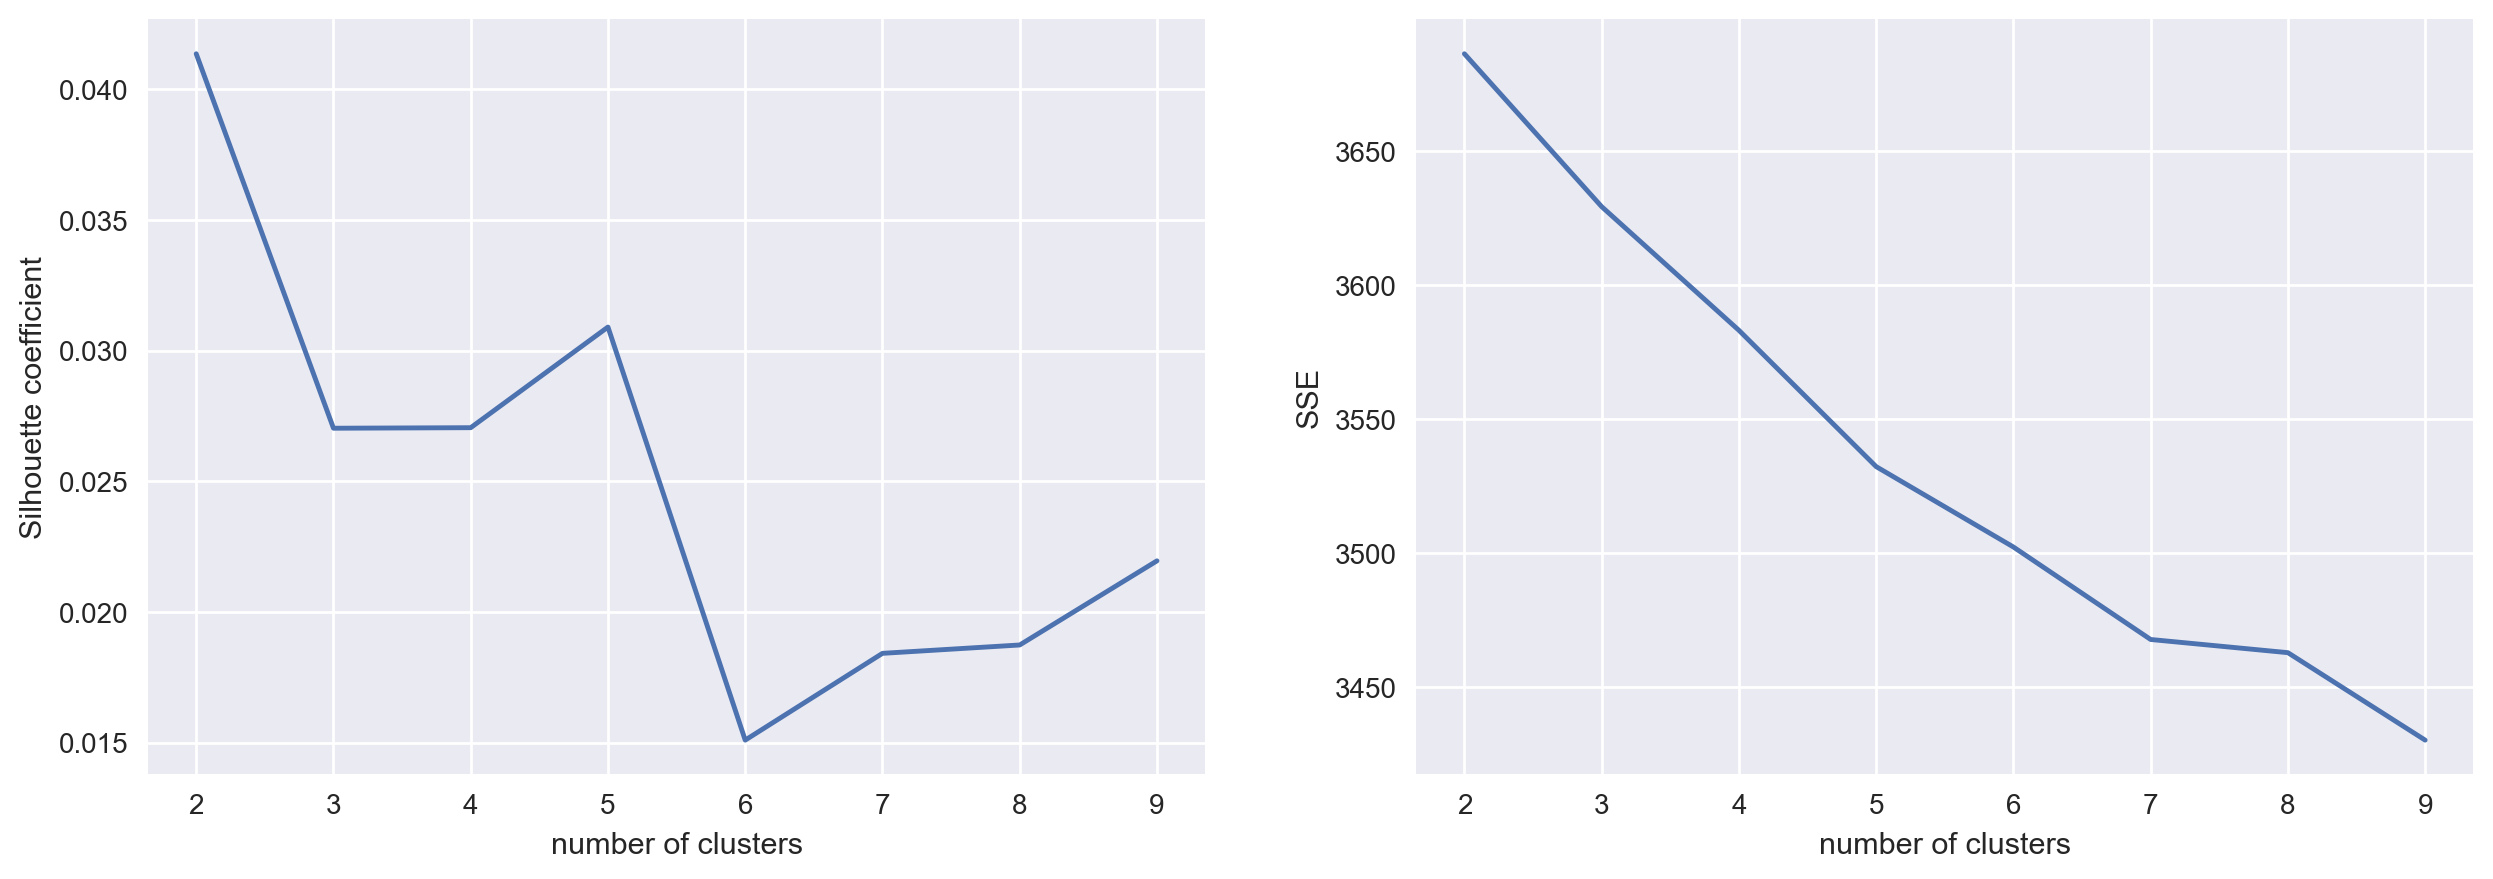

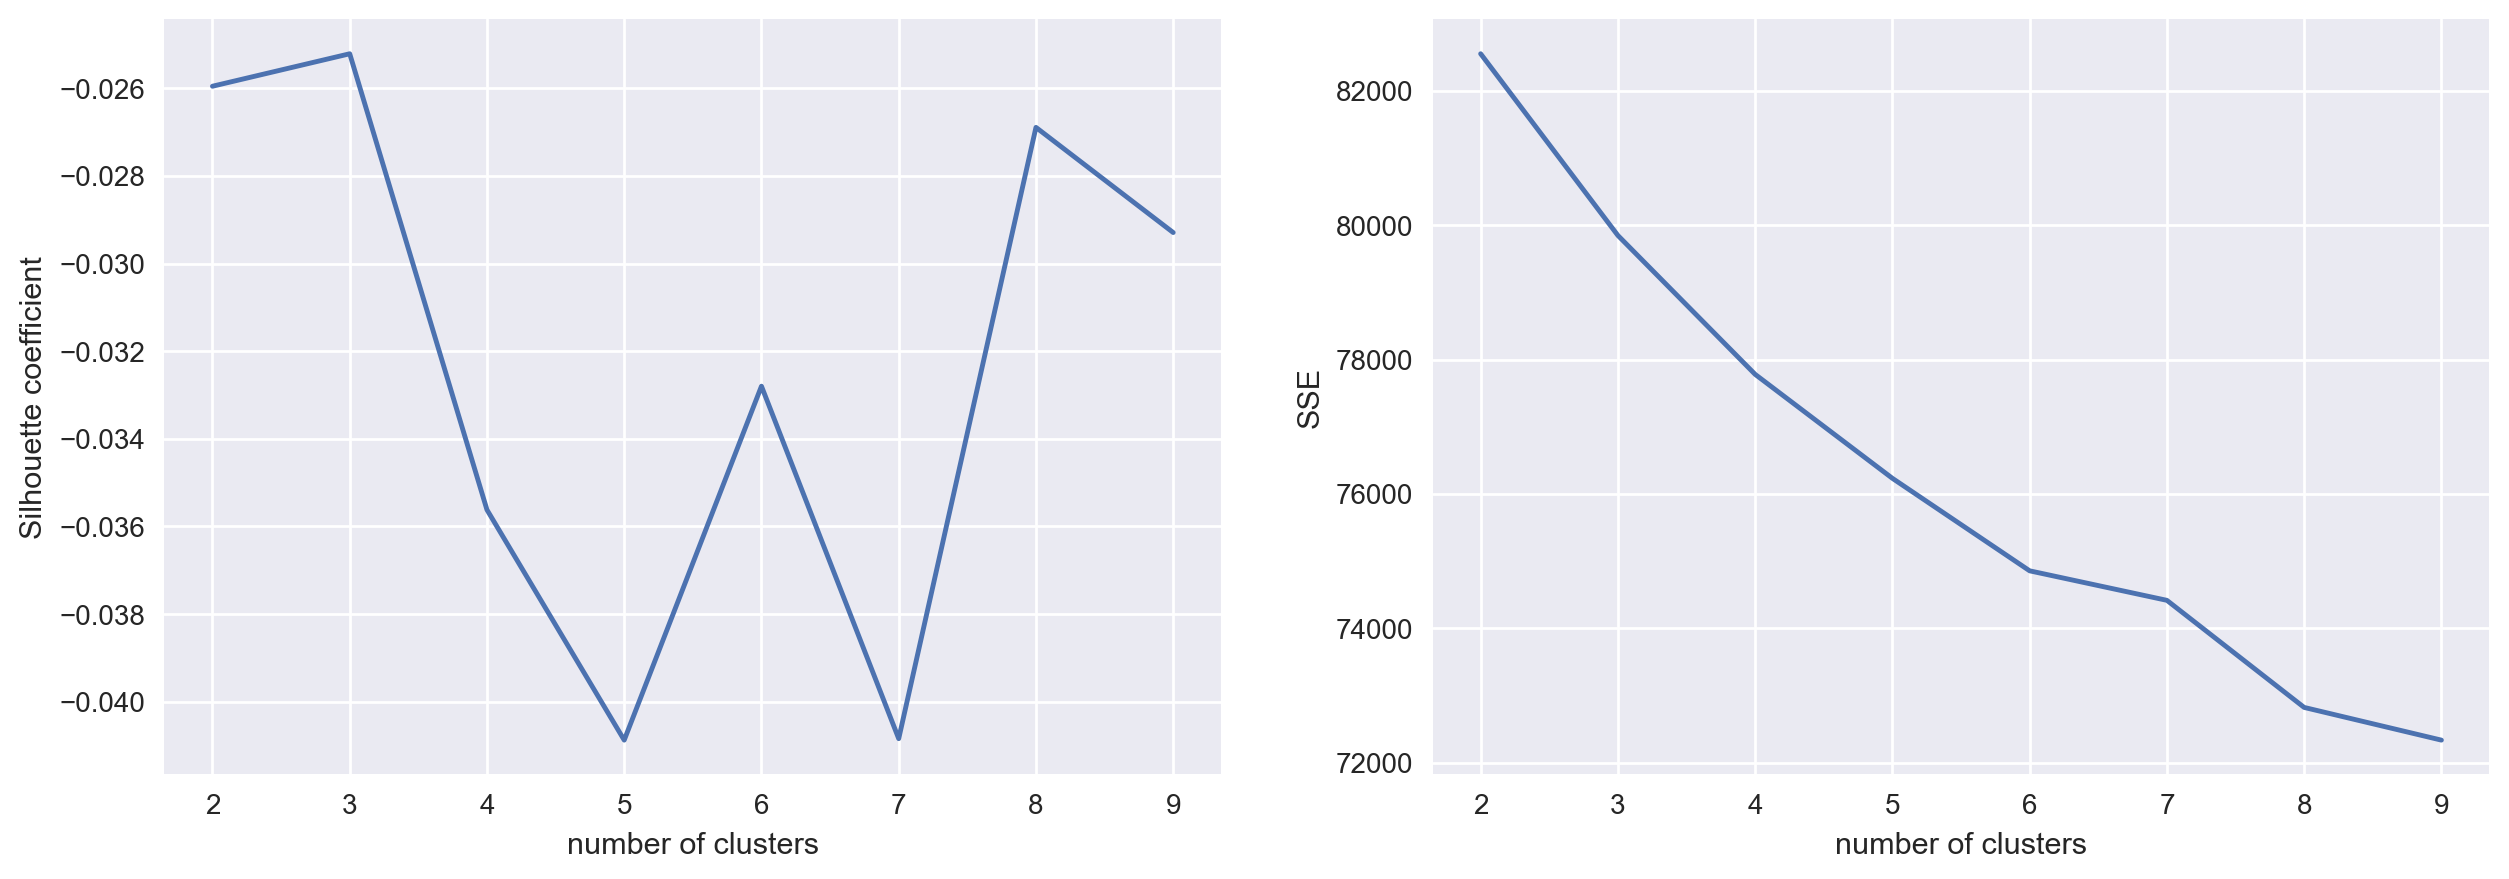

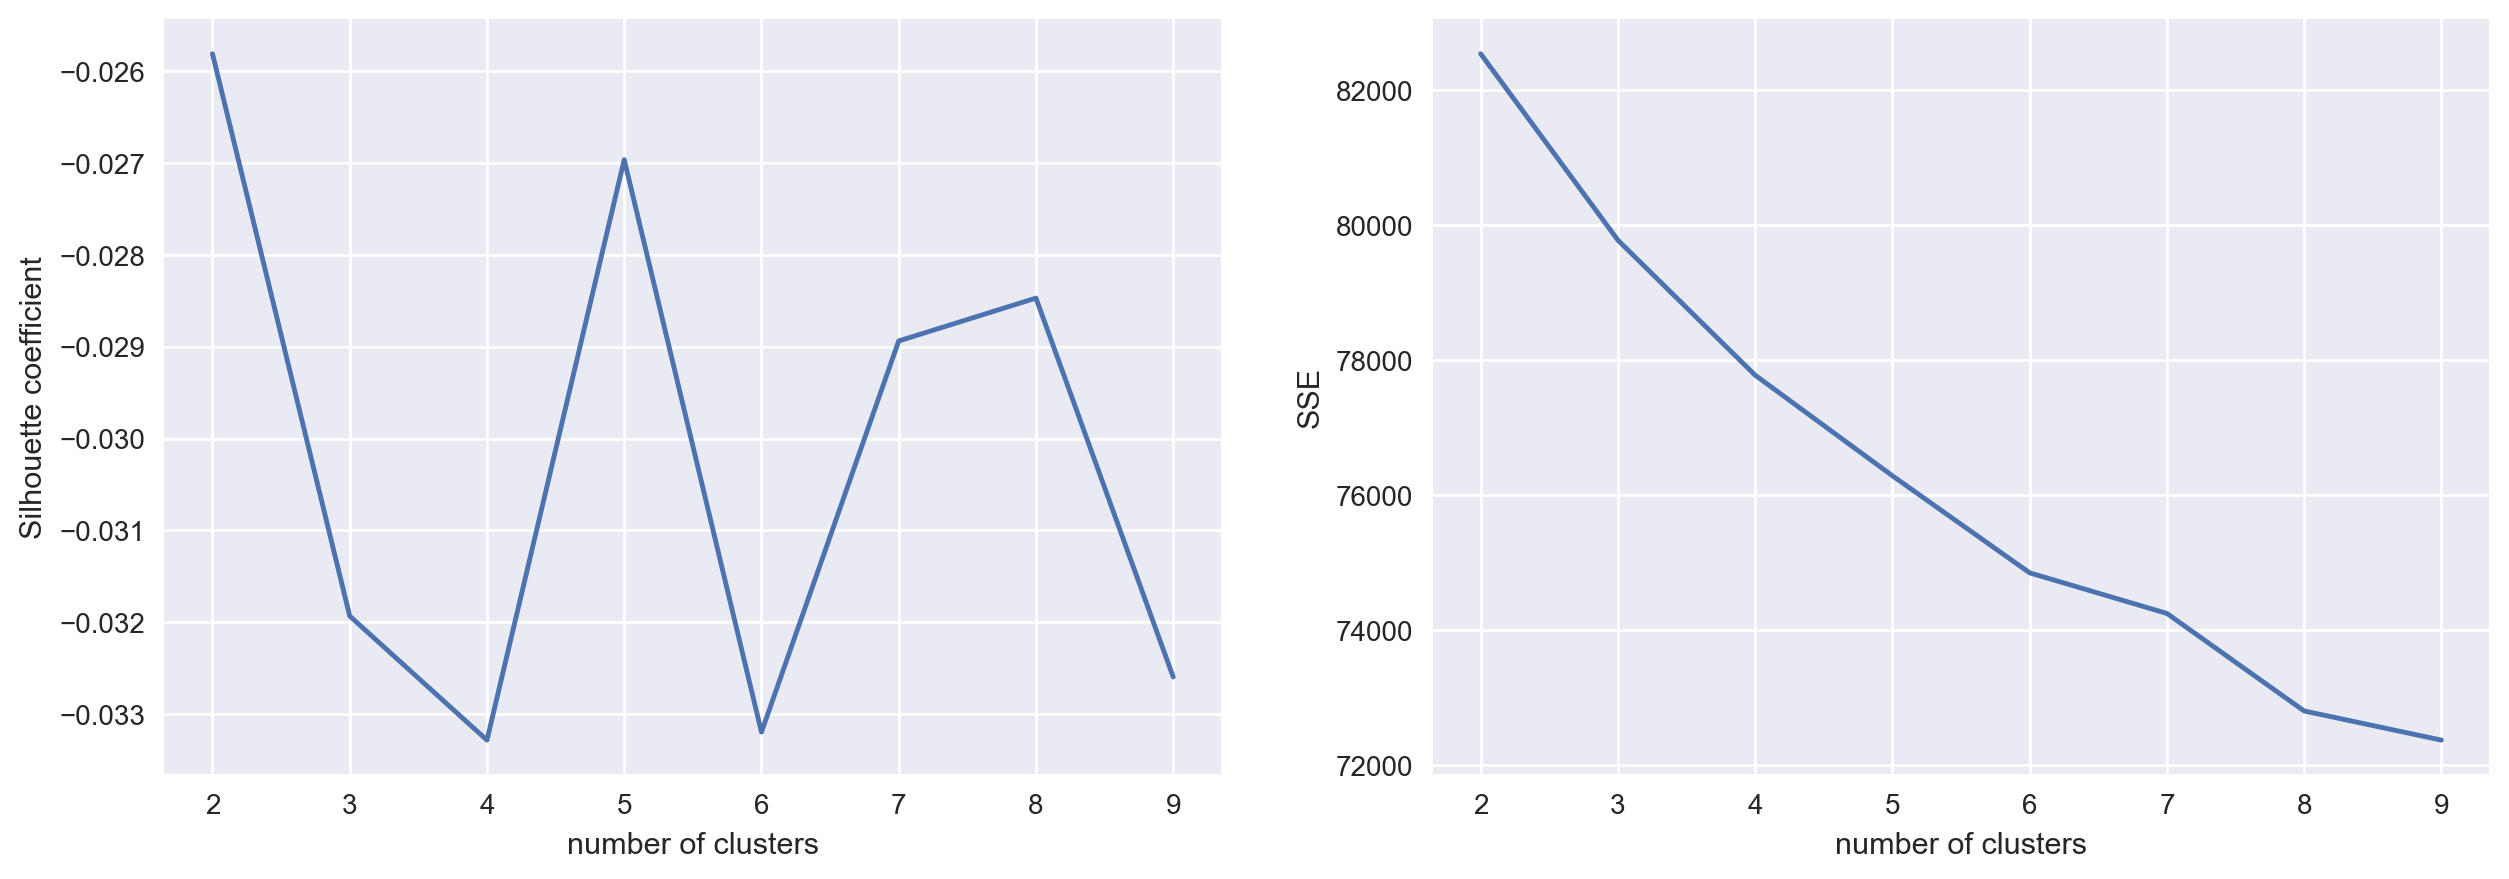

In [168]:
draw_KMeans_plot(Sil_coefs_lsa_tfidf_100, SSEs_lsa_tfidf_100)
draw_KMeans_plot(Sil_coefs_lsa_cv_100, SSEs_lsa_cv_100)
draw_KMeans_plot(Sil_coefs_nmf_cv_100, SSEs_nmf_cv_100)

In [51]:
# This is to load pickle file if data is available,
# or store data when pickle file isn't available

pkl_path = '/Users/xzhou/github/project_files/amazon/review_vector_fit.pkl'

try:    
    with open(pkl_path, 'rb') as pkl_file:
        lsa_tfidf_data = pickle.load(pkl_file)
        lsa_cv_data = pickle.load(pkl_file)
        nmf_cv_data = pickle.load(pkl_file)
except:
    with open(pkl_path, 'wb') as pkl_file:
        pickle.dump(lsa_tfidf_data, pkl_file)
        pickle.dump(lsa_cv_data, pkl_file)
        pickle.dump(nmf_cv_data, pkl_file)
            

In [132]:
# This is to load pickle file if data is available,
# or store data when pickle file isn't available

pkl_path2 = '/Users/xzhou/github/project_files/amazon/amazon_km_scores.pkl'

try:    
    with open(pkl_path2, 'rb') as pkl_file:
        Sil_coefs = pickle.load(pkl_file)
        SSEs = pickle.load(pkl_file)
except:
    with open(pkl_path2, 'wb') as pkl_file:
        pickle.dump(Sil_coefs, pkl_file)
        pickle.dump(SSEs, pkl_file)

In [32]:
km_optimized = KMeans(n_clusters=7, random_state=99, n_jobs=-1)
km_optimized.fit(lsa_tfidf_data)
labels = km_optimized.labels_

In [44]:
labels

array([6, 0, 0, ..., 0, 6, 0], dtype=int32)

In [42]:
labels == 1

array([False, False, False, ..., False, False, False])

In [41]:
cv_data.toarray()[labels == 1]

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
# how to save the model?
# This is to load pickle file if data is available,
# or store data when pickle file isn't available

# pkl_path3 = '/Users/xzhou/github/project_files/amazon/amazon_km_7clusters.pkl'

# try:    
#     with open(pkl_path2, 'rb') as pkl_file:
#         km_optimized = pickle.load(pkl_file)
# except:
#     with open(pkl_path2, 'wb') as pkl_file:
#         pickle.dump(km_optimized, pkl_file)

In [34]:
centroids = km_optimized.cluster_centers_

In [37]:
centroids.shape

(7, 20)

In [68]:
centroids_reversed = lsa_tfidf.inverse_transform(centroids)

In [69]:
print (centroids_reversed)

[[ 7.72212608e-04  2.00478620e-03  6.98795681e-03 ...  1.96376174e-03
   6.63016635e-04  1.82930320e-03]
 [ 6.74796221e-04  3.44773078e-03  1.06214169e-02 ...  2.48335537e-03
   1.50592339e-04  1.02356018e-03]
 [ 1.35230882e-04 -2.59872452e-06  5.02501606e-03 ...  3.37616974e-03
   2.67414294e-04 -5.07183931e-04]
 ...
 [ 4.10341929e-04  4.69550135e-03  1.71112492e-02 ...  1.40836674e-03
   4.39297509e-04  4.20126386e-03]
 [ 2.69704035e-04  4.85362051e-04  8.23400197e-04 ...  6.34470814e-04
   1.02773149e-05  2.98386370e-03]
 [ 1.00464311e-03  5.30195937e-03  2.28247122e-02 ...  3.26624729e-03
   9.18285382e-04  3.85061743e-03]]


In [65]:
km_optimized.labels_

array([6, 0, 0, ..., 0, 6, 0], dtype=int32)

In [73]:
df

,rating,date,review,review_by_word,word_count,sentiment
2,4,2018-07-31,"Sometimes while playing a game, you can answer...","[Sometimes, while, playing, a, game, ,, you, c...",41,1
3,5,2018-07-31,I have had a lot of fun with this thing. My 4 ...,"[I, have, had, a, lot, of, fun, with, this, th...",38,1
5,5,2018-07-31,I received the echo as a gift. I needed anothe...,"[I, received, the, echo, as, a, gift, ., I, ne...",38,1
6,3,2018-07-31,"Without having a cellphone, I cannot use many ...","[Without, having, a, cellphone, ,, I, can, not...",84,0
7,5,2018-07-31,I think this is the 5th one I've purchased. I'...,"[I, think, this, is, the, 5th, one, I, 've, pu...",45,1
9,5,2018-07-30,Love it! I’ve listened to songs I haven’t hear...,"[Love, it, !, I, ’, ve, listened, to, songs, I...",31,1
10,5,2018-07-30,"I sent it to my 85 year old Dad, and he talks ...","[I, sent, it, to, my, 85, year, old, Dad, ,, a...",17,1
11,5,2018-07-30,I love it! Learning knew things with it eveyda...,"[I, love, it, !, Learning, knew, things, with,...",36,1
12,5,2018-07-30,I purchased this for my mother who is having k...,"[I, purchased, this, for, my, mother, who, is,...",63,1
13,5,2018-07-30,"Love, Love, Love!!","[Love, ,, Love, ,, Love, !, !]",7,1


In [74]:
df['label'] = km_optimized.labels_

In [75]:
df

,rating,date,review,review_by_word,word_count,sentiment,label
2,4,2018-07-31,"Sometimes while playing a game, you can answer...","[Sometimes, while, playing, a, game, ,, you, c...",41,1,6
3,5,2018-07-31,I have had a lot of fun with this thing. My 4 ...,"[I, have, had, a, lot, of, fun, with, this, th...",38,1,0
5,5,2018-07-31,I received the echo as a gift. I needed anothe...,"[I, received, the, echo, as, a, gift, ., I, ne...",38,1,0
6,3,2018-07-31,"Without having a cellphone, I cannot use many ...","[Without, having, a, cellphone, ,, I, can, not...",84,0,0
7,5,2018-07-31,I think this is the 5th one I've purchased. I'...,"[I, think, this, is, the, 5th, one, I, 've, pu...",45,1,0
9,5,2018-07-30,Love it! I’ve listened to songs I haven’t hear...,"[Love, it, !, I, ’, ve, listened, to, songs, I...",31,1,0
10,5,2018-07-30,"I sent it to my 85 year old Dad, and he talks ...","[I, sent, it, to, my, 85, year, old, Dad, ,, a...",17,1,0
11,5,2018-07-30,I love it! Learning knew things with it eveyda...,"[I, love, it, !, Learning, knew, things, with,...",36,1,3
12,5,2018-07-30,I purchased this for my mother who is having k...,"[I, purchased, this, for, my, mother, who, is,...",63,1,0
13,5,2018-07-30,"Love, Love, Love!!","[Love, ,, Love, ,, Love, !, !]",7,1,2


In [76]:
df[df['label']==0]

,rating,date,review,review_by_word,word_count,sentiment,label
3,5,2018-07-31,I have had a lot of fun with this thing. My 4 ...,"[I, have, had, a, lot, of, fun, with, this, th...",38,1,0
5,5,2018-07-31,I received the echo as a gift. I needed anothe...,"[I, received, the, echo, as, a, gift, ., I, ne...",38,1,0
6,3,2018-07-31,"Without having a cellphone, I cannot use many ...","[Without, having, a, cellphone, ,, I, can, not...",84,0,0
7,5,2018-07-31,I think this is the 5th one I've purchased. I'...,"[I, think, this, is, the, 5th, one, I, 've, pu...",45,1,0
9,5,2018-07-30,Love it! I’ve listened to songs I haven’t hear...,"[Love, it, !, I, ’, ve, listened, to, songs, I...",31,1,0
10,5,2018-07-30,"I sent it to my 85 year old Dad, and he talks ...","[I, sent, it, to, my, 85, year, old, Dad, ,, a...",17,1,0
12,5,2018-07-30,I purchased this for my mother who is having k...,"[I, purchased, this, for, my, mother, who, is,...",63,1,0
14,5,2018-07-30,Just what I expected....,"[Just, what, I, expected, ..., .]",6,1,0
17,5,2018-07-30,We have only been using Alexa for a couple of ...,"[We, have, only, been, using, Alexa, for, a, c...",47,1,0
19,4,2018-07-30,I liked the original Echo. This is the same bu...,"[I, liked, the, original, Echo, ., This, is, t...",101,1,0


In [78]:
df[df['label']==6]

,rating,date,review,review_by_word,word_count,sentiment,label
2,4,2018-07-31,"Sometimes while playing a game, you can answer...","[Sometimes, while, playing, a, game, ,, you, c...",41,1,6
21,5,2018-07-30,"We love Alexa! We use her to play music, play ...","[We, love, Alexa, !, We, use, her, to, play, m...",80,1,6
32,5,2018-07-30,She works well. Needs a learning command for ...,"[She, works, well, ., Needs, a, learning, comm...",43,1,6
41,5,2018-07-30,My Android would not allow Alexa to connect. F...,"[My, Android, would, not, allow, Alexa, to, co...",35,1,6
45,5,2018-07-30,Very satisfied with the Echo. Alexa now contro...,"[Very, satisfied, with, the, Echo, ., Alexa, n...",28,1,6
46,2,2018-07-30,"It's like Siri, in fact, Siri answers more acc...","[It, 's, like, Siri, ,, in, fact, ,, Siri, ans...",39,-1,6
53,5,2018-07-30,The sound from this Echo 2nd Generation is phe...,"[The, sound, from, this, Echo, 2nd, Generation...",24,1,6
58,5,2018-07-30,"Love Alexa, bought others for friends","[Love, Alexa, ,, bought, others, for, friends]",7,1,6
59,5,2018-07-30,Love the echo I purchased it for company for m...,"[Love, the, echo, I, purchased, it, for, compa...",38,1,6
76,4,2018-07-30,I bought this because it can control fios tele...,"[I, bought, this, because, it, can, control, f...",145,1,6
